<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/April_FINAL_Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular risk prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

**Project Summary: Predicting Coronary Heart Disease Risk**

This project aims to develop a machine learning model to predict the risk of coronary heart disease (CHD) within the next 10 years for patients in Framingham, Massachusetts. The dataset includes records of over 4,000 patients, with 15 attributes covering demographic, behavioral, and medical risk factors.

The focus is on binary classification, with the target variable "TenYearCHD" indicating whether a patient is at risk (1) or not (0). Features include age, sex, education, smoking status, blood pressure, and cholesterol levels. Handling missing values and ensuring data consistency are critical during data preprocessing.

Feature engineering involves crafting new features or transforming existing ones to enhance model performance. Model selection includes exploring algorithms like logistic regression, decision trees, random forests, and support vector machines, evaluated on metrics like accuracy, precision, recall, and F1-score.

Hyperparameter tuning fine-tunes model performance using techniques like grid search or randomized search. Model evaluation involves assessing performance metrics and ensuring generalizability through cross-validation.

The success of the project is measured by the model's ability to accurately predict CHD risk, enabling healthcare professionals to identify high-risk individuals for timely interventions and personalized healthcare recommendations.

In conclusion, this project aims to leverage machine learning to predict CHD risk, contributing to preventive healthcare efforts and potentially reducing the burden of cardiovascular diseases.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

### Dataset Loading

In [2]:
#mounting the google drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Almabetter Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [8]:
#installing missingno
!pip install missingno

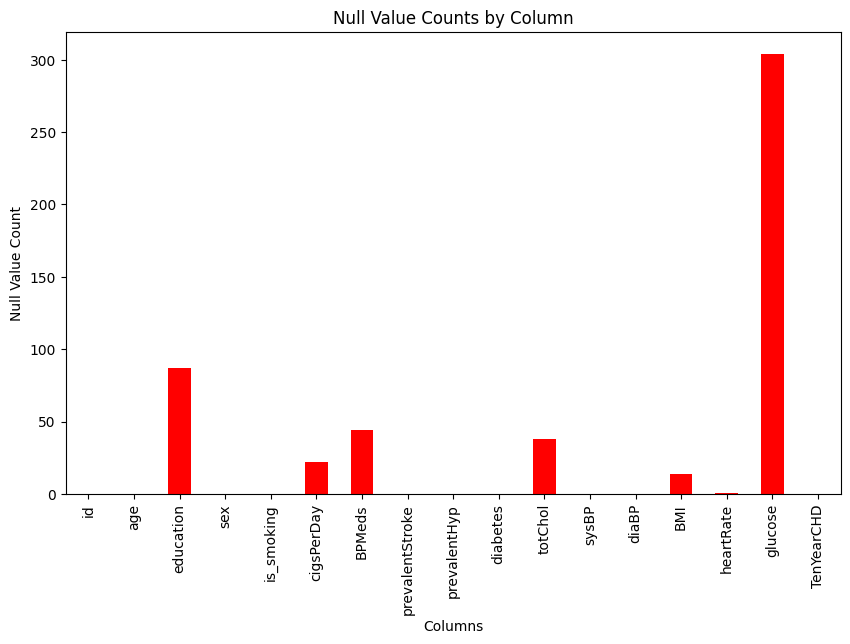

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

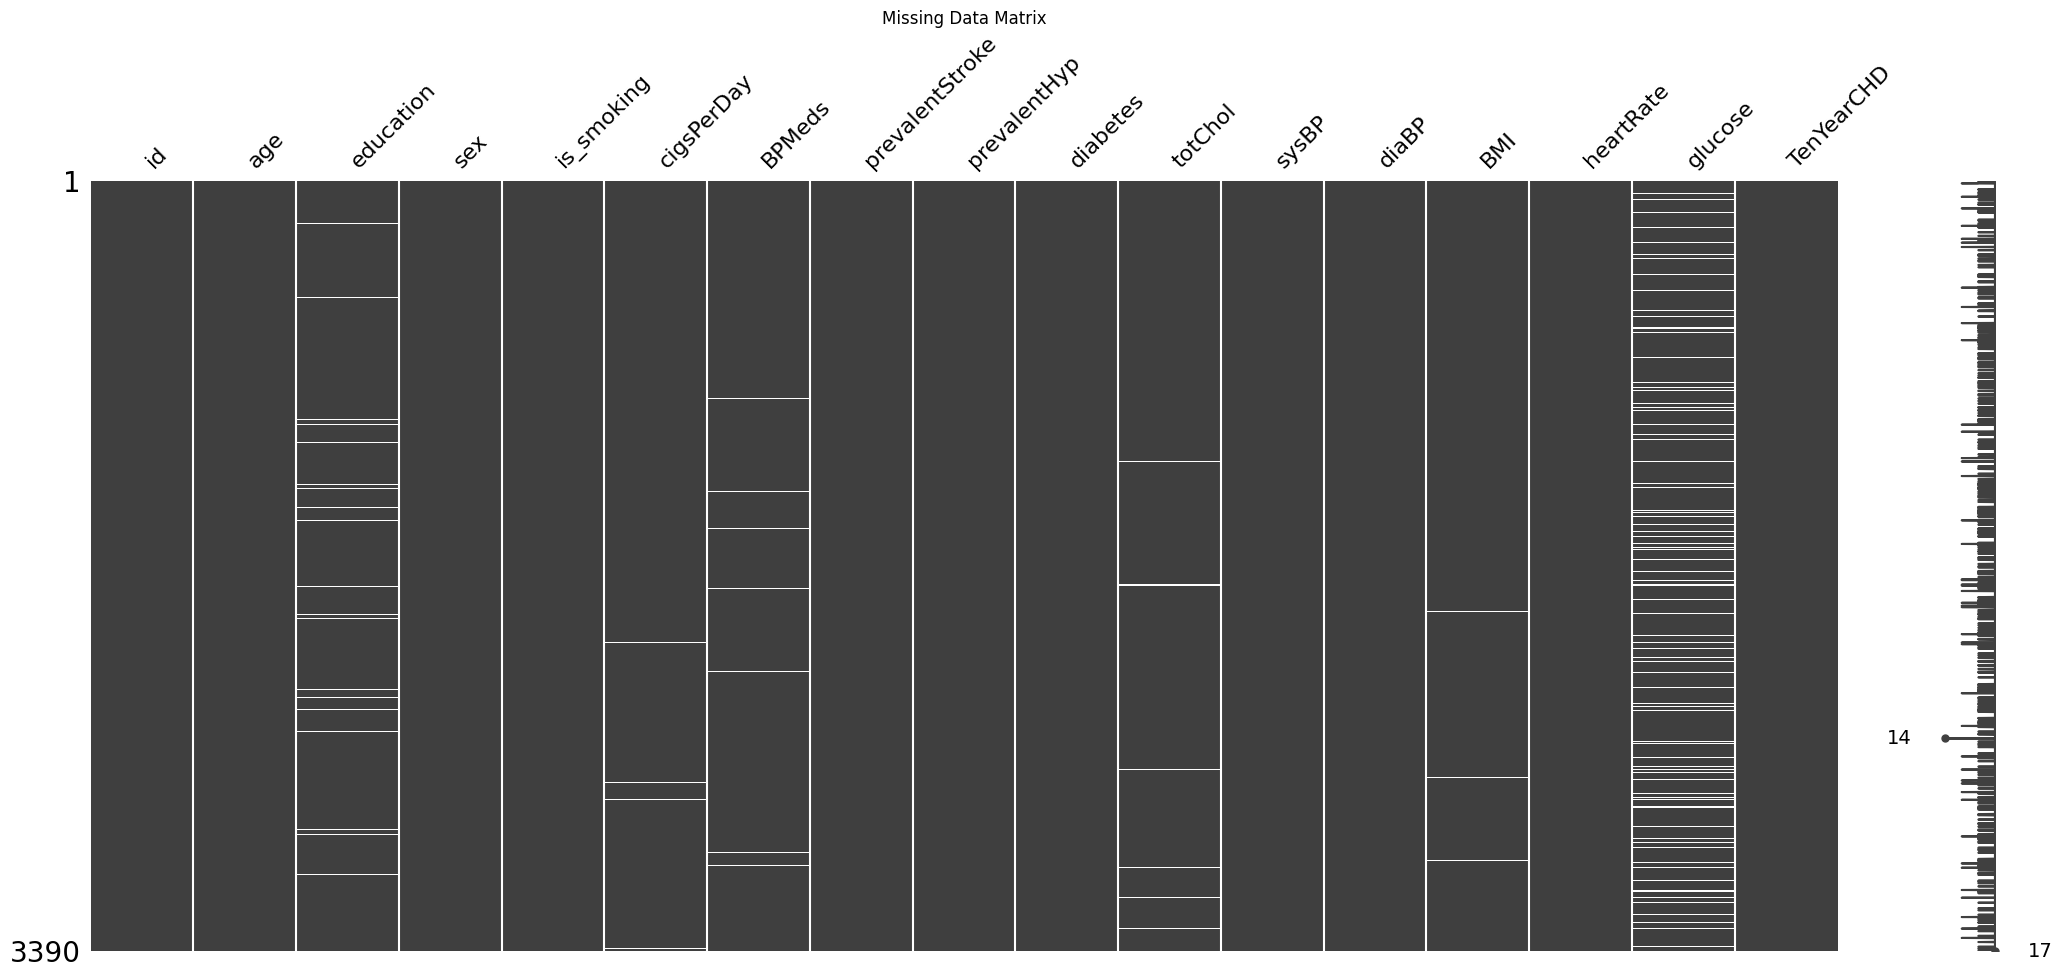

In [10]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [11]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [12]:
# Dataset Describe
df.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description

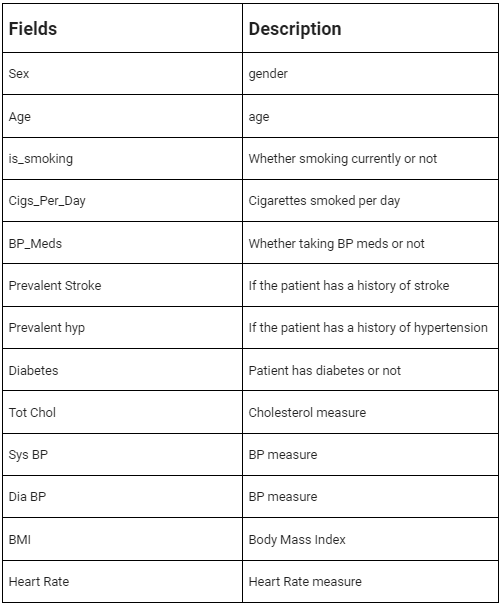

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [15]:
df['education'].dtype == '0'

False

In [16]:
# Defining 3 lists containing the column names which will be helpful for further manipulation.
# This is defined based on the number of unique values for each attribute
dependent_var = ['TenYearCHD']

categorical_var = [i for i in df.columns if df[i].nunique()<=4]
print(f'categorical_var: {categorical_var}')
print('\n')

continuous_var = [i for i in df.columns if i not in categorical_var]
print(f'continuous_var: {continuous_var}')

categorical_var: ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


continuous_var: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### What all manipulations have you done and insights you found?

Right now i just drop the ID column as it is not relevant in predicting the 'TenyearCHD'

created 3 lists containing the column names which will be helpful for further manipulation.

### Missing Value Imputation

In [17]:
#close look of education NaN values
df[df['education'].isna()].head()


age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
49    46        NaN   F        YES        20.0     0.0                0   
62    52        NaN   F         NO         0.0     0.0                0   
69    65        NaN   M         NO         0.0     0.0                0   
104   57        NaN   F         NO         0.0     1.0                0   
120   65        NaN   F         NO         0.0     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
49              0         0    212.0  122.5   75.5  23.51       67.0    103.0   
62              0         0    268.0  109.0   70.0  23.74       75.0     78.0   
69              0         0      NaN  152.5   97.5  28.35       65.0     73.0   
104             1         0    190.0  155.0   85.0  26.08       55.0     66.0   
120             0         0    221.0  155.0   92.0  31.34       58.0      NaN   

     TenYearCHD  
49            0  
62            0  
69            0  
104           0  
120           0

In [18]:
#close look of cigsPerDay NaN values
df[df['cigsPerDay'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422   55        1.0   F        YES         NaN     0.0                0   
466   45        3.0   M        YES         NaN     0.0                0   
469   42        1.0   M        YES         NaN     0.0                0   
491   61        1.0   F        YES         NaN     0.0                0   
538   41        1.0   F        YES         NaN     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
422             1         0    213.0  163.0   91.0  28.66       69.0     66.0   
466             1         0    170.0  145.5   99.0  26.74       83.0     85.0   
469             0         0    196.0  123.0   73.0  22.06       66.0      NaN   
491             1         0    356.0  168.0   98.0  27.30      103.0    106.0   
538             0         0    171.0  135.0   82.5  24.35       79.0     82.0   

     TenYearCHD  
422           0  
466           0  
469           0  
491           0  
538           0

In [19]:
#close look of BPMeds NaN values
df[df['BPMeds'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
8     41        2.0   F        YES        20.0     NaN                0   
102   68        2.0   F         NO         0.0     NaN                0   
128   67        2.0   F         NO         0.0     NaN                0   
174   60        1.0   F         NO         0.0     NaN                0   
194   56        1.0   F         NO         0.0     NaN                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
8               0         0    220.0  126.0   78.0  20.70       86.0     79.0   
102             0         0    257.0  144.0   95.0  29.25       80.0     77.0   
128             0         0    261.0  117.0   63.0  22.55       75.0     83.0   
174             1         0    273.0  176.0   84.0  22.17       66.0     79.0   
194             1         0    391.0  126.0   84.0  24.83       80.0     78.0   

     TenYearCHD  
8             0  
102           0  
128           0  
174           0  
194           0

In [20]:
#close look of totChol NaN values
df[df['totChol'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
10    61        1.0   F         NO         0.0     0.0                0   
69    65        NaN   M         NO         0.0     0.0                0   
254   52        1.0   F         NO         0.0     0.0                0   
290   37        2.0   F        YES        30.0     0.0                0   
554   38        3.0   F        YES         3.0     1.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
10              1         0      NaN  185.0  121.0  35.22       80.0      NaN   
69              0         0      NaN  152.5   97.5  28.35       65.0     73.0   
254             0         0      NaN  129.0   83.0  32.57       65.0      NaN   
290             0         0      NaN  115.0   79.0  28.41       85.0      NaN   
554             1         0      NaN  125.0   80.0  22.79       98.0      NaN   

     TenYearCHD  
10            0  
69            0  
254           0  
290           0  
554           0

In [21]:
#close look of BMI NaN values
df[df['BMI'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
54     63        1.0   M        YES        20.0     0.0                1   
271    47        2.0   F         NO         0.0     0.0                0   
720    61        1.0   F         NO         0.0     0.0                0   
1057   64        2.0   M        YES        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0                0         0    221.0  148.0   85.0  NaN       90.0     80.0   
54               1         0    213.0  163.0   94.0  NaN       76.0     69.0   
271              0         0    195.0  126.0   75.0  NaN       60.0      NaN   
720              1         0    300.0  150.5   89.0  NaN       68.0     72.0   
1057             0         0    225.0  120.0   75.0  NaN       70.0     94.0   

      TenYearCHD  
0              1  
54             1  
271            1  
720            1  
1057           0

In [22]:
#close look of glucose NaN values
df[df['glucose'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
9    55        2.0   F         NO         0.0     0.0                0   
10   61        1.0   F         NO         0.0     0.0                0   
36   46        3.0   F         NO         0.0     0.0                0   
38   41        2.0   F        YES         9.0     1.0                1   
55   51        2.0   F         NO         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
9              1         0    326.0  144.0   81.0  25.71       85.0      NaN   
10             1         0      NaN  185.0  121.0  35.22       80.0      NaN   
36             0         0    193.0  106.5   70.5  26.18       75.0      NaN   
38             1         0    180.0  114.0   70.0  22.41       92.0      NaN   
55             1         0    351.0  134.0   97.5  21.66      100.0      NaN   

    TenYearCHD  
9            0  
10           0  
36           0  
38           0  
55           0

In [23]:
#close look of heart rate NaN values
df[df['heartRate'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1388   64        1.0   M        YES        18.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
1388             1         0    219.0  172.5   75.0  29.29        NaN   

      glucose  TenYearCHD  
1388     91.0           1

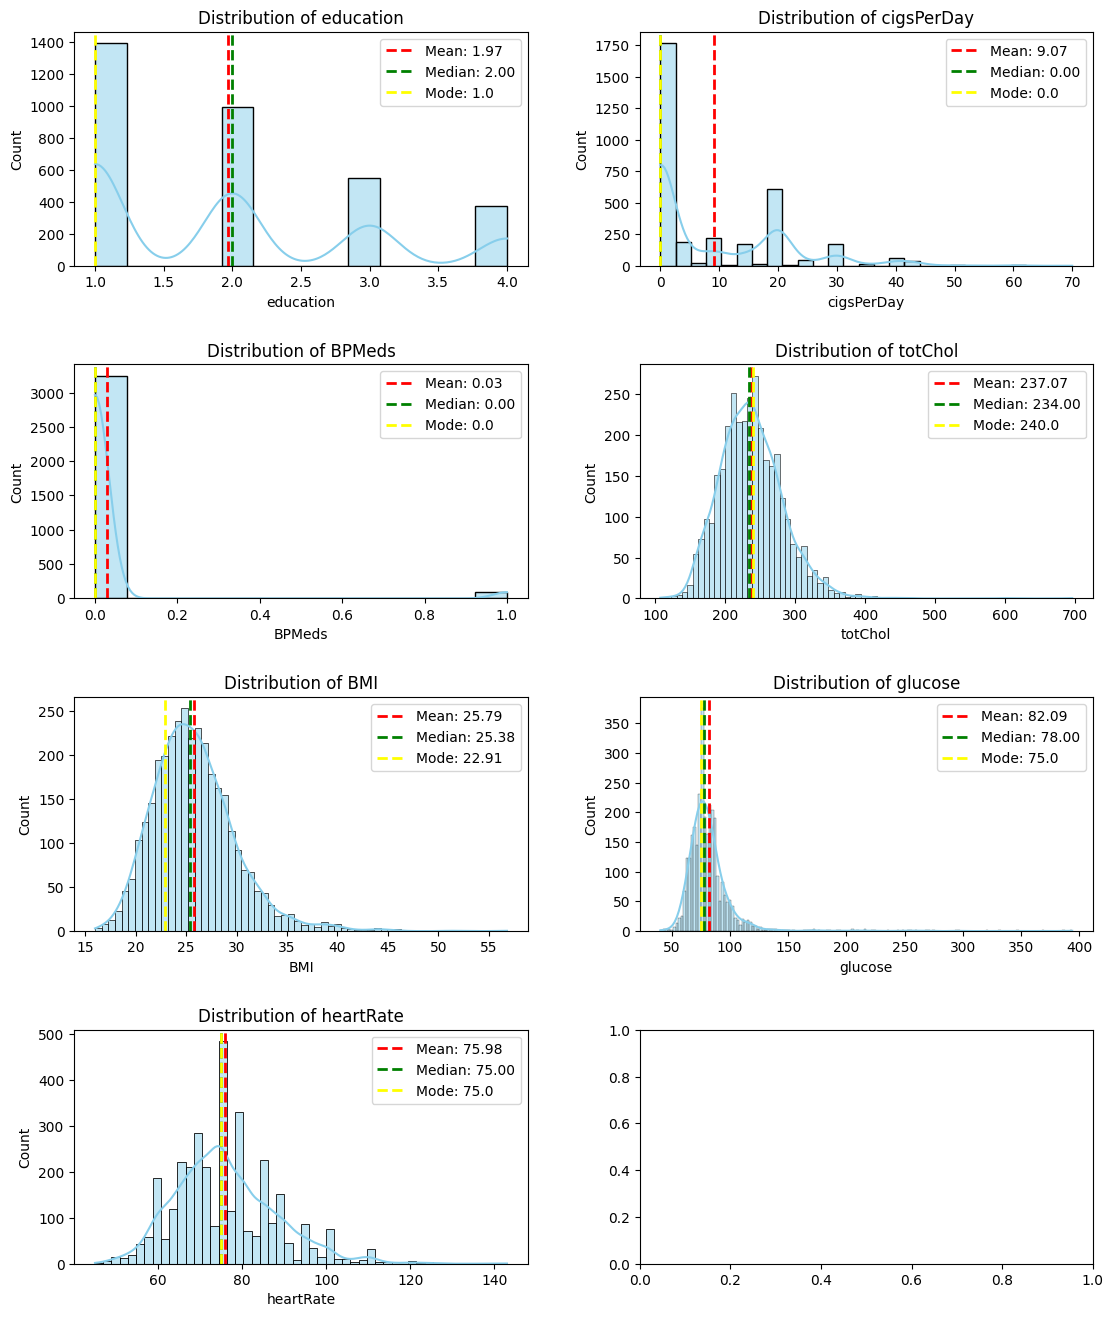

In [24]:
# List of columns to plot
columns_to_plot = ['education','cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

# Check if there are enough subplots for the columns to plot
if len(columns_to_plot) > len(axes.flatten()):
    raise ValueError("Not enough subplots for the number of columns to plot.")

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [25]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(int(column_mean), inplace=True)


# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(int(column_mean), inplace=True)

# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)


# Calculate the mode of a BPMeds column
column_mode = df['education'].mode().values[0]

print(f"Mode of education: {column_mode}")

# Replace the Nan values with Mode.
df['education'].fillna(column_mode, inplace=True)

Mean of 'cigsPerDay': 9.069477434679335
Mean of 'heartRate': 75.97727943346119
Median of 'totChol': 234.0
Median of 'BMI': 25.38
Median of 'glucose': 78.0
Mode of BPMeds: 0.0
Mode of education: 1.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Box Plot of Systolic/Diastolic Blood Pressure by TenYearCHD Status

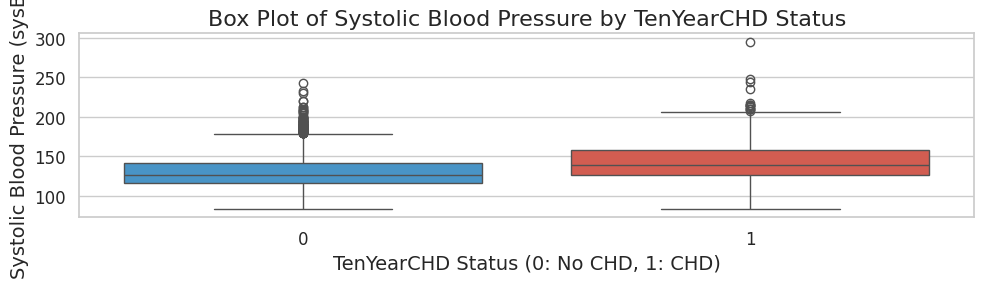

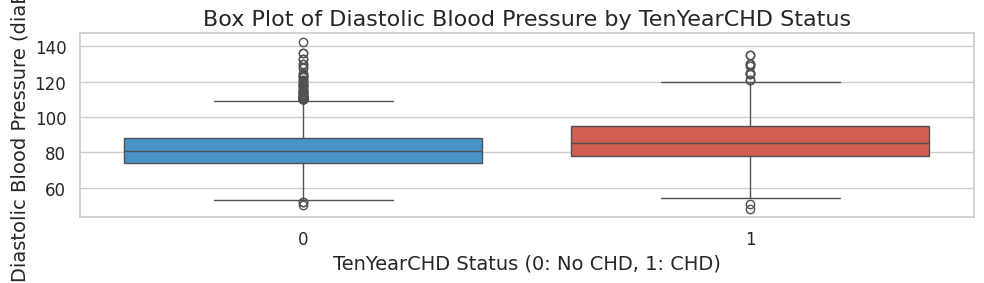

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Set the color palette
colors = ["#3498db", "#e74c3c"]

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(10, 3))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette=colors)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Systolic Blood Pressure (sysBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(10, 3))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, palette=colors)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status', fontsize=16)
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)', fontsize=14)
plt.ylabel('Diastolic Blood Pressure (diaBP)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The box plot was chosen for its ability to effectively display the distribution of blood pressure measurements for patients with and without CHD risk. Its simplicity, along with clear representation of central tendency and variability, makes it suitable for comparing groups and identifying potential differences in blood pressure levels.

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible the High systolic and Diastolic blood pressure for the person having Ten Year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from comparing blood pressure measurements between patients with and without CHD risk can help in creating positive business impact by informing healthcare interventions and personalized treatment plans, potentially reducing the incidence of cardiovascular diseases. However, if significant disparities in blood pressure levels exist, it may highlight disparities in access to healthcare, leading to negative growth.

#### Chart - 2 side-by-side comparison of the distribution of total cholesterol levels for patients

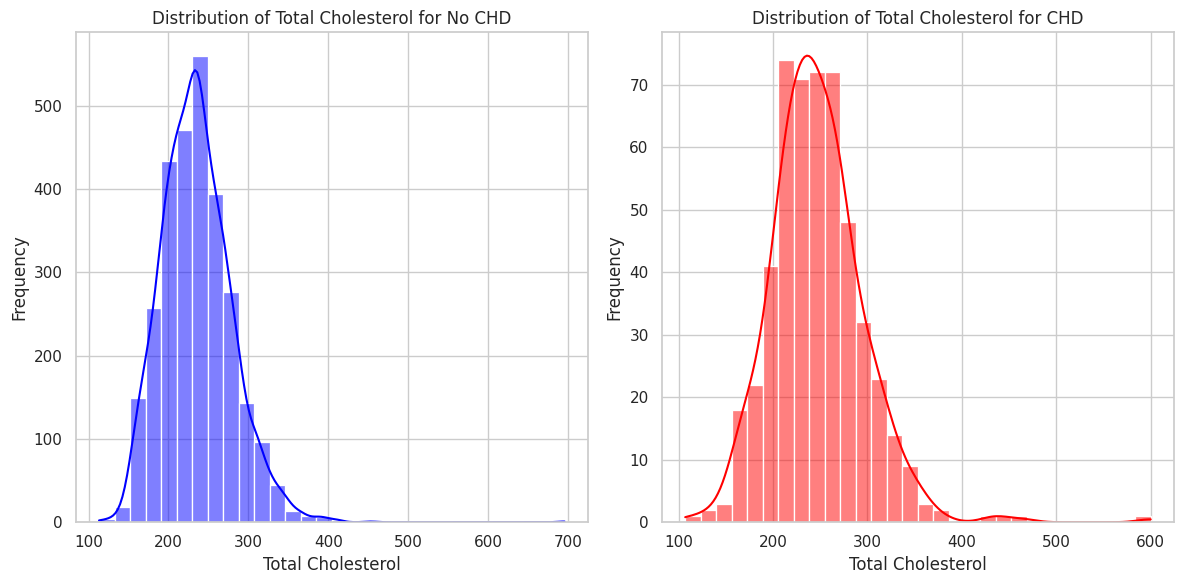

In [27]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen for its effectiveness in displaying the distribution of total cholesterol levels for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing data between groups and identifying potential patterns or differences.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that individuals with CHD tend to have a higher frequency of total cholesterol levels in the range of 200 to 300 compared to those without CHD. Additionally, there are outliers with total cholesterol levels exceeding 400, suggesting potential extreme cases or outliers within the CHD group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained regarding the association between total cholesterol levels and CHD risk can contribute to positive business impact by informing preventive healthcare strategies, personalized treatment plans, and interventions aimed at reducing CHD incidence, thus potentially improving patient outcomes and reducing healthcare costs.

#### Chart - 3 "Comparison of BMI Distribution between Patients with and without CHD"

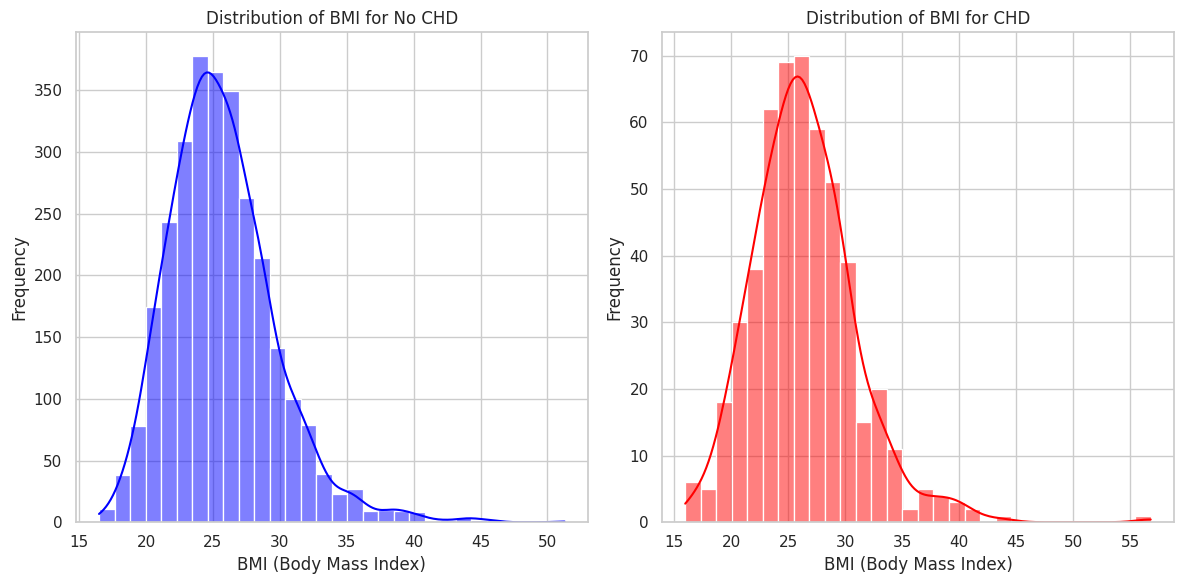

In [28]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.The histogram was chosen because it effectively visualizes the distribution of BMI (Body Mass Index) for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing BMI between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

Not a big difference in BMI distribution, there is few outlier in BMI OF CHD person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on the BMI distribution may not significantly impact business positively, but identifying outliers in BMI among CHD patients can inform targeted interventions, potentially reducing adverse health outcomes and healthcare costs.

#### Chart - 4 "Comparison of Heart Rate between Patients with and without CHD"

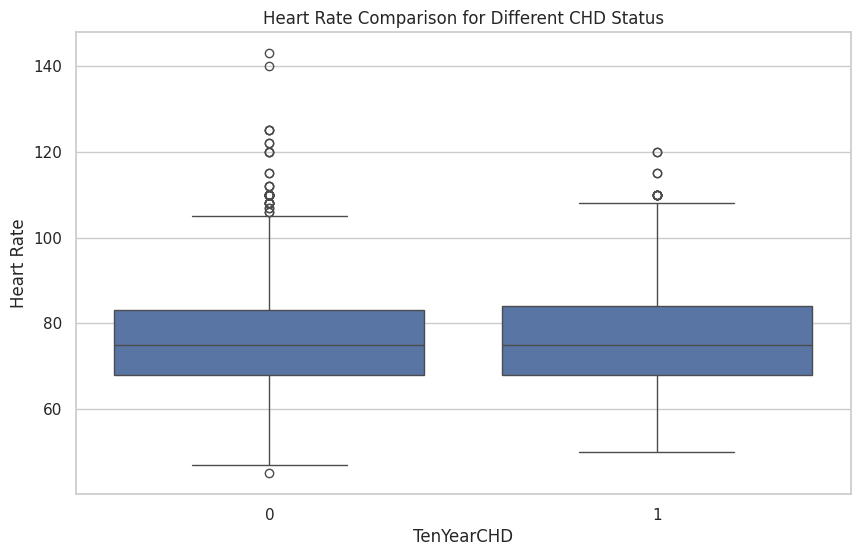

In [29]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The box plot was selected because it effectively compares the distribution of heart rates between patients with and without CHD. Its ability to show the central tendency, spread, and any potential outliers in the data makes it suitable for comparing continuous variables across different groups.

##### 2. What is/are the insight(s) found from the chart?

No big difference in Heart rate of patient with or without CHD , but If your heart rate is over 100 beats per minute when you are at rest, this is considered fast. A rapid heart rate, also known as tachycardia, can be related to many different health conditions. It's normal for your heart rate to increase when you're exercising or if your body is fighting off an infection.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on heart rate differences between CHD and non-CHD patients may not directly impact business positively. However, identifying elevated heart rates (>100 bpm) among individuals can prompt targeted healthcare interventions, potentially mitigating health risks and reducing healthcare costs. Failure to address elevated heart rates may lead to negative health outcomes, impacting business productivity and healthcare expenses.

#### Chart - 5 Comparison of Glucose Distribution between Patients with and without CHD

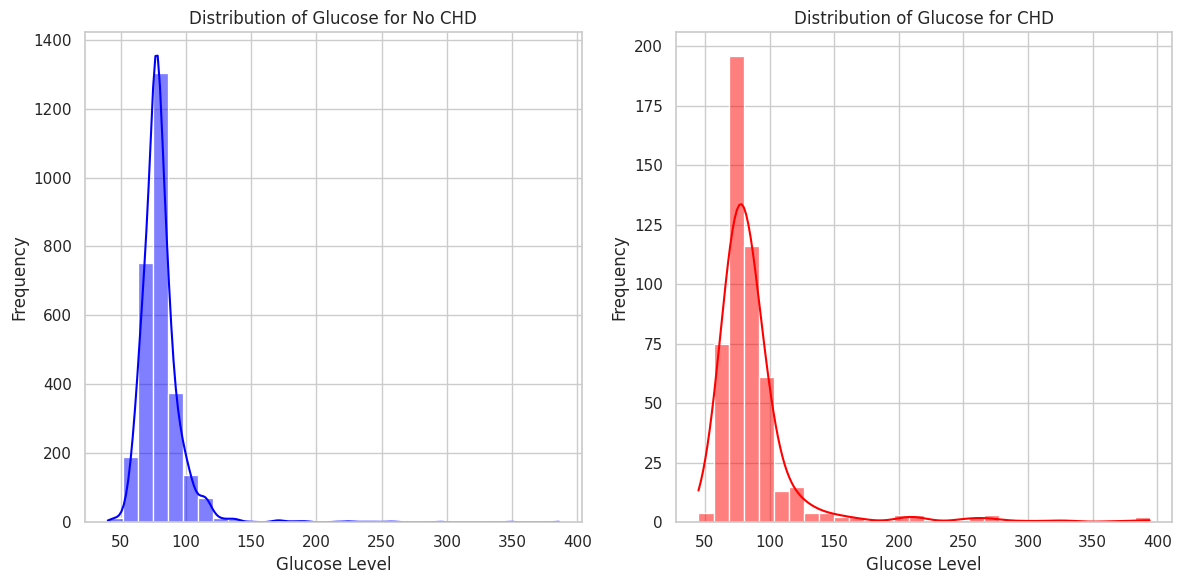

In [30]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen because it effectively displays the distribution of glucose levels for patients with and without CHD. Its simplicity and ability to show frequency distributions make it suitable for comparing glucose levels between groups and identifying potential associations with CHD risk.

##### 2. What is/are the insight(s) found from the chart?

No significant change is visible.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer HereInsights into glucose level distributions may aid in creating positive business impact by informing preventive healthcare measures and personalized interventions, potentially reducing the risk of CHD and associated healthcare costs. However, if significant disparities or abnormalities in glucose levels exist, they could indicate underlying health issues, leading to negative growth due to increased healthcare expenses and decreased productivity.

#### Chart - 6 - "Prevalence of Hypertension Across Age Groups"

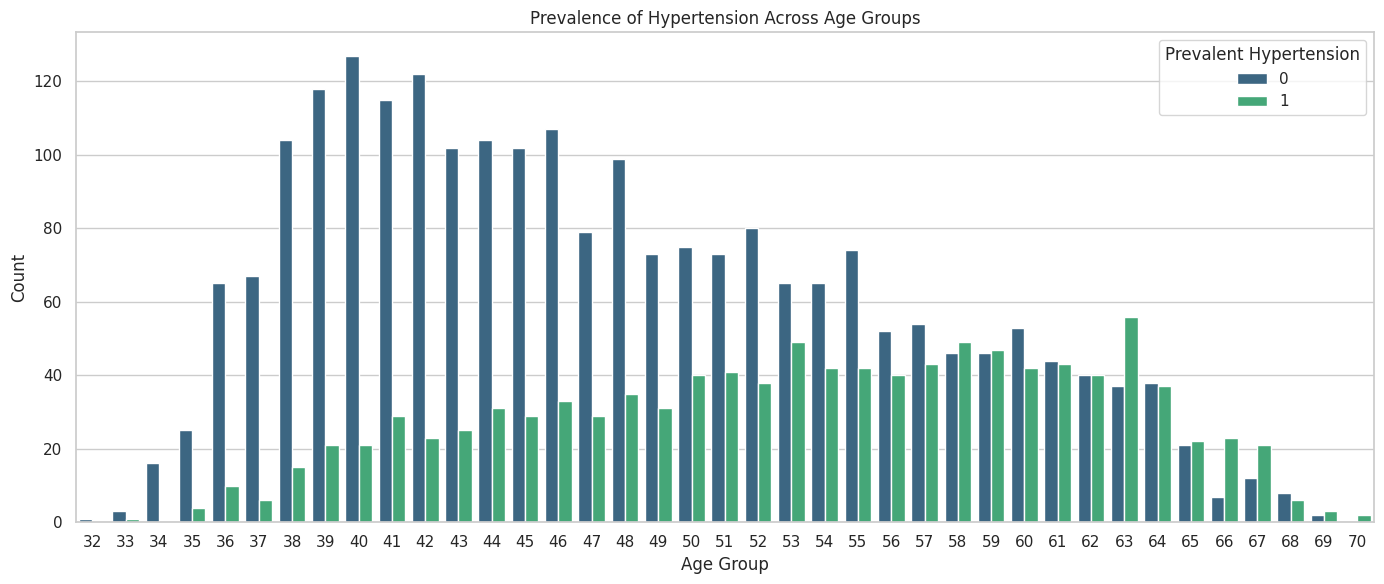

In [31]:
# Chart - 6 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title("Prevalence of Hypertension Across Age Groups")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

The countplot was chosen because it effectively displays the prevalence of hypertension across different age groups, making it easy to observe trends and variations in hypertension counts among patients with and without CHD. Its simplicity and ability to show categorical data with hue differentiation make it suitable for comparing hypertension prevalence across age groups.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart indicate that the prevalence of hypertension varies across different age groups, with notable differences between patients with and without CHD. For patients without CHD, hypertension counts peak around age 40 and then decline, while for those with CHD, hypertension counts continue to rise until around age 63 before declining. This suggests potential age-related trends in hypertension prevalence among patients with and without CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights on hypertension prevalence across age groups can positively impact businesses by informing targeted healthcare interventions and preventive measures, potentially reducing the incidence of cardiovascular diseases like CHD and associated healthcare costs. However, if hypertension prevalence remains high or increases with age, it may lead to negative growth due to elevated healthcare expenses and decreased workforce productivity associated with managing hypertension-related complications.

#### Chart - 7 -- Prevalence of Diabetes for Different Age Groups

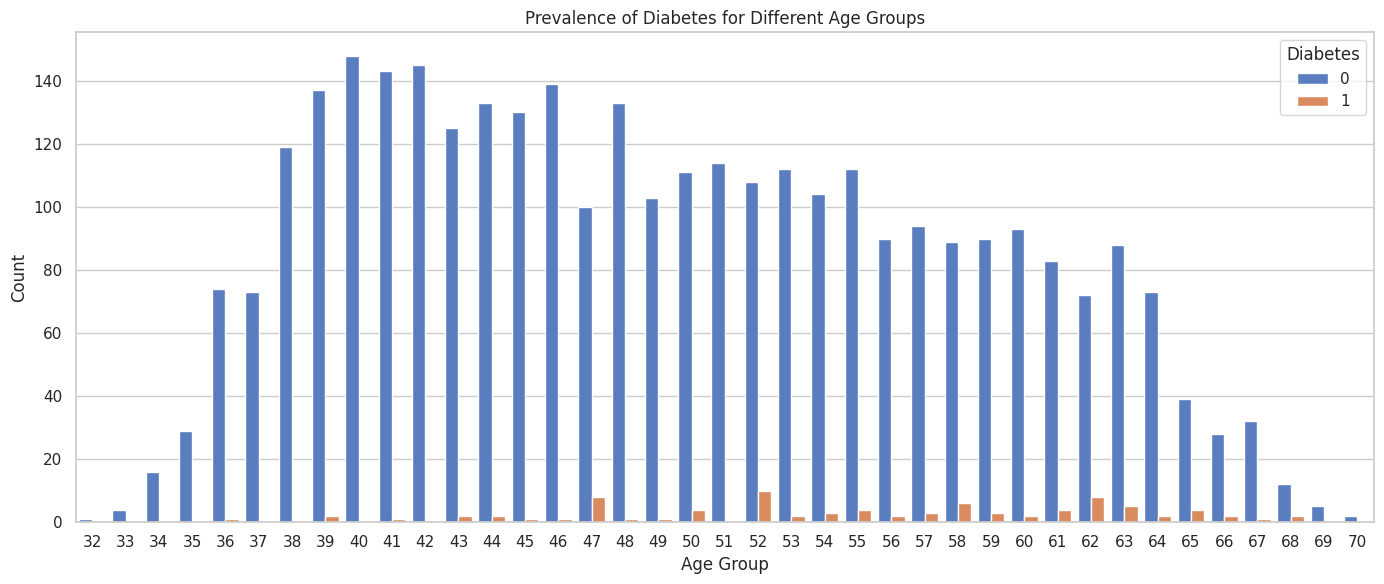

In [32]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because it effectively displays the prevalence of diabetes across different age groups using categorical data.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it appears that there may be a higher prevalence of diabetes among individuals without coronary heart disease (CHD) compared to those with CHD, as indicated by the taller towers in the "No CHD" category compared to the "CHD" category. This insight suggests a potential correlation between diabetes and the absence of coronary heart disease, which could be further explored for implications in preventive healthcare and treatment strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights regarding the higher prevalence of diabetes among individuals without coronary heart disease could potentially lead to positive business impacts in healthcare, informing targeted prevention and management strategies. However, misinterpretation or inadequate contextualization of the insights could lead to negative growth implications, such as misguided treatment approaches or misallocation of resources.

#### Chart - 8

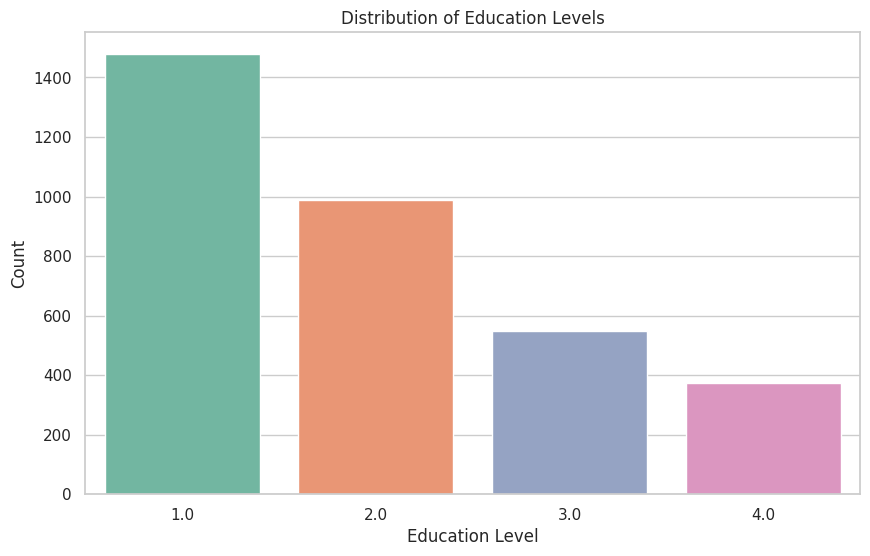

In [33]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of education levels because it effectively displays the frequency of each category within a single categorical variable. This allows for easy comparison of the education levels present in the dataset, providing insight into the educational demographics of the population.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart suggests that there are higher numbers of individuals with education level 1.0 compared to those with education levels 2.0, 3.0, and 4.0. This indicates that the majority of the population in the dataset likely has education level 1.0, followed by decreasing numbers for higher education levels. This insight can be useful for understanding the educational distribution within the dataset and potentially identifying any patterns or disparities in educational attainment among the population.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that education level 1.0 has higher numbers than 2.0, 3.0, and 4.0 could potentially lead to positive business impacts by informing targeted marketing or educational campaigns tailored to individuals with varying education levels. However, if the distribution of education levels is skewed due to biases in the dataset or if it does not accurately represent the target market, it could lead to negative growth implications by misguiding business decisions or resource allocations. Therefore, it's important to validate the insights and consider other relevant factors before implementing any strategies based on them.

#### Chart - 9 - Relationship between TenYearCHD and continous variable

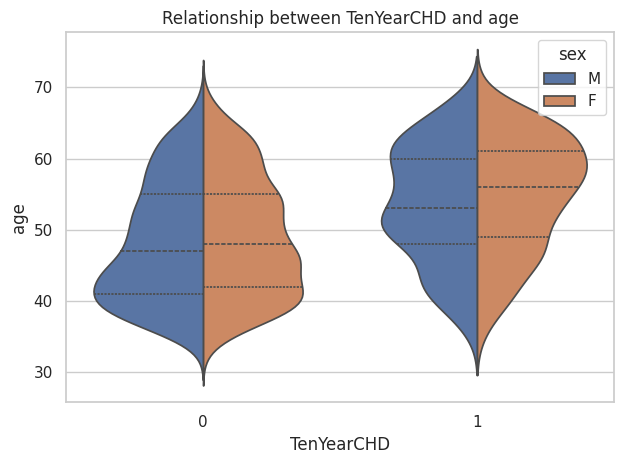

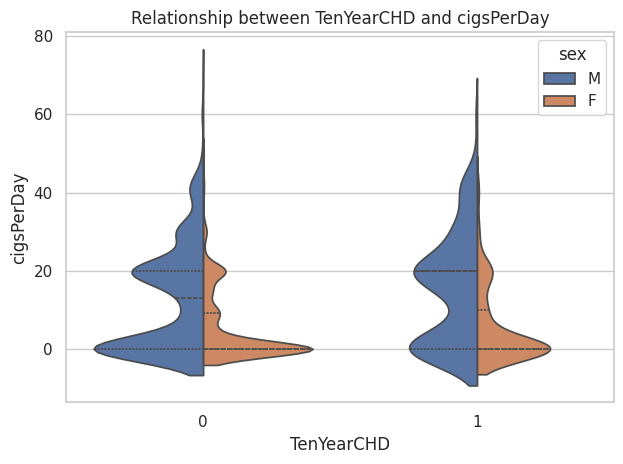

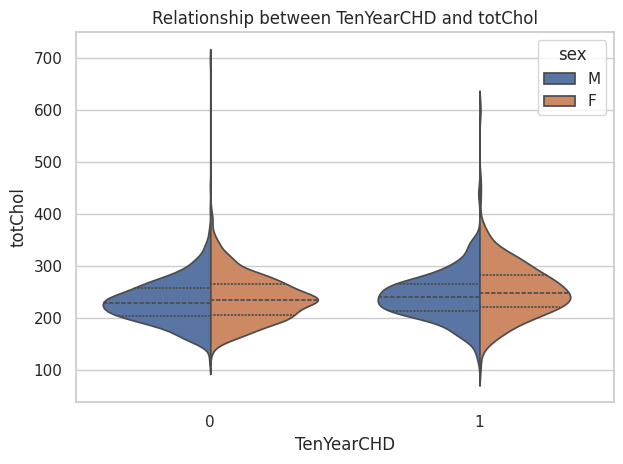

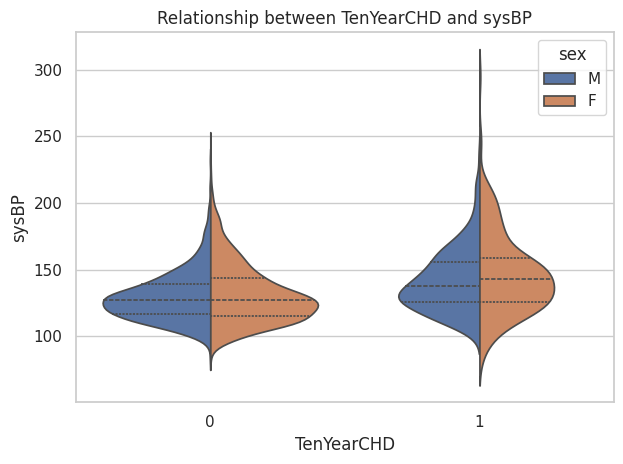

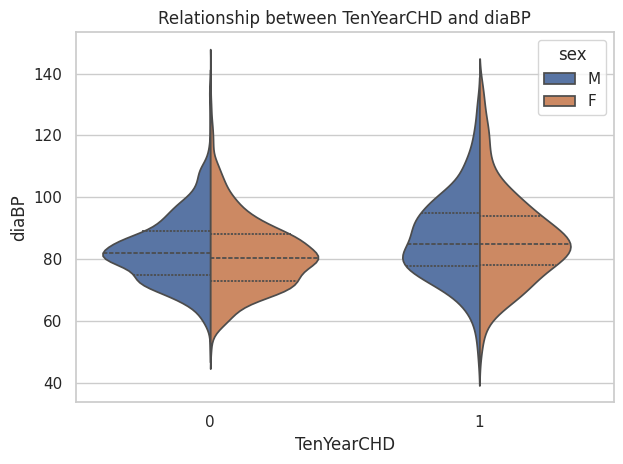

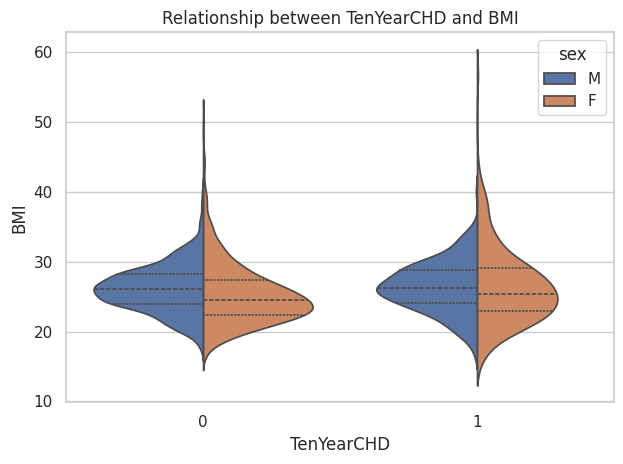

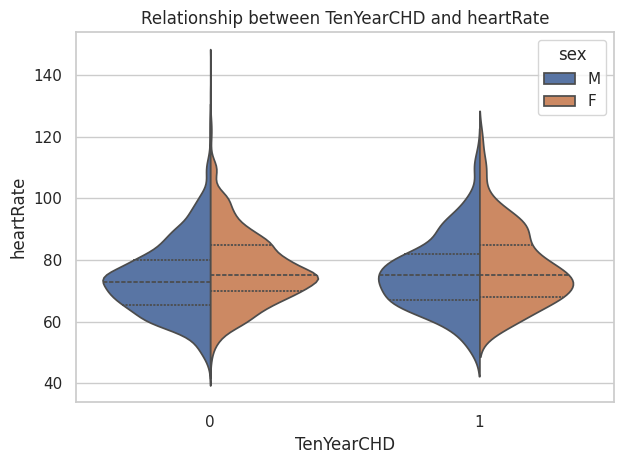

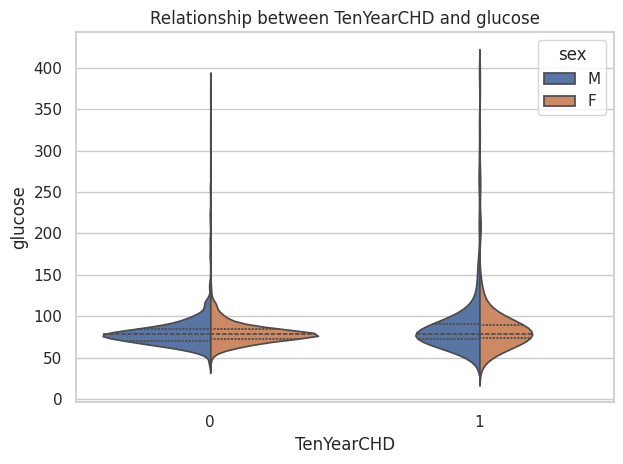

In [34]:
# Chart - 9 visualization code
# Relationship between the dependent variable and continuous independent variables with the help of catplot named violinplot
for i in continuous_var:
    sns.violinplot(data=df, x="TenYearCHD", y=i, hue="sex", split=True, inner="quart")
    plt.title(f'Relationship between TenYearCHD and {i}')
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose a violin plot to visualize the relationship between the dependent variable (TenYearCHD) and continuous independent variables because it effectively displays the distribution of the continuous variable across different categories of the dependent variable. The split violin plot also allows for easy comparison between categories, while the addition of hue (sex) provides further insights into potential gender differences within the data. Overall, the violin plot offers a comprehensive view of the relationship between TenYearCHD and each continuous independent variable, aiding in understanding the data's patterns and distributions.

##### 2. What is/are the insight(s) found from the chart?

Vatious distrubution pattern has been seen for men an women having chd and also do not have chd , some amazing pattern are visible here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin plots could potentially lead to positive business impacts by providing valuable information about the relationship between the risk of coronary heart disease (TenYearCHD) and various continuous independent variables, such as age, cholesterol levels, or blood pressure. These insights can inform the development of targeted prevention and intervention strategies, potentially leading to improved healthcare outcomes and reduced risks for individuals at higher risk of CHD.

However, if the insights reveal concerning patterns, such as a strong association between certain continuous variables and a higher risk of CHD, it could lead to negative growth implications. For instance, if the plots show that individuals with elevated cholesterol levels or blood pressure have a significantly higher risk of CHD, it could indicate a need for more intensive interventions or treatments for these individuals. Failure to address these risks adequately could lead to negative health outcomes and increased healthcare costs in the long run. Therefore, it's crucial to carefully analyze the insights and implement appropriate measures to mitigate any negative impacts.

#### Chart - 10 - % of patients at the risk of CHD by: each variable

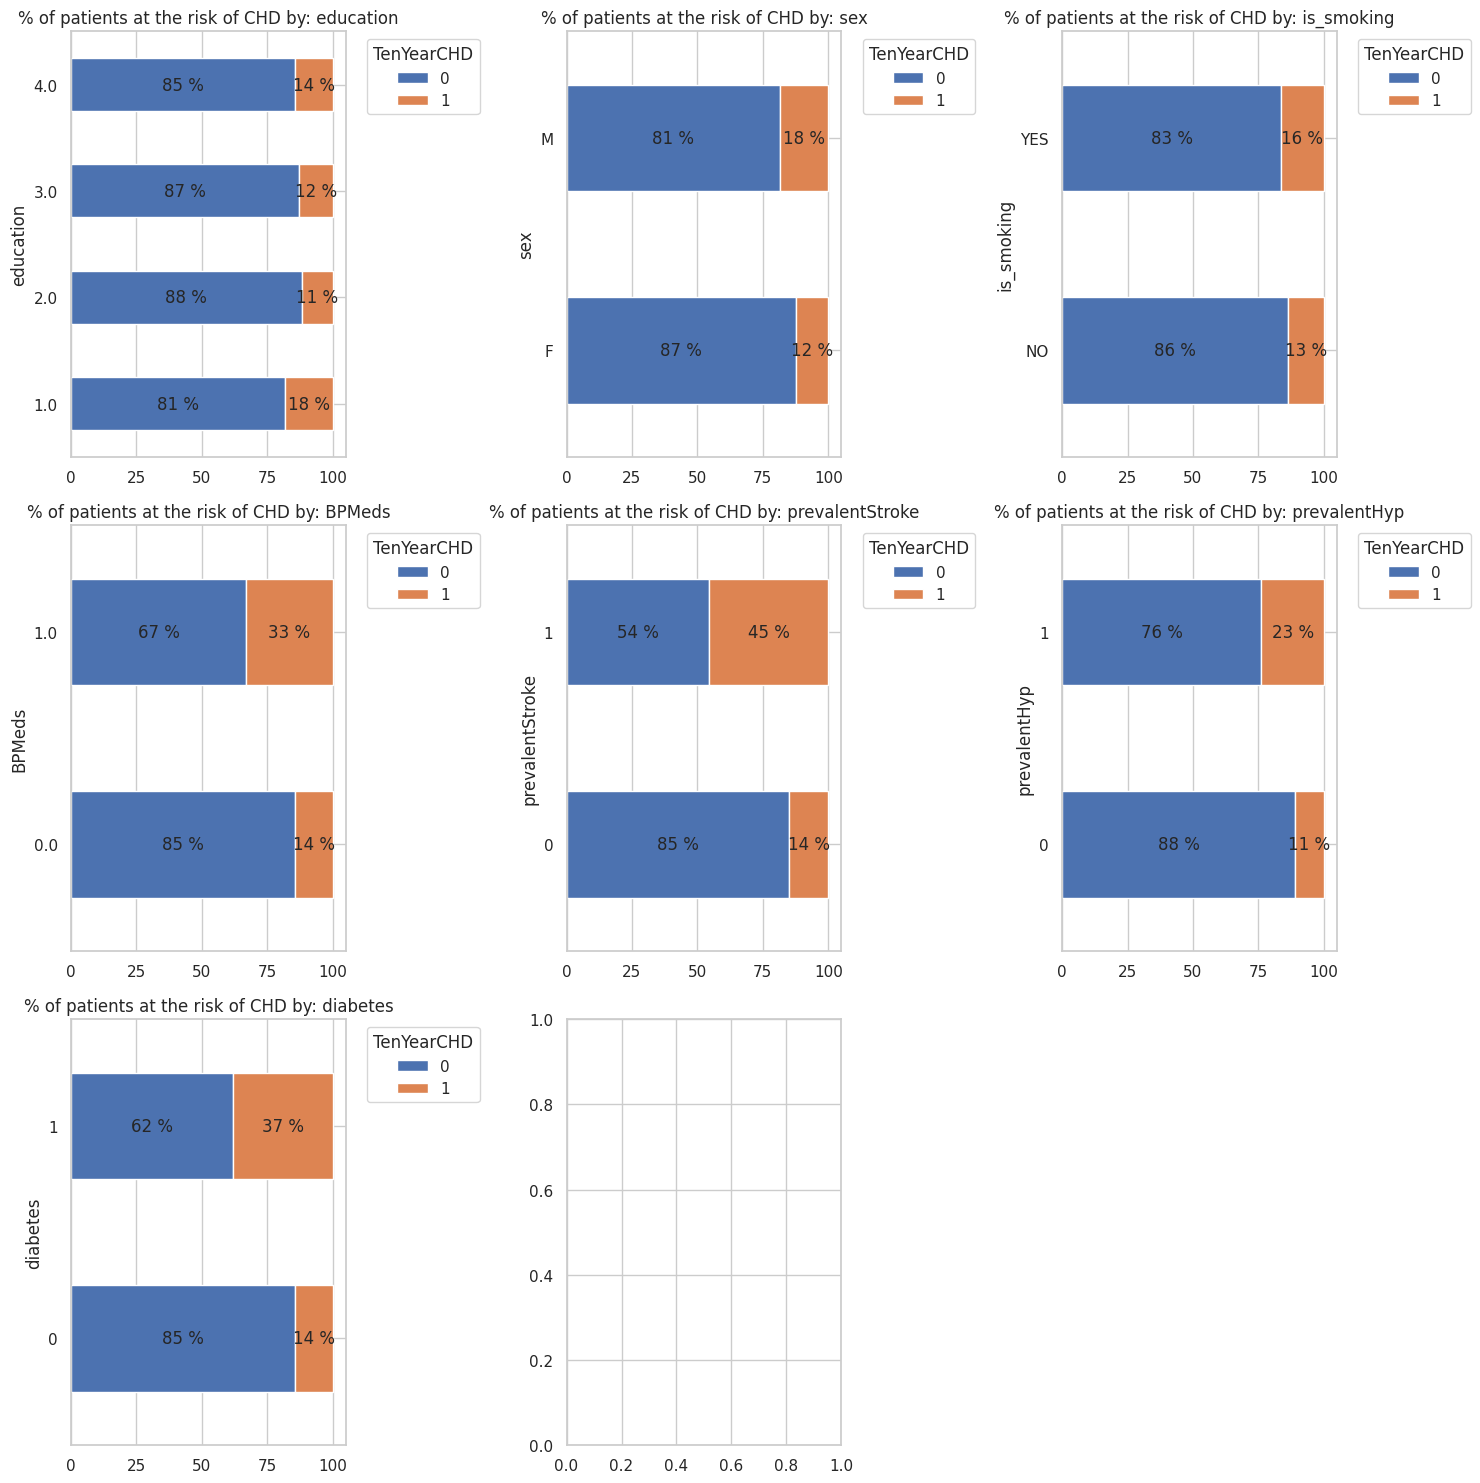

In [35]:
# Chart - 10 visualization code
# 100% stacked bar chart

# Calculate the number of rows needed based on the number of categorical variables
num_rows = (len(categorical_var) - 1) // 3 + 1

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical variables
for i, ax in zip(categorical_var[:-1], axes):
    x_var, y_var = i, dependent_var[0]

    # Calculate percentage and create 100% stacked bar chart
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var) * 100
    df_grouped.plot.barh(stacked=True, ax=ax)

    ax.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var
    )

    ax.set_title("% of patients at the risk of CHD by: " + i)

    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                ax.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap and show plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a 100% stacked bar chart because it effectively illustrates the percentage distribution of individuals at risk of coronary heart disease across different categories of multiple categorical variables. This type of chart allows for easy comparison of the proportions within each category while maintaining the overall proportionality to 100%.

##### 2. What is/are the insight(s) found from the chart?

The insights from the 100% stacked bar chart would reveal the distribution of individuals at risk of coronary heart disease across various categories of categorical variables. For each categorical variable, the chart displays the percentage of individuals at risk of CHD within each category. Insights could include identifying categories with higher or lower proportions of individuals at risk, understanding the relative risk across different demographic or lifestyle factors, and potentially identifying patterns or trends that could inform targeted interventions or preventive measures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the 100% stacked bar chart can help create a positive business impact by informing targeted interventions and preventive measures to reduce the risk of coronary heart disease. However, if the insights reveal disproportionately high risks within certain demographic or lifestyle categories, it could lead to negative growth if not addressed effectively, potentially resulting in increased healthcare costs or adverse health outcomes.

#### Chart - 11 - distribution of categorical variable

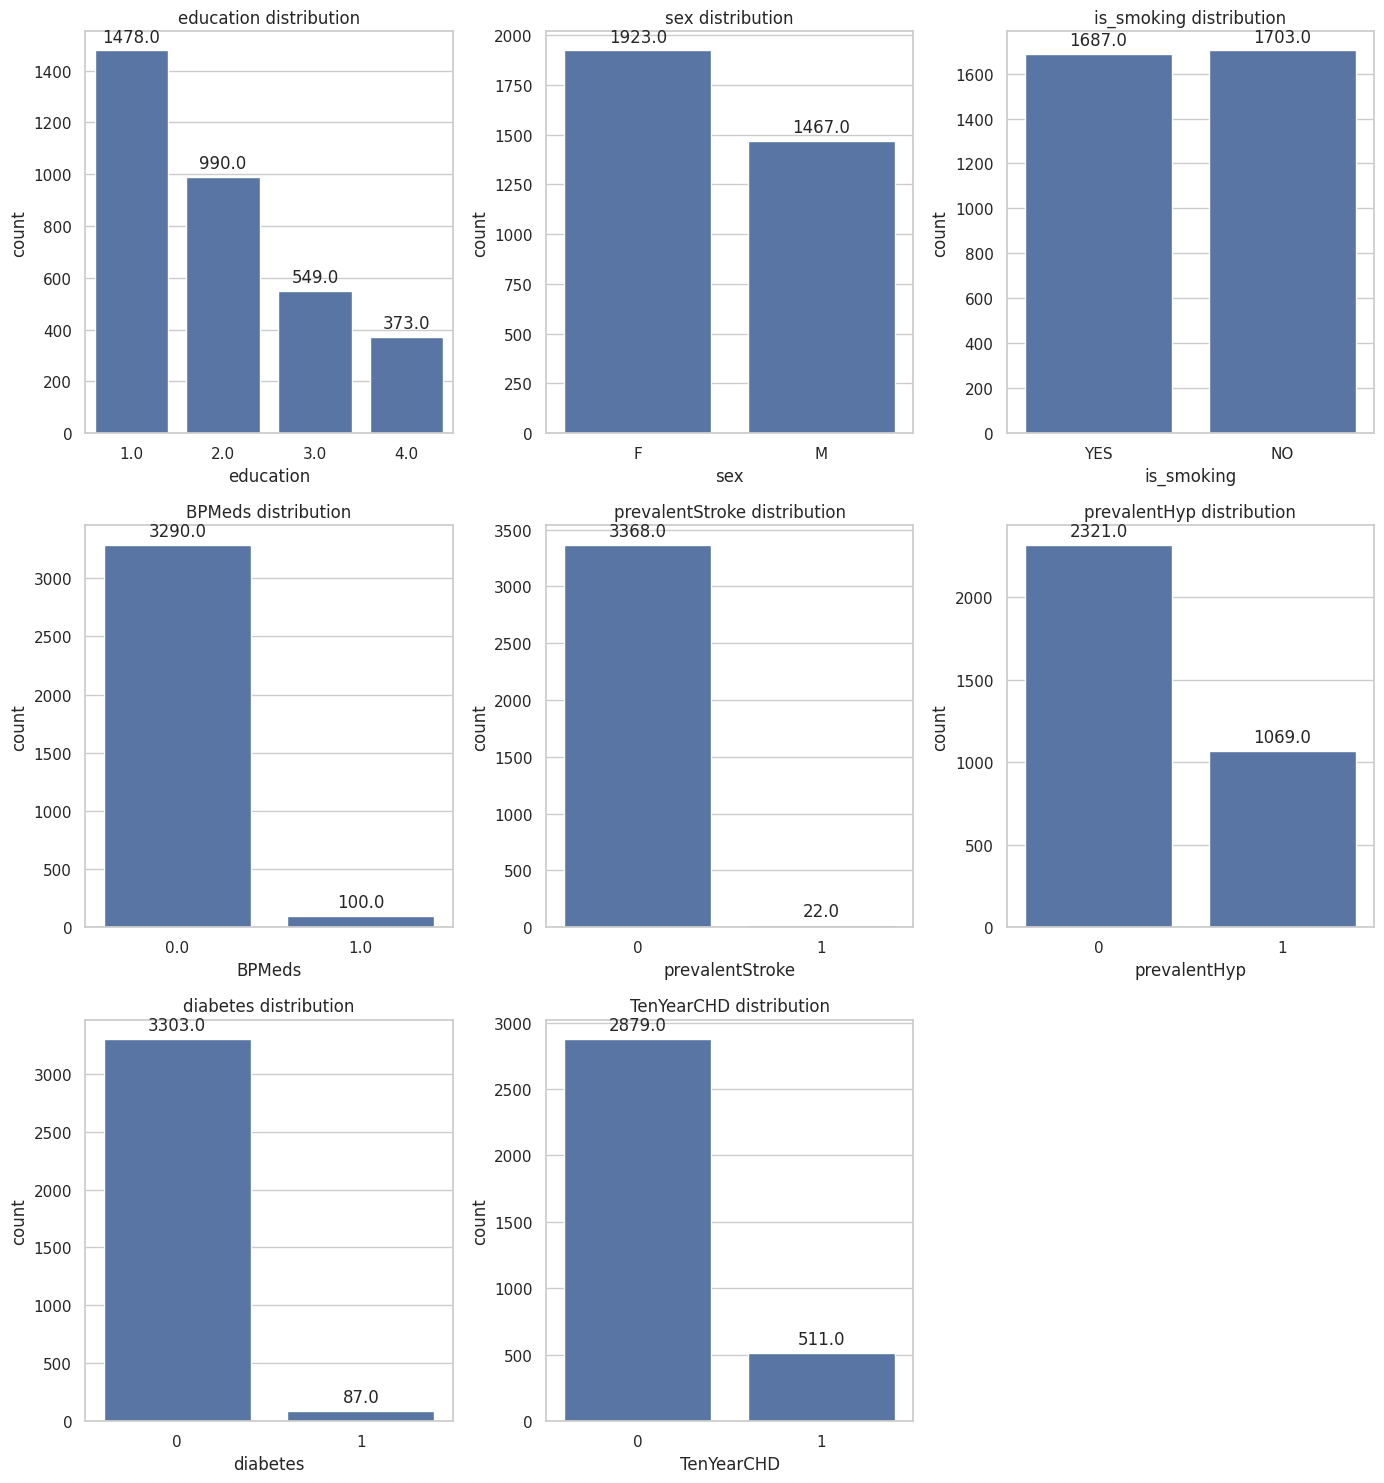

In [36]:
# Chart - 11 visualization code
# Analysing the distribution of categorical variables in the dataset
import math

# Calculate the number of rows needed based on the number of categorical variables
num_vars = len(categorical_var)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through categorical variables
for i, cat_var in enumerate(categorical_var):
    plt.sca(axes[i])
    p = sns.countplot(x=cat_var, data=df)
    plt.xlabel(cat_var)
    plt.title(cat_var + ' distribution')

    # Annotate each bar with the count
    for bar in p.patches:
        plt.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Hide any empty subplots
for j in range(len(categorical_var), len(axes)):
    axes[j].axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot to analyze the distribution of categorical variables because it provides a clear visual representation of the frequency of each category within the dataset. This type of chart is effective for comparing the distribution of different categories across multiple variables, allowing for easy identification of patterns or disparities within the data. Additionally, annotating each bar with the count provides additional context and clarity to the visualization.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart highlight the imbalanced distribution of categorical variables, particularly in Bpmeds, Prevalentstroke, Prevalenthyp, diabetes, and the target variable TenYearCHD. This suggests that certain categories within these variables may be underrepresented or overrepresented compared to others, potentially impacting the robustness of predictive models and requiring careful consideration during analysis and model development.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying imbalanced distributions in categorical variables can help create a positive business impact by informing strategies to address data imbalance and improve the performance of predictive models. However, if not properly addressed, imbalanced data can lead to negative growth by causing biased model predictions, reduced model accuracy, and potentially overlooking minority classes or important patterns within the data. Therefore, it's essential to implement appropriate techniques such as oversampling, undersampling, or using advanced algorithms designed to handle imbalanced data to mitigate these negative impacts and ensure the reliability of the predictive models.

#### Chart - 12 - Distribution of continous variable

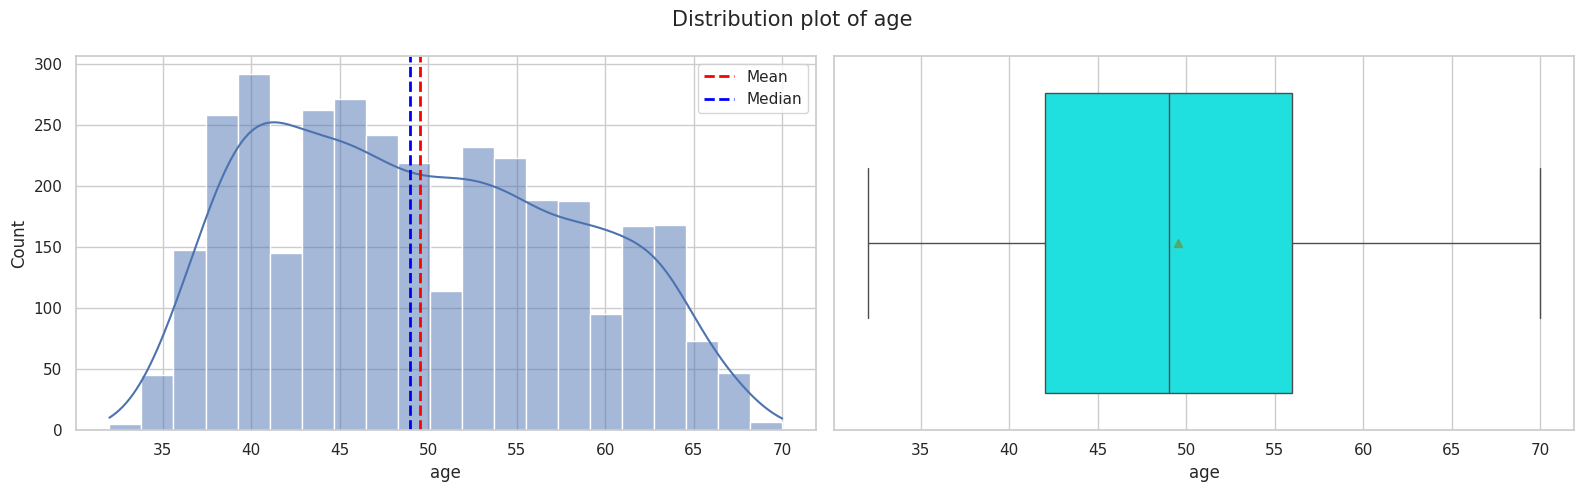

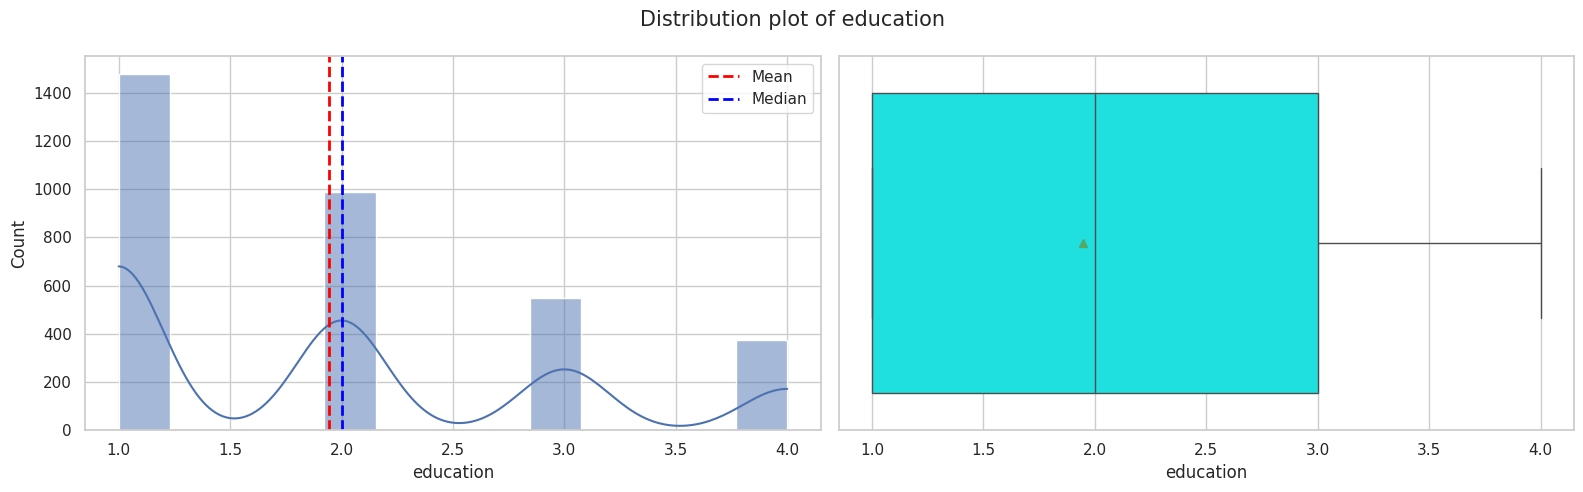

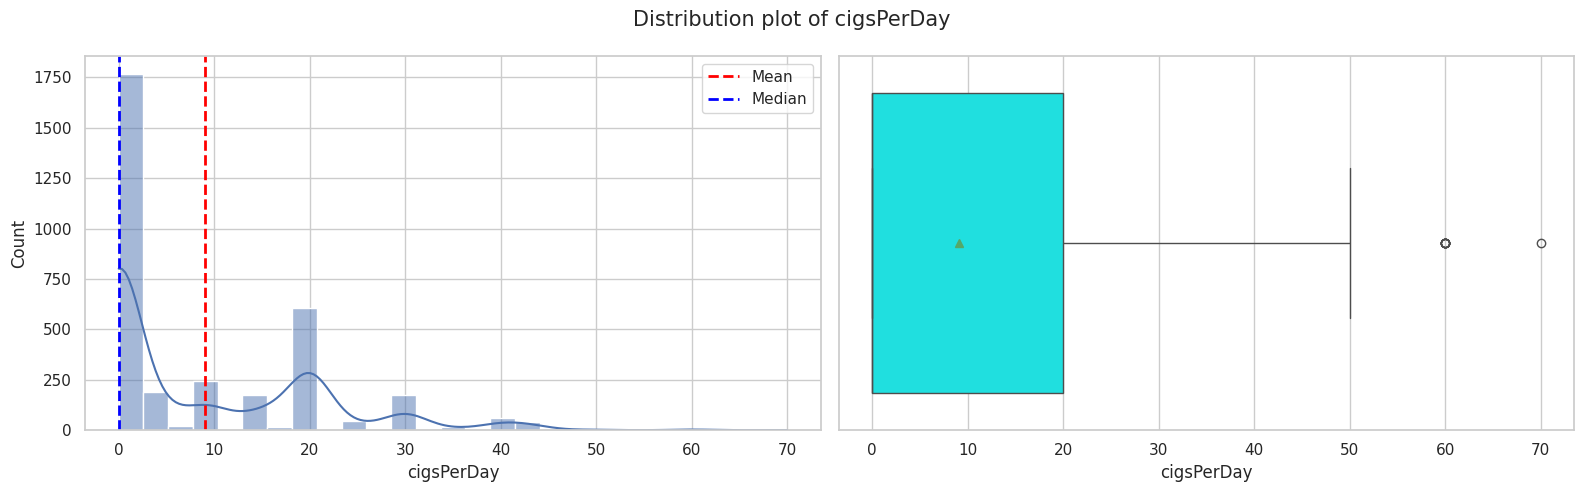

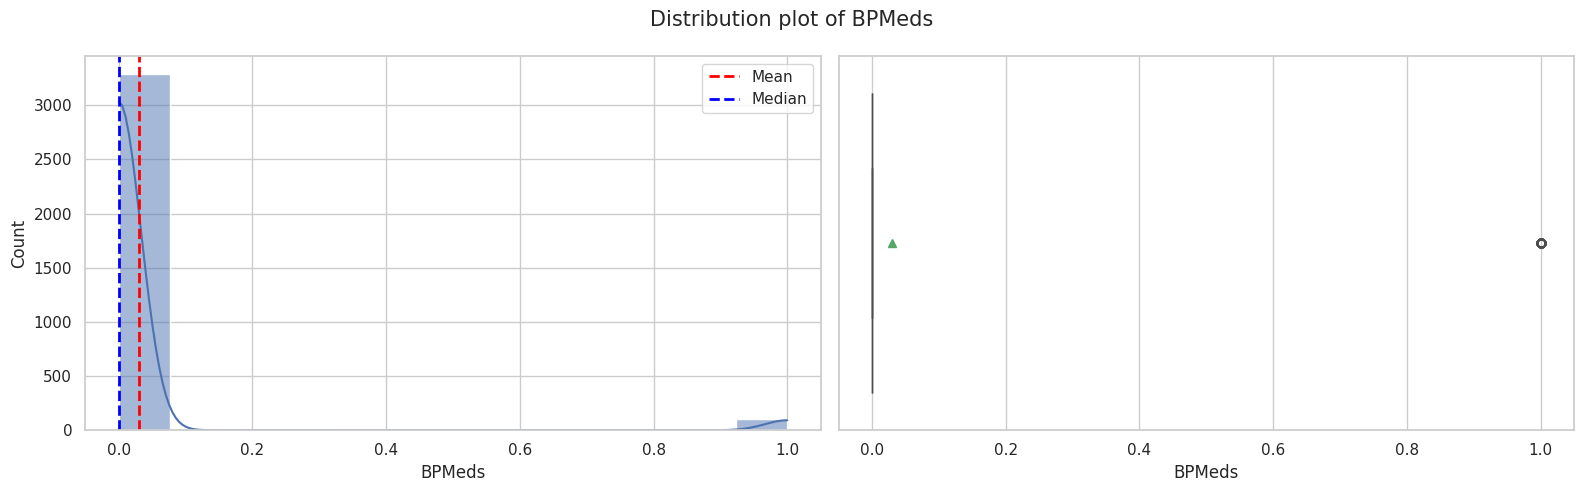

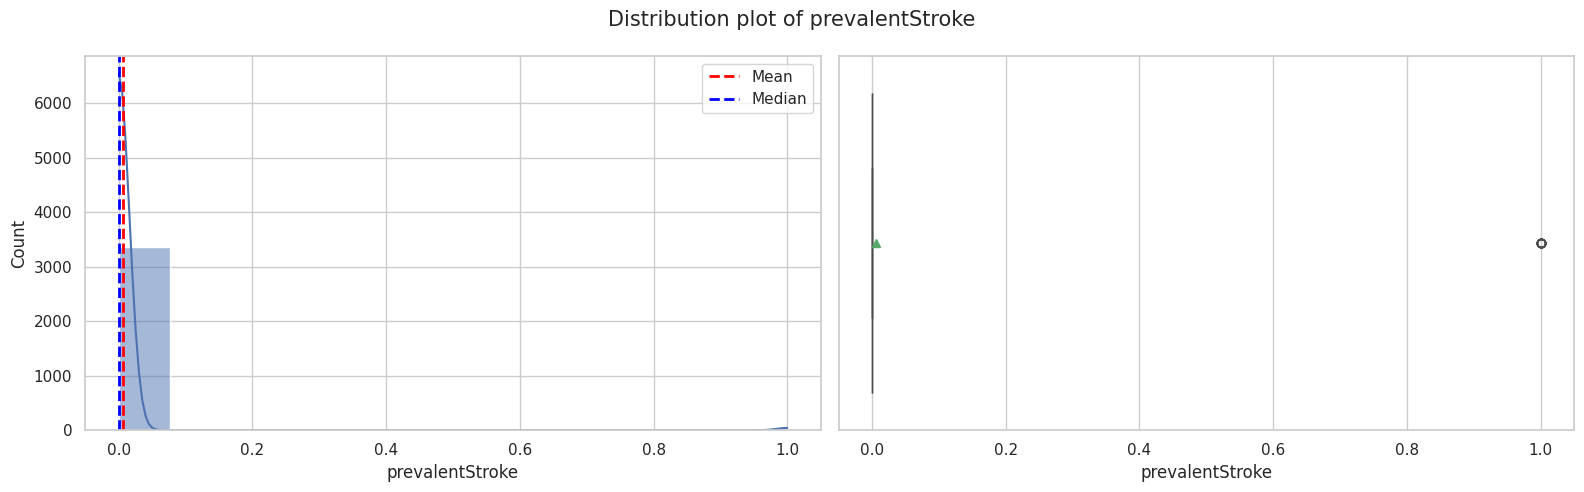

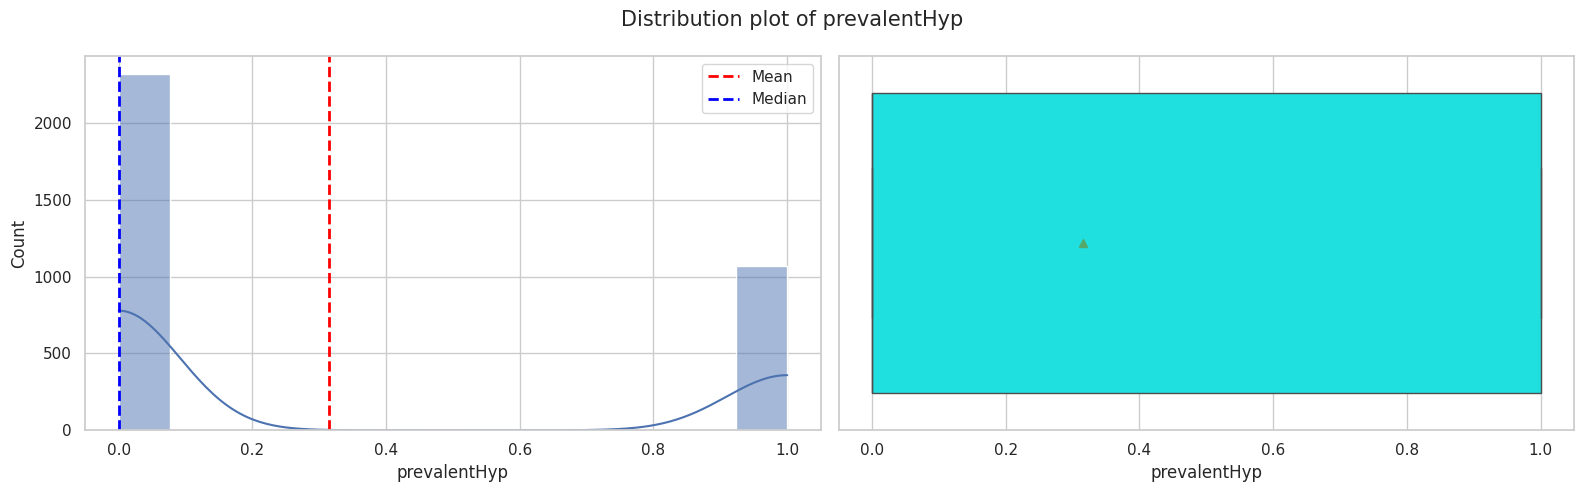

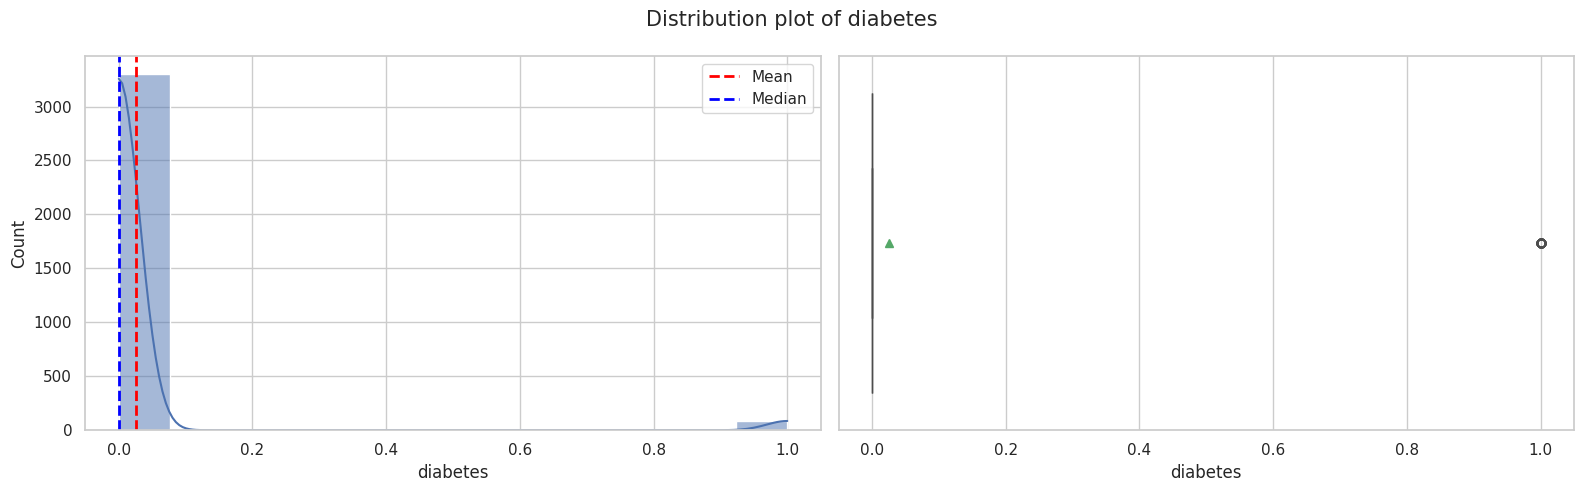

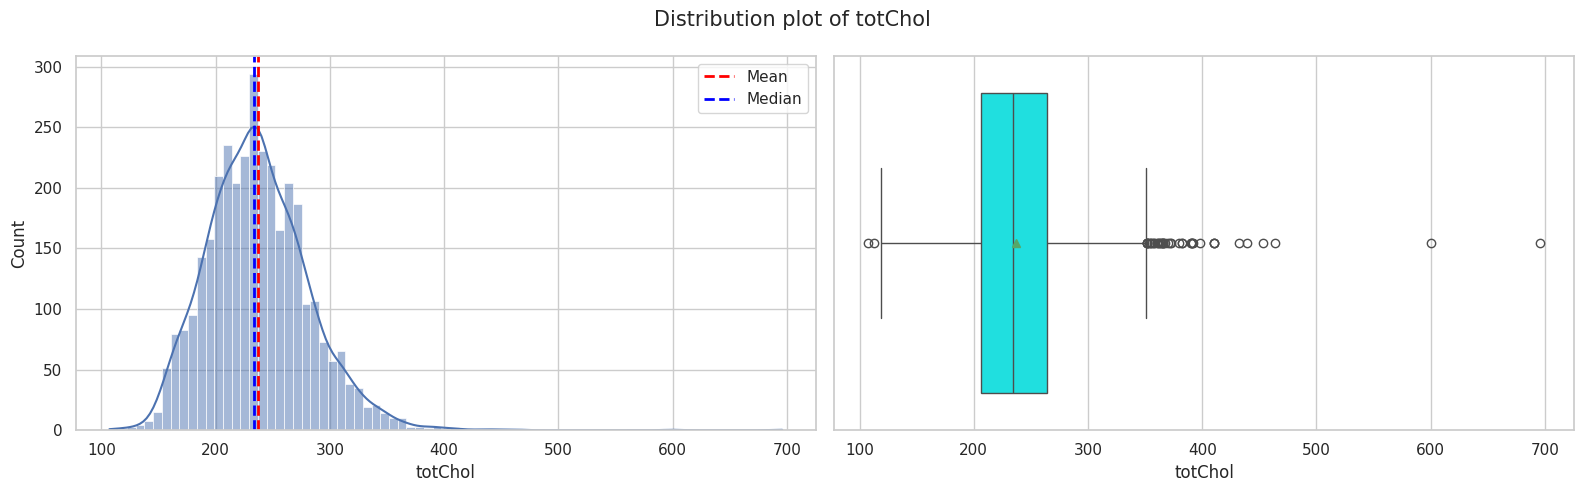

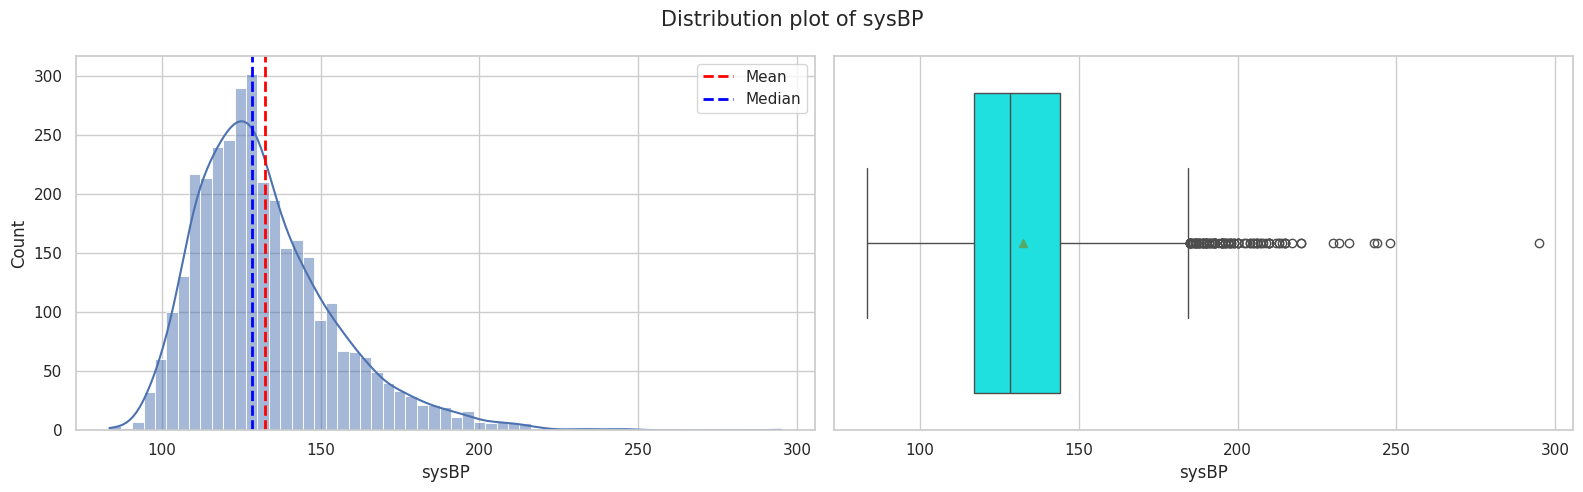

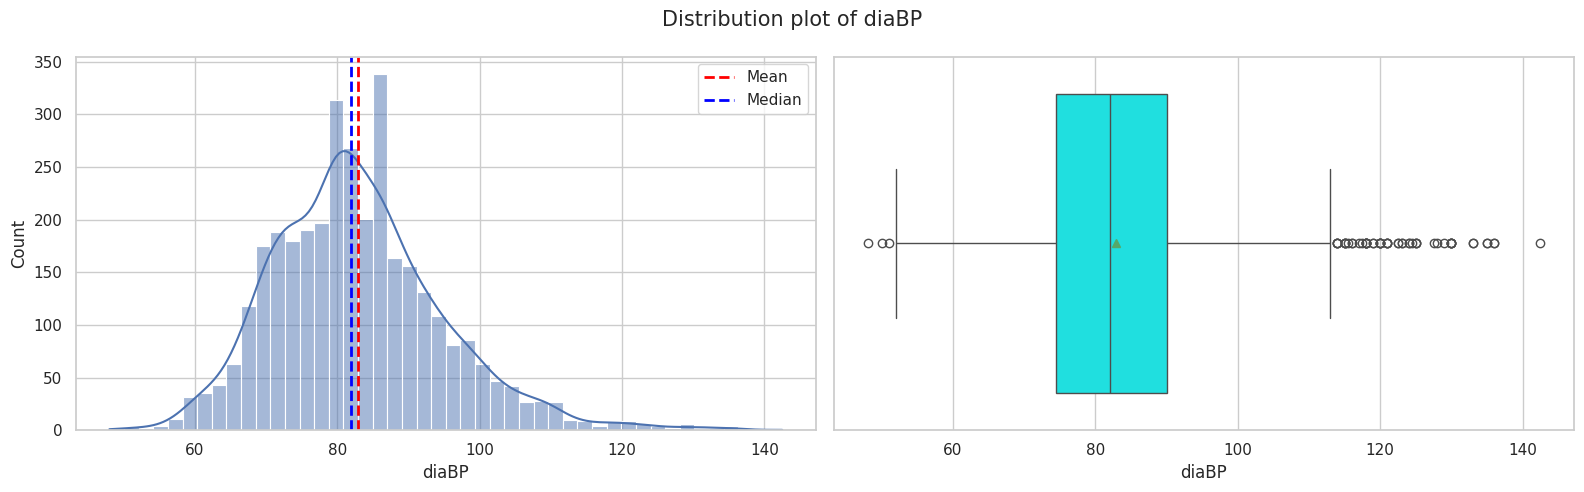

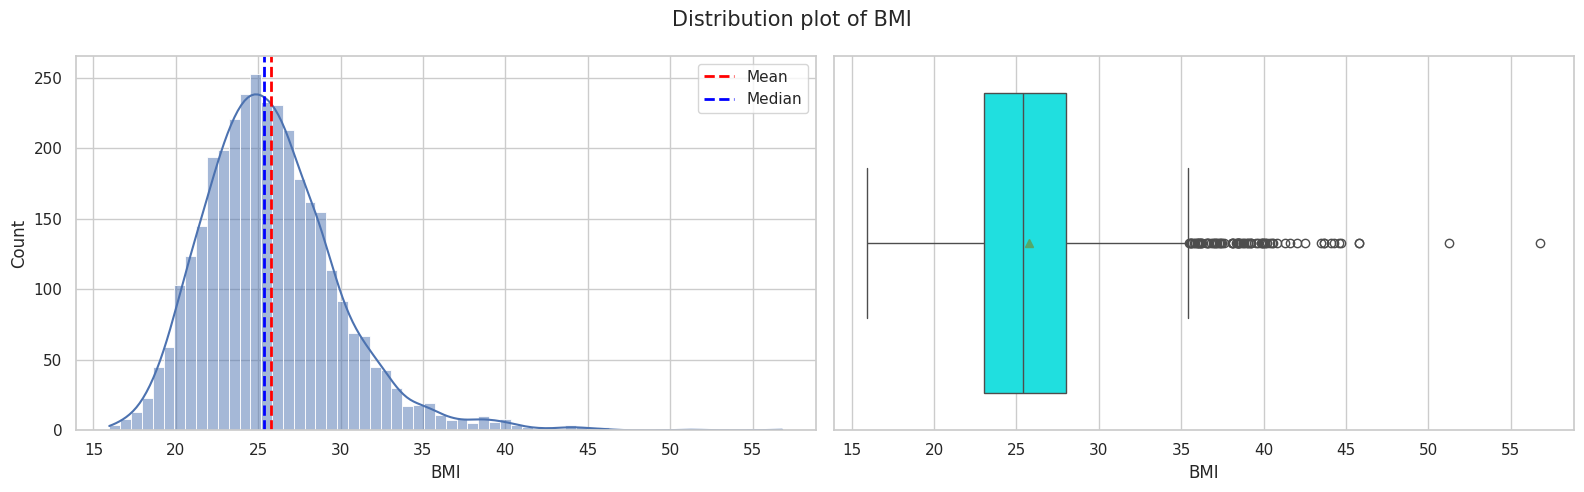

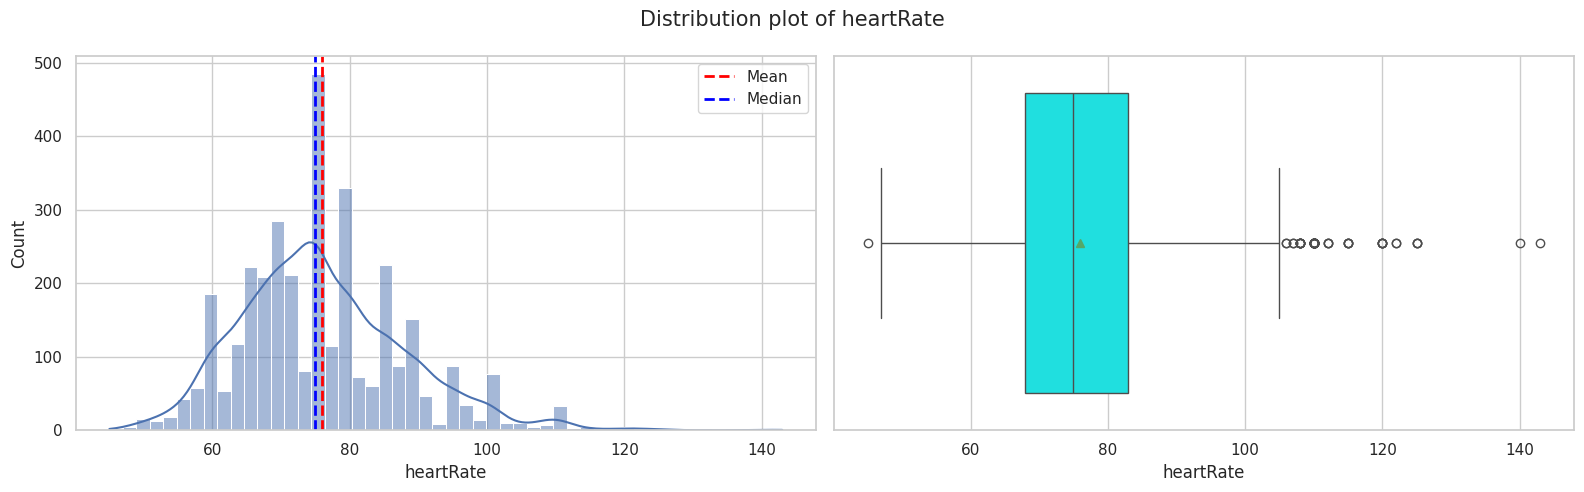

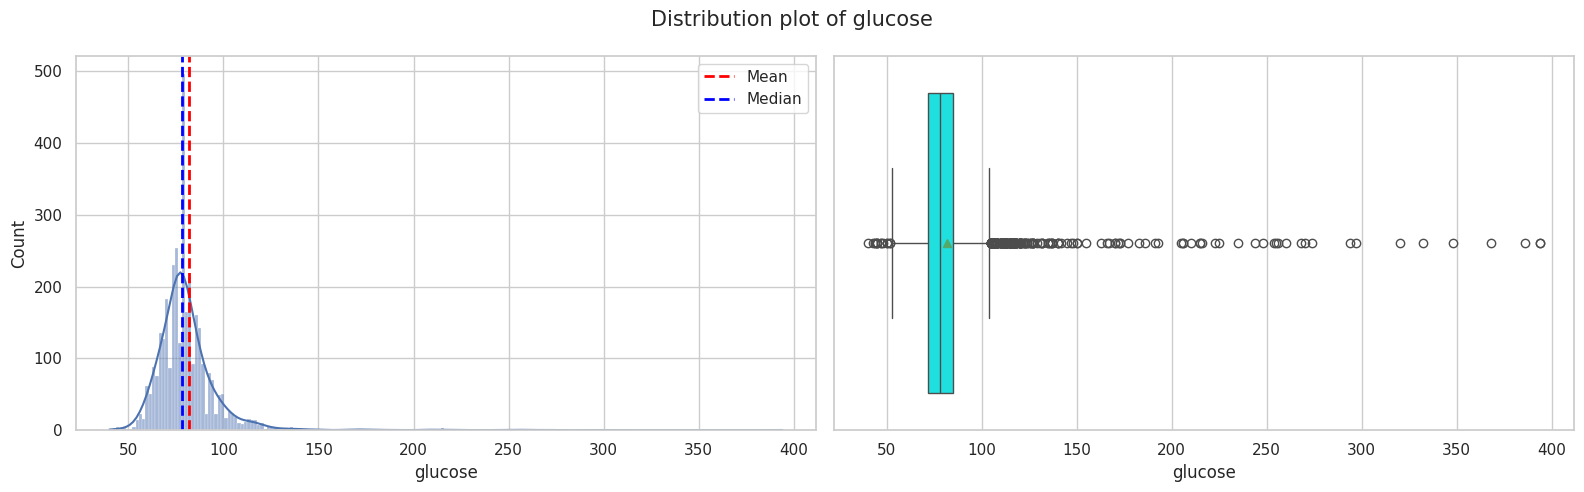

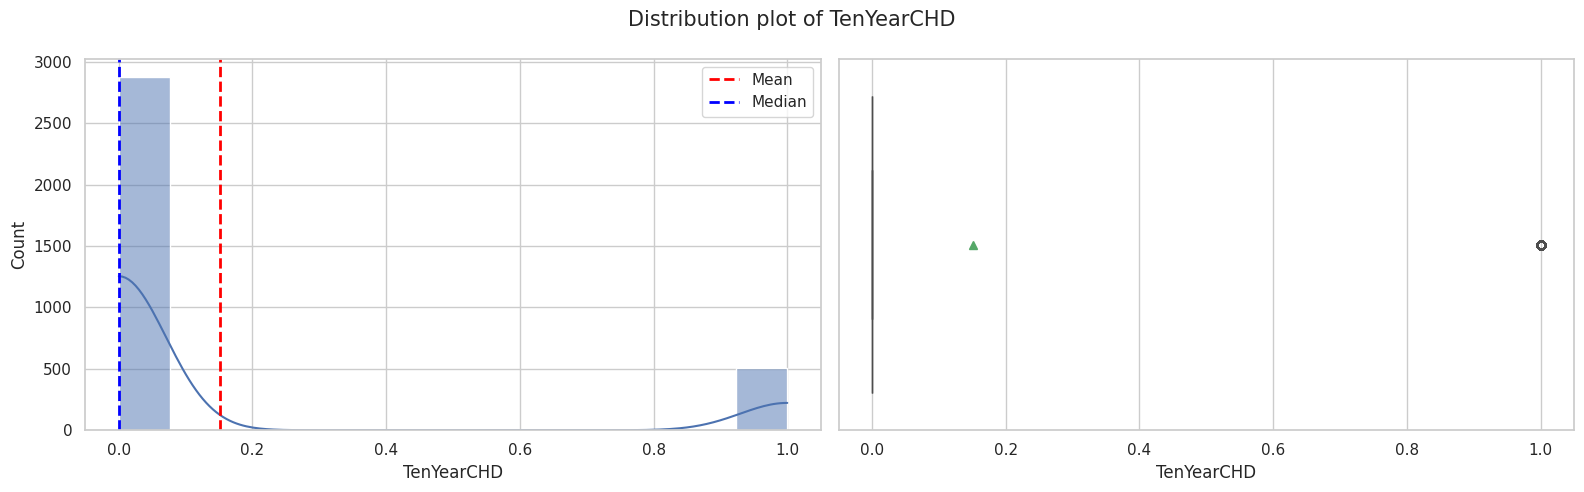

In [37]:
# Chart - 12 visualization code
# Visualizing code of histogram plot & boxplot for each column to know the data distribution
for col in df.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Histogram with mean and median lines
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(df[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Boxplot with mean line
    sns.boxplot(df[col], ax=axes[1], orient='h', showmeans=True, color='cyan')

    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

I chose to create a combination of histogram plots and boxplots for each column because this allows for a comprehensive visualization of the data distribution. The histogram provides insights into the shape and spread of the distribution, while the boxplot offers additional information on central tendency, variability, and potential outliers. By displaying both plots side by side, we can gain a more complete understanding of the distribution characteristics of each column in the dataset. Additionally, adding mean and median lines to the histogram provides further context on central tendency, aiding in interpretation. Overall, this combination of plots facilitates a deeper exploration of the dataset's numerical features.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart reveal the presence of outliers in the data, as indicated by data points extending beyond the whiskers of the boxplot. Additionally, the combination of histogram and boxplot visualizations highlights potential data imbalances and anomalies in the dataset's distribution, aiding in the identification of skewed or asymmetrical distributions and irregularities in central tendency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying outliers and anomalies in the data can help create a positive business impact by informing data cleansing and preprocessing strategies to improve the quality and reliability of analytical models. However, if not properly addressed, these insights could lead to negative growth by compromising the accuracy and effectiveness of predictive models, resulting in biased or misleading conclusions that may adversely affect business decisions or outcomes. Therefore, addressing outliers and anomalies through appropriate data preprocessing techniques is crucial to ensure the reliability and effectiveness of subsequent analyses and business decisions.

#### Chart - 13 - Distribution Plot

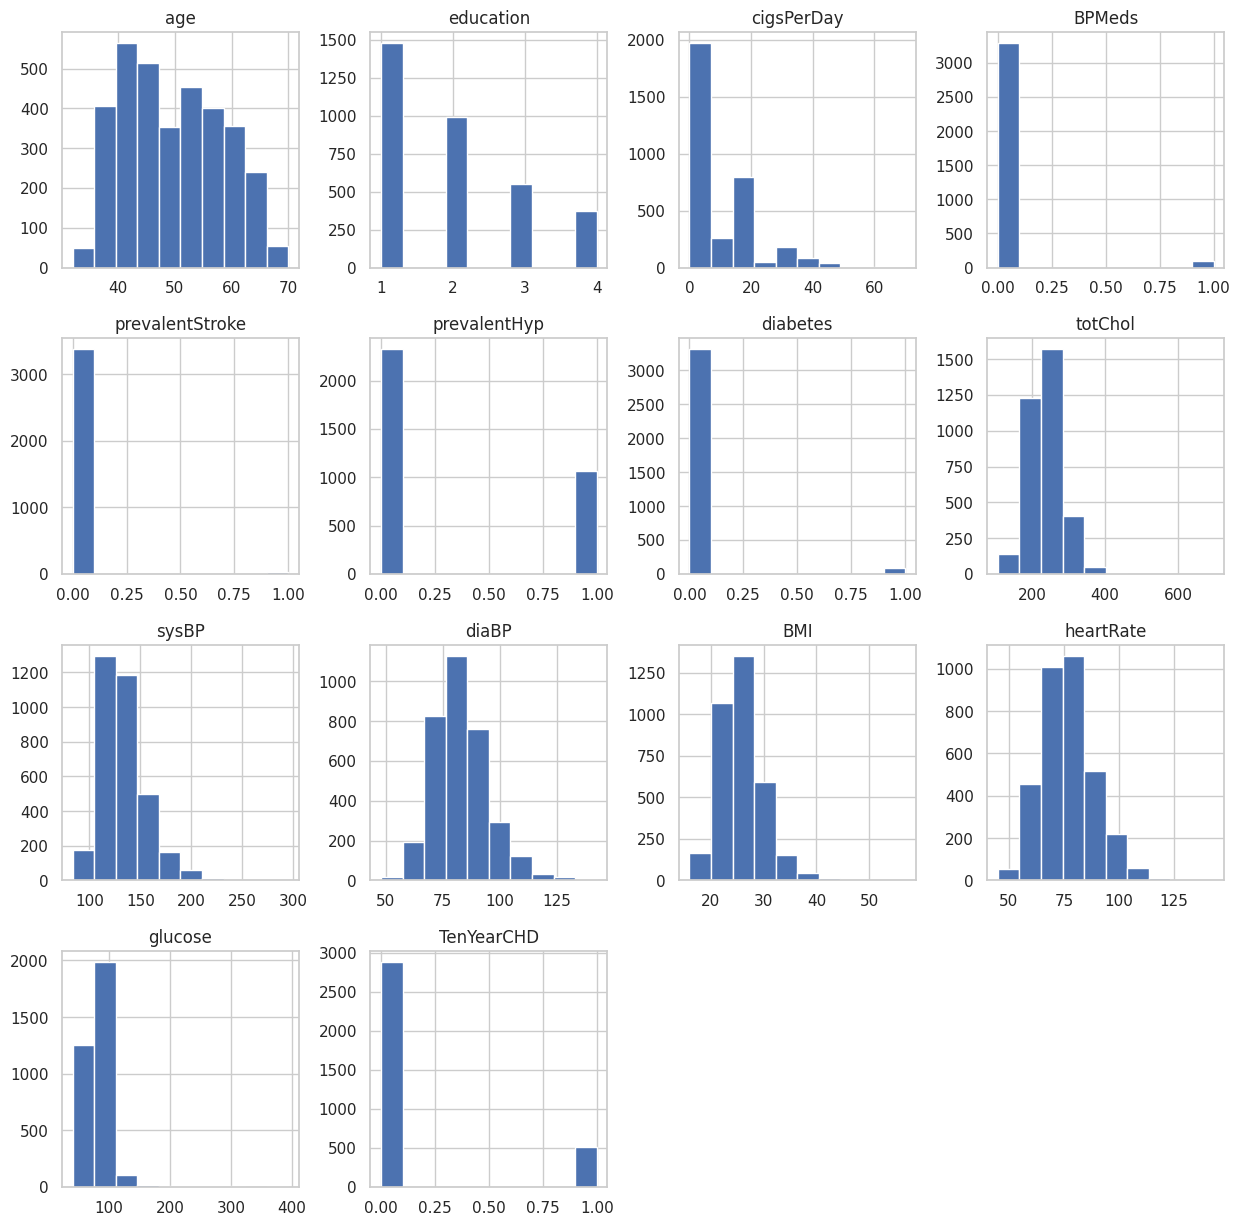

In [38]:
# Visualizing distributions using Histograms:
df.hist(figsize=(15, 15), grid=True);

##### 1. Why did you pick the specific chart?

I chose histograms for visualizing distributions because they provide a clear representation of the frequency distribution of numerical variables in the dataset. By plotting histograms for each numerical variable, we can quickly assess the shape, spread, and central tendency of the data, as well as identify any potential outliers or patterns within each variable. The use of histograms allows for a comprehensive exploration of the dataset's numerical characteristics in a single visualization, aiding in data exploration and understanding.

##### 2. What is/are the insight(s) found from the chart?

The insight from the histograms reveals that many of the numerical variables in the dataset exhibit skewness, indicating that their distributions are not symmetrical. Additionally, the presence of data imbalances suggests that certain values or ranges are more prevalent than others within these variables. These observations are important for understanding the characteristics of the dataset and may warrant further investigation into the underlying reasons for the skewness and imbalances, as well as consideration of appropriate data preprocessing techniques before conducting further analysis or modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from identifying skewness and data imbalance in the dataset can potentially lead to positive business impacts by informing data preprocessing strategies to improve the accuracy and reliability of analytical models. However, if not properly addressed, these insights could lead to negative growth by compromising the effectiveness of predictive models, resulting in biased or inaccurate predictions that may adversely affect business decisions or outcomes. Therefore, addressing skewness and data imbalance through appropriate preprocessing techniques is crucial to ensure the reliability and effectiveness of subsequent analyses and business decisions.

#### Chart - 14 - Correlation Heatmap

Non-numeric columns: Index(['sex', 'is_smoking'], dtype='object')


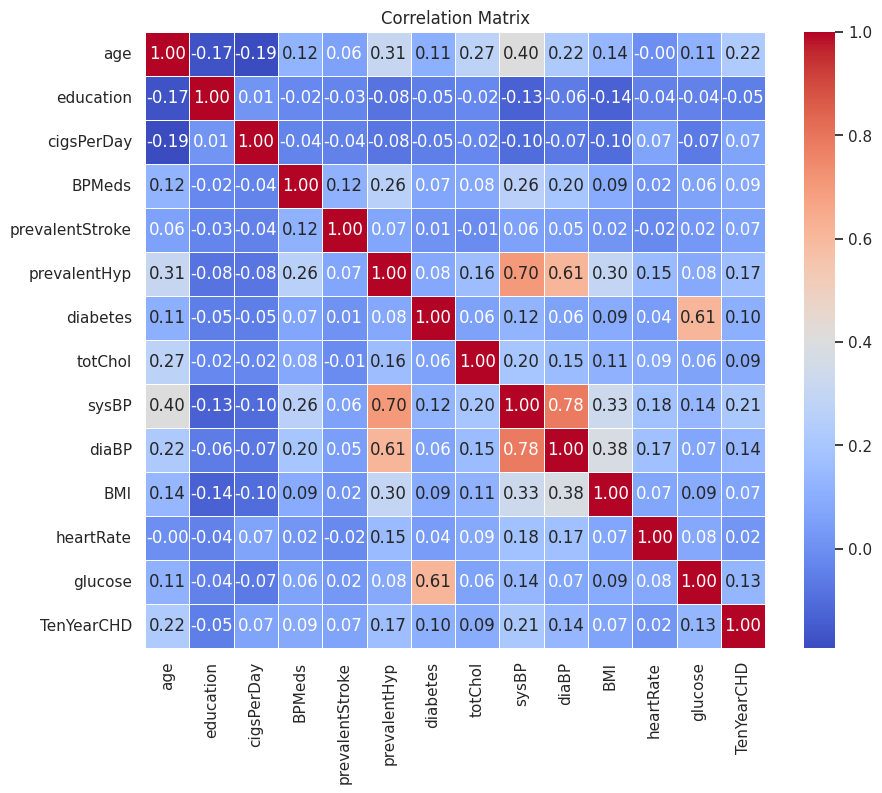

In [39]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# Display non-numeric columns
print("Non-numeric columns:", non_numeric_columns)

# Handle non-numeric data
# For example, you can drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a heatmap of the correlation matrix because it effectively visualizes the relationships between numeric variables in the dataset. This allows for easy identification of patterns and strengths of correlations between different features, providing valuable insights into potential multicollinearity or dependencies among variables. The heatmap with annotated correlation values enhances readability and facilitates quick interpretation of the relationships within the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insight from the correlation matrix heatmap indicates that there is significant correlation between the variables sysbp, diabp, and prevalenthyp. Specifically, sysbp and diabp exhibit a high correlation with each other, suggesting a strong linear relationship between systolic and diastolic blood pressure measurements. Additionally, both sysbp and diabp show a high correlation with the variable prevalenthyp, indicating a potential association between hypertension prevalence and blood pressure levels. This insight highlights the interrelatedness of these variables within the dataset, which could be important for understanding cardiovascular health and informing healthcare interventions or risk assessment strategies.

#### Chart - 15 - Pair Plot

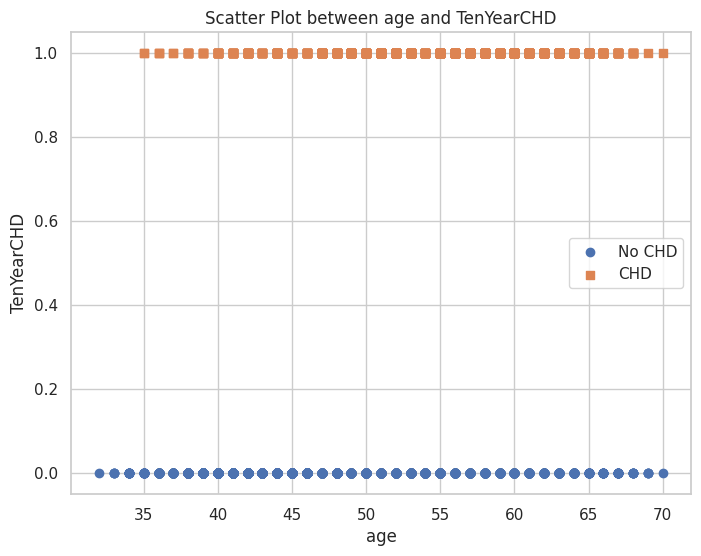

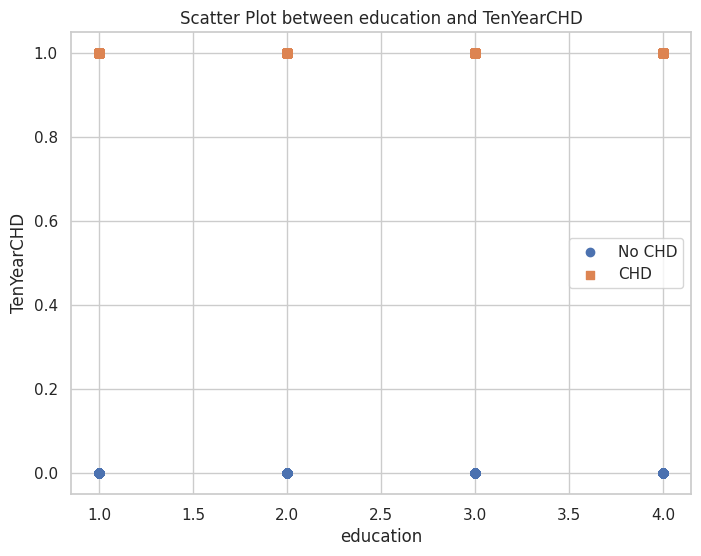

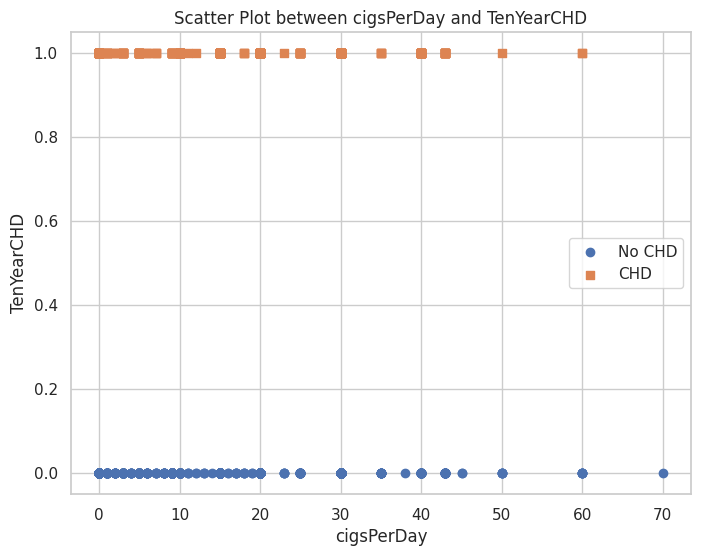

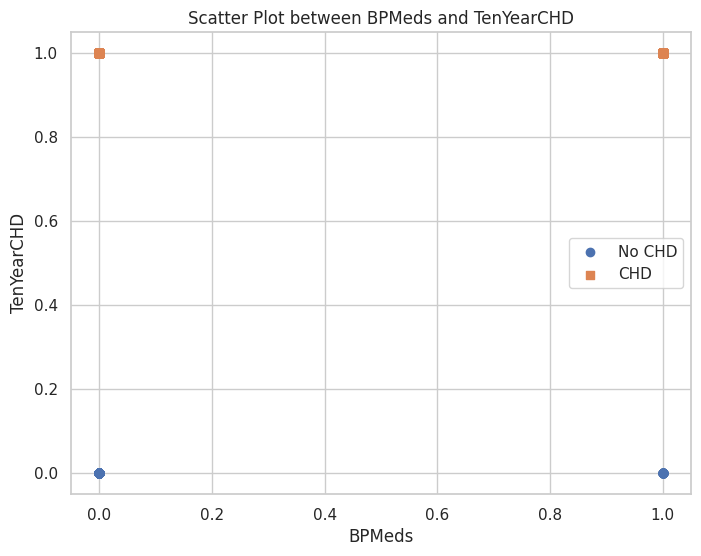

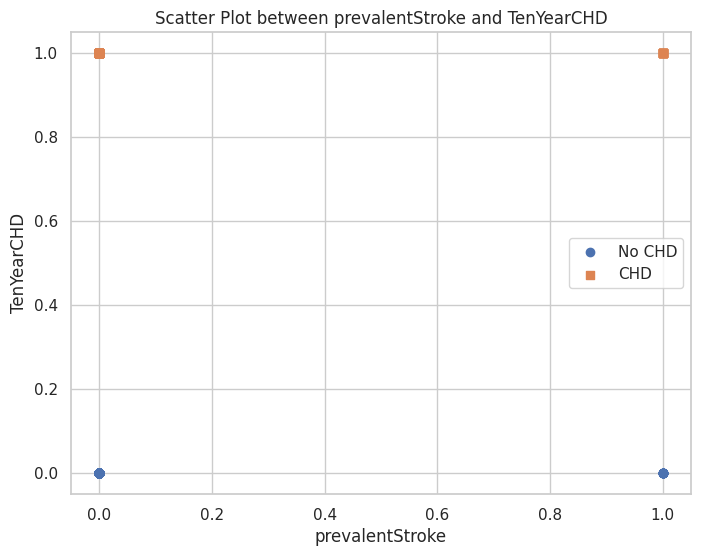

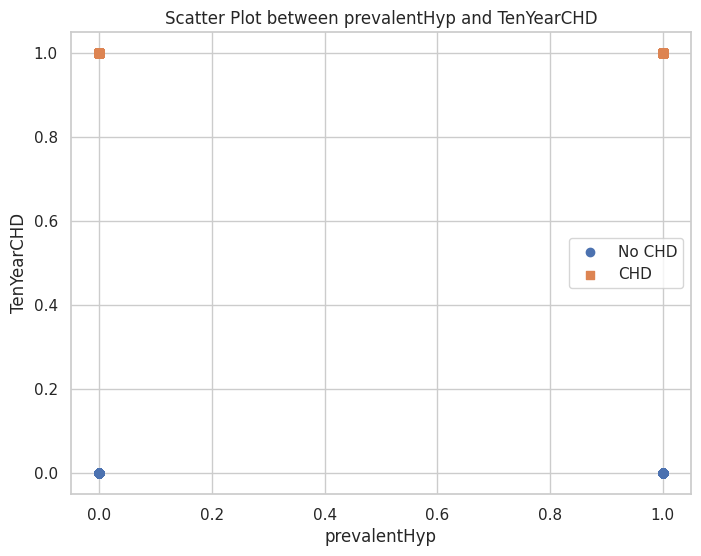

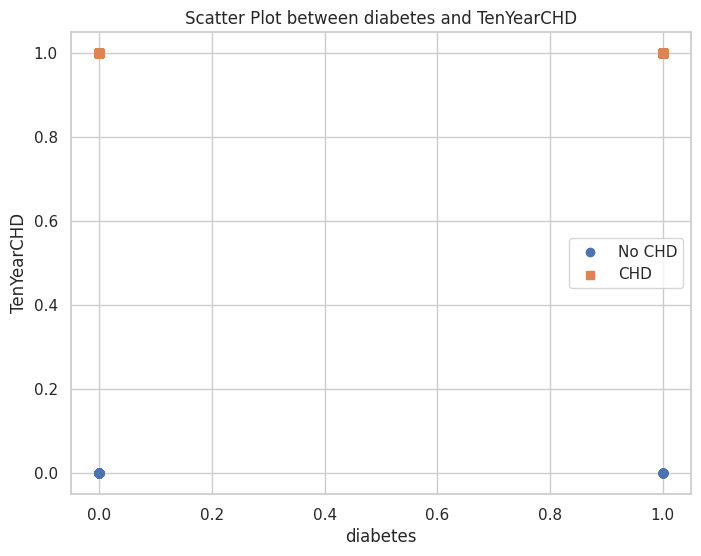

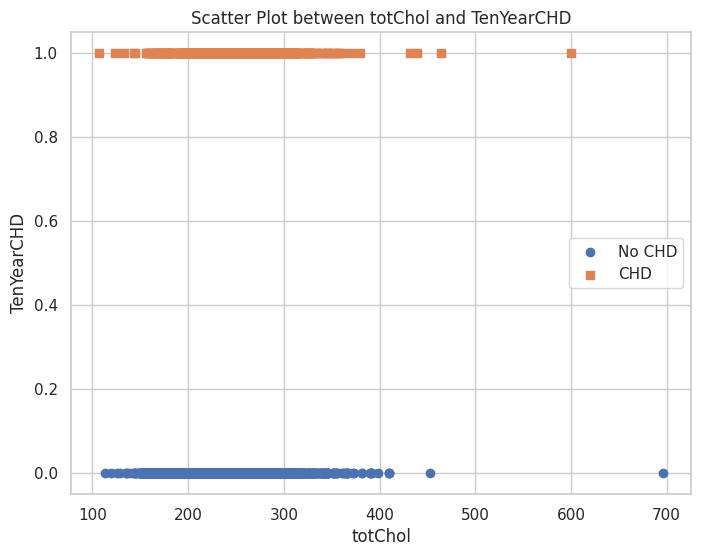

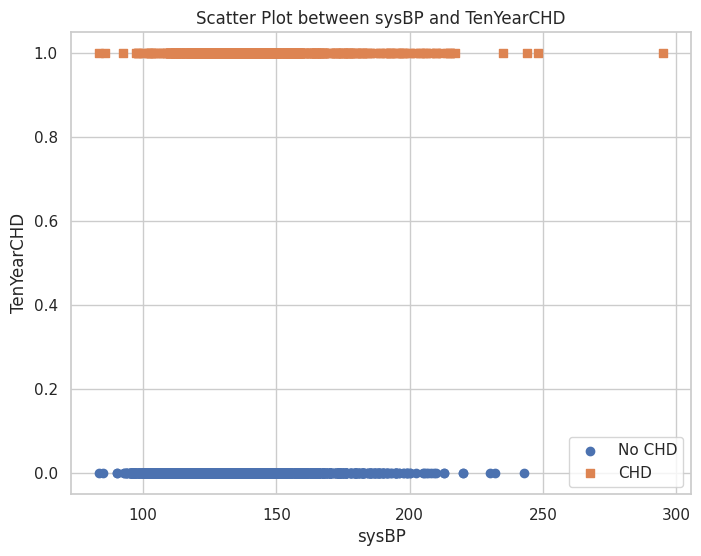

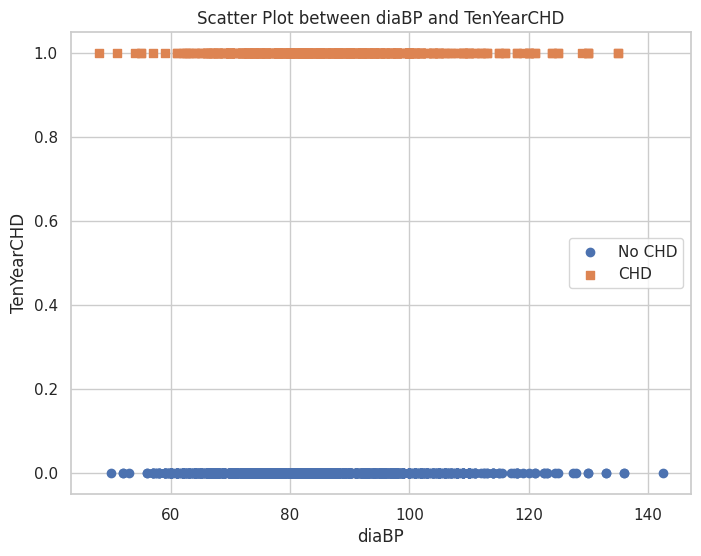

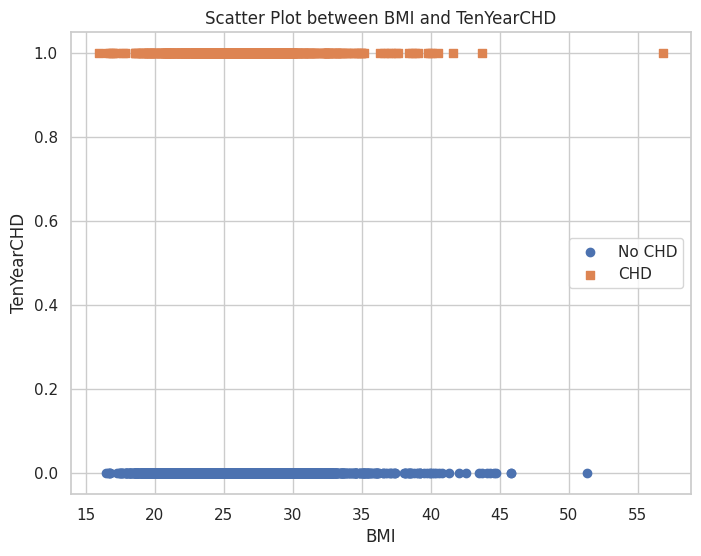

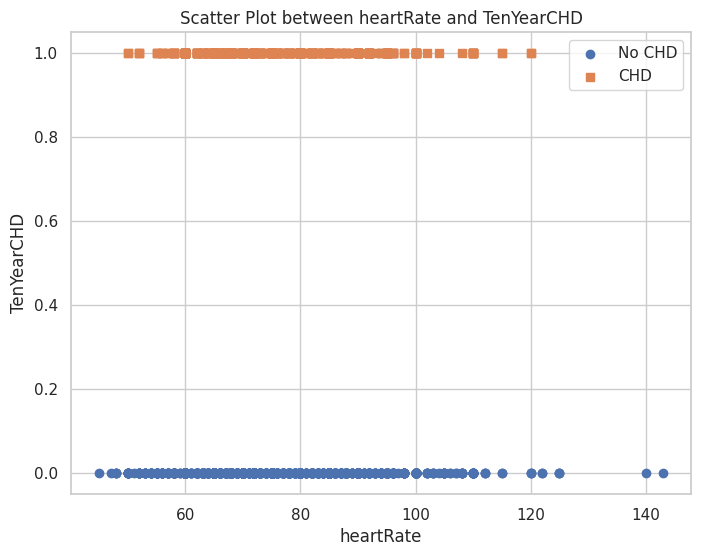

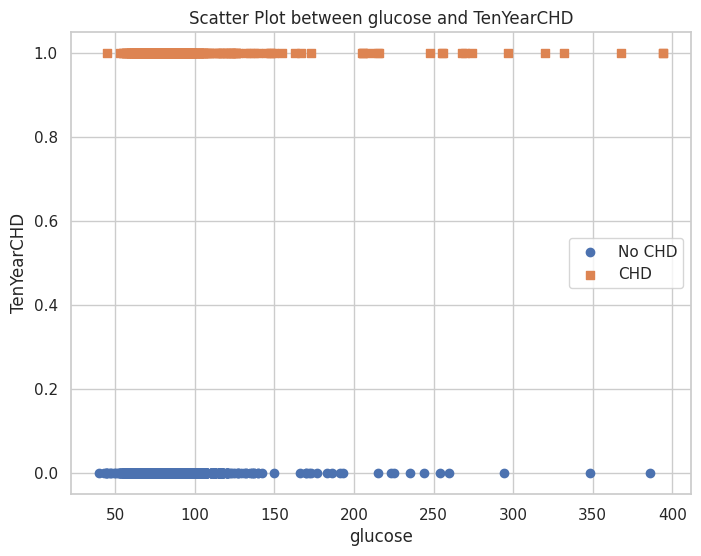

In [40]:
# Assuming df is your dataset and 'TenYearCHD' is the dependent feature
# Replace 'feature1', 'feature2', 'feature3' with your actual independent feature names
independent_features = ['age', 'education', 'cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
dependent_feature = 'TenYearCHD'

# Create scatter plots using a for loop
for feature in independent_features:
    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature][df[dependent_feature] == 0], df[dependent_feature][df[dependent_feature] == 0], label='No CHD', marker='o')
    plt.scatter(df[feature][df[dependent_feature] == 1], df[dependent_feature][df[dependent_feature] == 1], label='CHD', marker='s')

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel(dependent_feature)
    plt.title(f'Scatter Plot between {feature} and {dependent_feature}')
    plt.legend()

    # Show the plot
    plt.show()


##### 1. Why did you pick the specific chart?

I chose scatter plots to visualize the relationship between each independent feature and the dependent feature (TenYearCHD) because scatter plots are effective for examining the relationship between two continuous variables. By plotting the values of each independent feature against the dependent feature, we can visually assess any potential patterns, trends, or associations between them. Additionally, using different markers for the two classes (CHD and No CHD) allows for easy differentiation and interpretation of the data points. Overall, scatter plots provide a clear and intuitive way to explore the relationship between independent and dependent variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The insights from the scatter plots reveal potential linear separability between the two classes (CHD and No CHD) for some independent features. Specifically, the straight lines formed by the data points suggest that certain independent features may serve as effective classifiers for distinguishing between individuals with and without coronary heart disease (CHD). This observation implies that these features may have significant predictive power in identifying individuals at risk of CHD, which could be valuable for risk assessment and decision-making in healthcare settings.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean cholesterol levels (totChol) are the same for smokers and non-smokers.

Alternative Hypothesis (H1): There is a significant difference in mean cholesterol levels between smokers and non-smokers.

#### 2. Perform an appropriate statistical test.

In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate data for smokers and non-smokers
smokers = df[df['is_smoking'] == 'YES']['totChol']
non_smokers = df[df['is_smoking'] == 'NO']['totChol']

# Perform t-test
t_statistic, p_value = ttest_ind(smokers, non_smokers, equal_var=False)

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean cholesterol levels.")
else:
    print("Fail to reject the null hypothesis. No significant difference in mean cholesterol levels.")


T-statistic: -2.7387745786700677
P-value: 0.00619914286429637
Reject the null hypothesis. There is a significant difference in mean cholesterol levels.


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test (ttest_ind) from the scipy.stats module to obtain the p-value. The t-test was applied to compare the mean cholesterol levels between two groups: smokers and non-smokers.

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test because it is appropriate when comparing the means of two independent groups, which is the case in your hypothesis. Here's the rationale:

1. **Nature of the Comparison:**
   - Your hypothesis involves comparing the mean cholesterol levels between two independent groups: smokers and non-smokers.

2. **Parametric Test:**
   - The t-test is a parametric test suitable for comparing means of continuous variables when certain assumptions are met. It assumes that the data follow a normal distribution and that the variances of the two groups are either equal or not significantly different.

3. **Continuous Outcome Variable:**
   - Cholesterol levels are continuous numerical data, making the t-test appropriate for comparing means.

4. **Two Independent Groups:**
   - The independent two-sample t-test is specifically designed for comparing means when dealing with two independent groups.

5. **Equal Variance Assumption:**
   - By setting `equal_var=False` in the `ttest_ind` function, the test is performed under the assumption of unequal variances between the two groups, which is a more robust choice when the variances are not assumed to be equal.

It's important to note that the appropriateness of a statistical test depends on the characteristics of your data and the assumptions of the test. In some cases, alternative tests (such as non-parametric tests) might be considered if assumptions are not met. Always ensure that the chosen statistical test aligns with the nature of your data and the objectives of your analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Age has no effect on the incidence of diabetes.

Alternative Hypothesis (H1): There is a significant association between age and the incidence of diabetes.

#### 2. Perform an appropriate statistical test.

In [42]:
import statsmodels.api as sm
import pandas as pd


# Prepare the logistic regression model
X = df[['age']]
y = df['diabetes']
X = sm.add_constant(X)  # Add a constant term for the intercept

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary statistics
print(result.summary())

# Check if the p-value for 'age' is less than the significance level
if result.pvalues['age'] < 0.05:
    print("Reject the null hypothesis. There is a significant association between age and the incidence of diabetes.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age and the incidence of diabetes.")

Optimization terminated successfully.
         Current function value: 0.113552
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                 3390
Model:                          Logit   Df Residuals:                     3388
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Apr 2024   Pseudo R-squ.:                 0.04841
Time:                        14:57:31   Log-Likelihood:                -384.94
converged:                       True   LL-Null:                       -404.53
Covariance Type:            nonrobust   LLR p-value:                 3.886e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8384      0.742    -10.565      0.000      -9.293      -6.384
age            0.0802      0.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the likelihood-ratio test associated with logistic regression. The logistic regression model is fitted using the Maximum Likelihood Estimation (MLE) method, and the likelihood-ratio test is used to assess the significance of the predictor variable 'age' in predicting the binary outcome 'diabetes.'

##### Why did you choose the specific statistical test?

I chose logistic regression for this analysis because the outcome variable, 'diabetes,' is binary (0 for no diabetes, 1 for diabetes), making it suitable for logistic regression, a type of regression analysis designed for binary outcomes. Here are the reasons for choosing logistic regression:

1. **Nature of the Outcome Variable:**
   - Logistic regression is appropriate for binary outcomes or outcomes that can be dichotomized. In this case, 'diabetes' is binary, making logistic regression a suitable choice.

2. **Log-Odds Transformation:**
   - Logistic regression models the log-odds of the probability of an event occurring. This is advantageous for binary outcomes as it allows the modeling of the relationship between predictors (in this case, 'age') and the likelihood of the event (diabetes) occurring.

3. **Handling Non-Linearity:**
   - Logistic regression can capture non-linear relationships between predictor variables and the log-odds of the outcome, providing flexibility in modeling complex relationships.

4. **Likelihood-Ratio Test:**
   - Logistic regression provides statistical tests, such as the likelihood-ratio test, for assessing the significance of predictor variables. This allows us to test hypotheses about the association between 'age' and 'diabetes.'

5. **Interpretability:**
   - Logistic regression coefficients can be interpreted as log-odds ratios, providing insights into the direction and strength of the relationship between the predictor and the outcome.

6. **Model Fit:**
   - Logistic regression is widely used in epidemiology and medical research for modeling binary outcomes, making it a common and well-established approach for analyzing this type of data.

It's crucial to choose a statistical test that aligns with the nature of your data and the research question at hand. Logistic regression, in this context, is a suitable choice for investigating the association between 'age' and the likelihood of 'diabetes' occurrence.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The mean age is the same for individuals with and without a 10-year risk of CHD.


Alternative Hypothesis (H1):
There is a significant difference in the mean age between individuals with and without a 10-year risk of CHD.

#### 2. Perform an appropriate statistical test.

In [43]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming df is your DataFrame
# Drop any rows with missing values in 'TenYearCHD'
df_cleaned = df.dropna(subset=['TenYearCHD'])

# List to store results
test_results = []

# Numerical independent variables (excluding 'TenYearCHD')
numerical_variables = df_cleaned.select_dtypes(include='number').columns
numerical_variables = numerical_variables[numerical_variables != 'TenYearCHD']

# Significance level
alpha = 0.05

# Loop through each numerical independent variable
for variable in numerical_variables:
    # Split the data into two groups based on 'TenYearCHD'
    group_no_chd = df_cleaned[df_cleaned['TenYearCHD'] == 0][variable]
    group_chd = df_cleaned[df_cleaned['TenYearCHD'] == 1][variable]

    # Perform t-test
    t_statistic, p_value = ttest_ind(group_no_chd, group_chd)

    # Store results
    test_results.append({'Variable': variable, 'T-statistic': t_statistic, 'P-value': p_value})

    # Check for statistical significance
    if p_value < alpha:
        print(f"Reject the null hypothesis for {variable}. There is evidence that it is correlated with an increased risk of CHD.")
    else:
        print(f"Fail to reject the null hypothesis for {variable}. There is no significant evidence of a correlation between {variable} and CHD risk.")

# Convert results to DataFrame for easier inspection
results_df = pd.DataFrame(test_results)

# Display results
print(results_df)


Reject the null hypothesis for age. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for education. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for cigsPerDay. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for BPMeds. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for prevalentStroke. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for prevalentHyp. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for diabetes. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for totChol. There is evidence that it is correlated with an increased risk of CHD.
Reject the null hypothesis for sysBP. There is evidence that it is correlated with an increased ri

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-values is the independent two-sample t-test. The t-test is applied to compare the means of two independent groups: individuals without a 10-year risk of Coronary Heart Disease (CHD) and individuals with a 10-year risk of CHD.

##### Why did you choose the specific statistical test?

The specific statistical test chosen in the provided code is the independent two-sample t-test. Here's why this test was chosen for comparing numerical independent variables between two groups:

1. **Nature of the Data:**
   - The data involves numerical independent variables, such as 'age,' and the comparison is between two groups: individuals with and without a 10-year risk of Coronary Heart Disease (CHD).

2. **Comparison of Means:**
   - The objective is to assess whether there is a significant difference in means between the two groups for each numerical variable.

3. **Two Independent Groups:**
   - The t-test is appropriate when comparing the means of two independent groups, which is the case here (individuals with and without a 10-year risk of CHD).

4. **Assumption of Normality:**
   - The t-test assumes that the data are approximately normally distributed. While robust to deviations from normality, the t-test is suitable when analyzing numerical data.

5. **Testing for Significance:**
   - The t-test provides a p-value that helps in testing the null hypothesis of equal means. If the p-value is below a chosen significance level (e.g., 0.05), it indicates that there is evidence to reject the null hypothesis.

6. **Ease of Interpretation:**
   - The results of the t-test are relatively easy to interpret, especially when assessing whether the means of two groups are statistically different.

While the t-test is a suitable choice for comparing means between two groups, it's important to consider the assumptions and limitations of the test. If the assumptions are not met or if dealing with non-numerical data, alternative tests might be considered. Always choose a statistical test that aligns with the nature of the data and the objectives of the analysis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
#examining if we have any NULL values
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

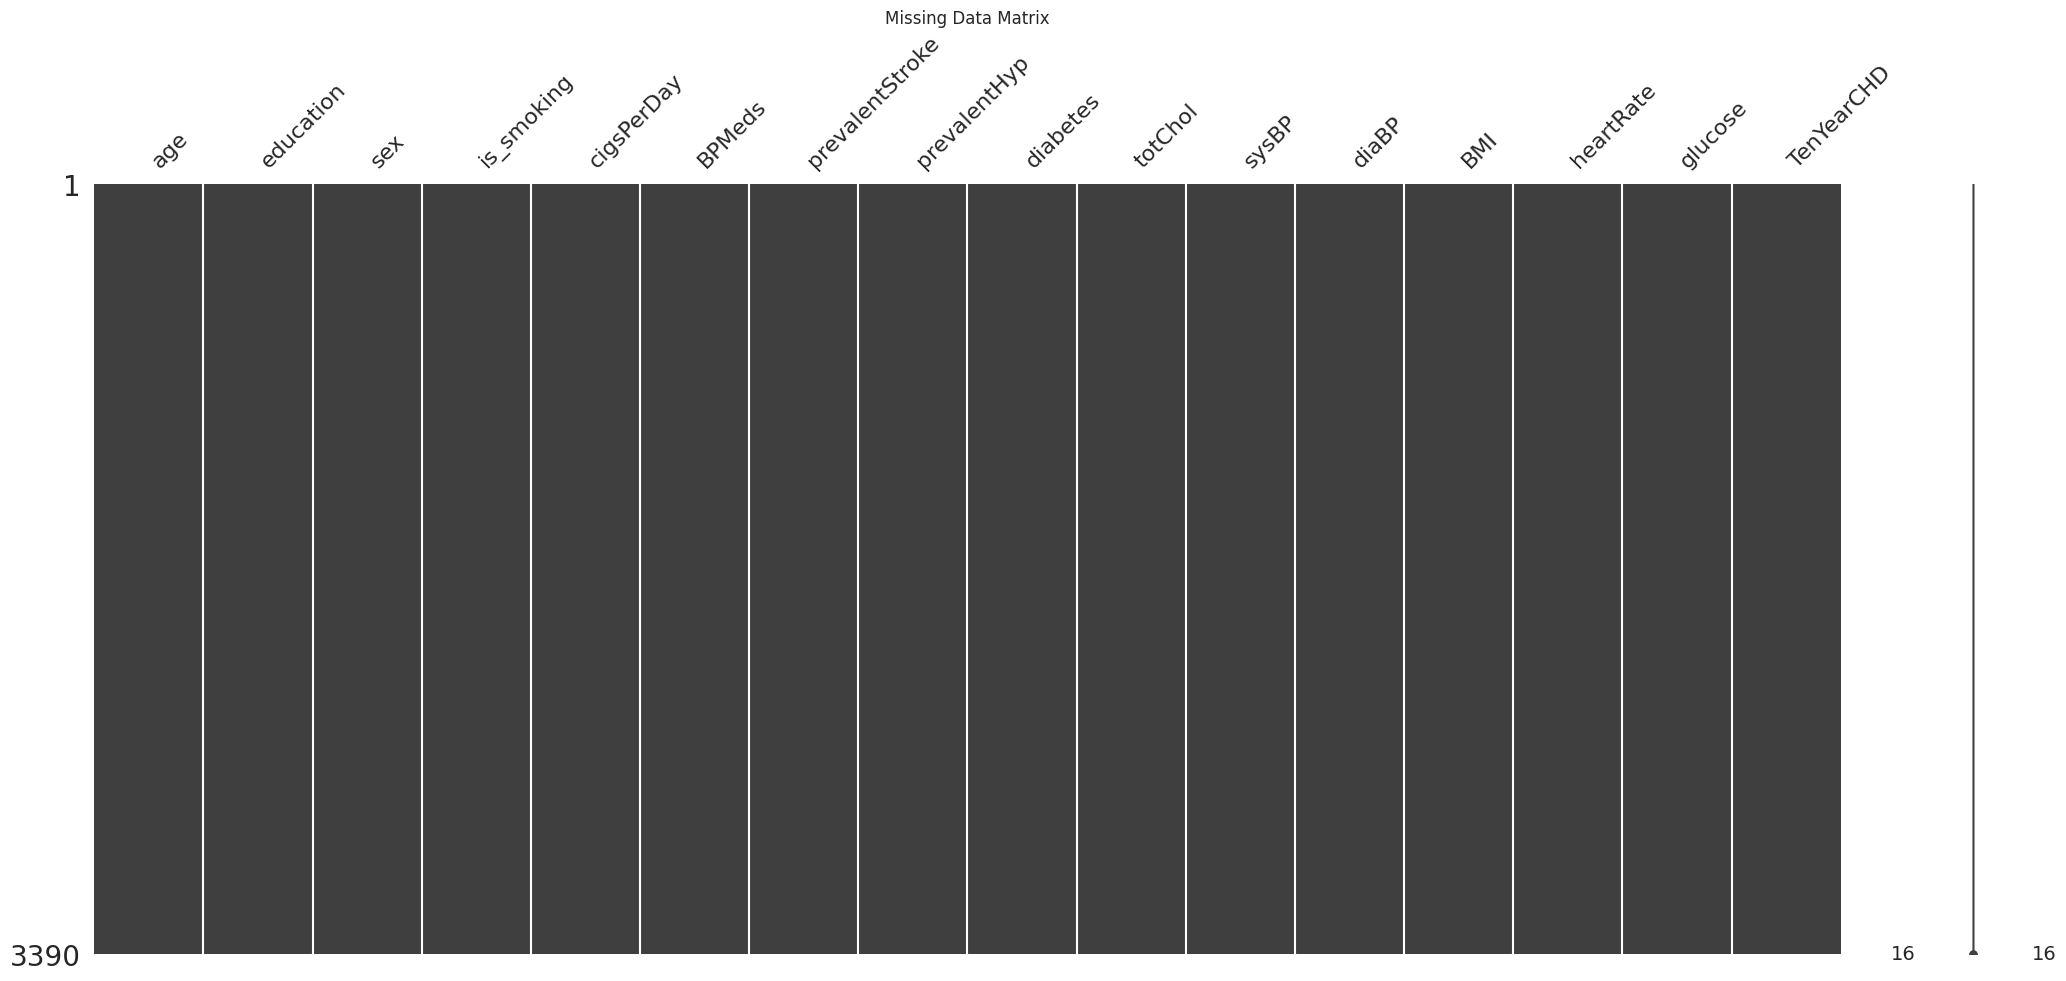

In [45]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

#### What all missing value imputation techniques have you used and why did you use those techniques?

"I employed the strategy of imputing missing values in my dataset by replacing them with the mean, median, or mode, depending on the specific context of each variable."

### 2. Handling Outliers

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [47]:
# Create a new DataFrame with the selected columns
data_a = df[continuous_var]
data_a.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [48]:
# Select the non desired columns from 'df'
non_desired_column = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

education sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        2.0   F        YES     0.0                0             0         0   
1        4.0   M         NO     0.0                0             1         0   
2        1.0   F        YES     0.0                0             0         0   
3        1.0   M        YES     0.0                0             1         0   
4        1.0   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [49]:
df_2 = data_a.copy()

In [50]:
df_2.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0

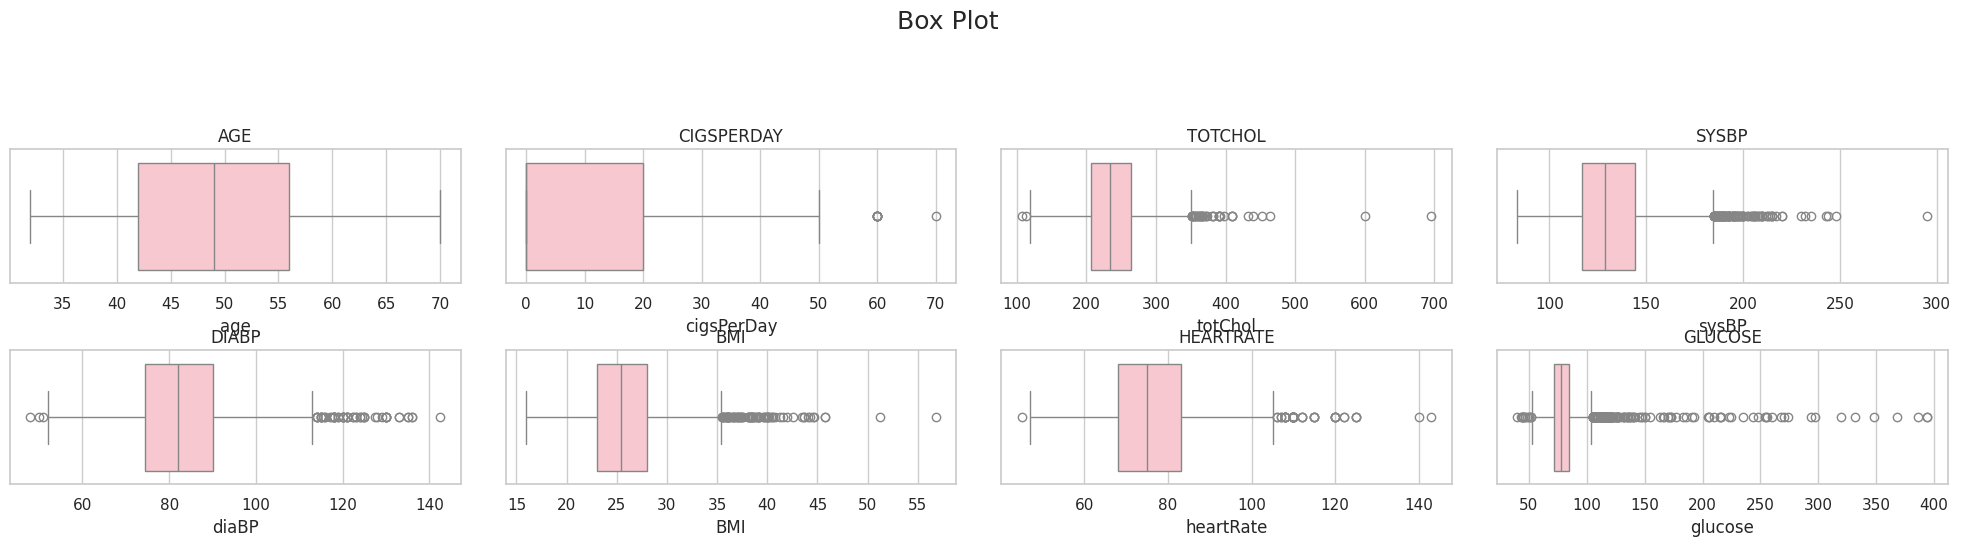

In [51]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.50, wspace=0.1)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [52]:
df_2.quantile(.25)

age            42.00
cigsPerDay      0.00
totChol       206.00
sysBP         117.00
diaBP          74.50
BMI            23.03
heartRate      68.00
glucose        72.00
Name: 0.25, dtype: float64

In [53]:
df_2.quantile(0.75)

age            56.0000
cigsPerDay     20.0000
totChol       264.0000
sysBP         144.0000
diaBP          90.0000
BMI            27.9975
heartRate      83.0000
glucose        85.0000
Name: 0.75, dtype: float64

In [54]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
age             0
dtype: int64


In [55]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

age 

Percentiles: 25th=42.000, 75th=56.000, IQR=14.000

lower = 21.0 and upper = 77.0 
 
Identified outliers: 0

-------

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 


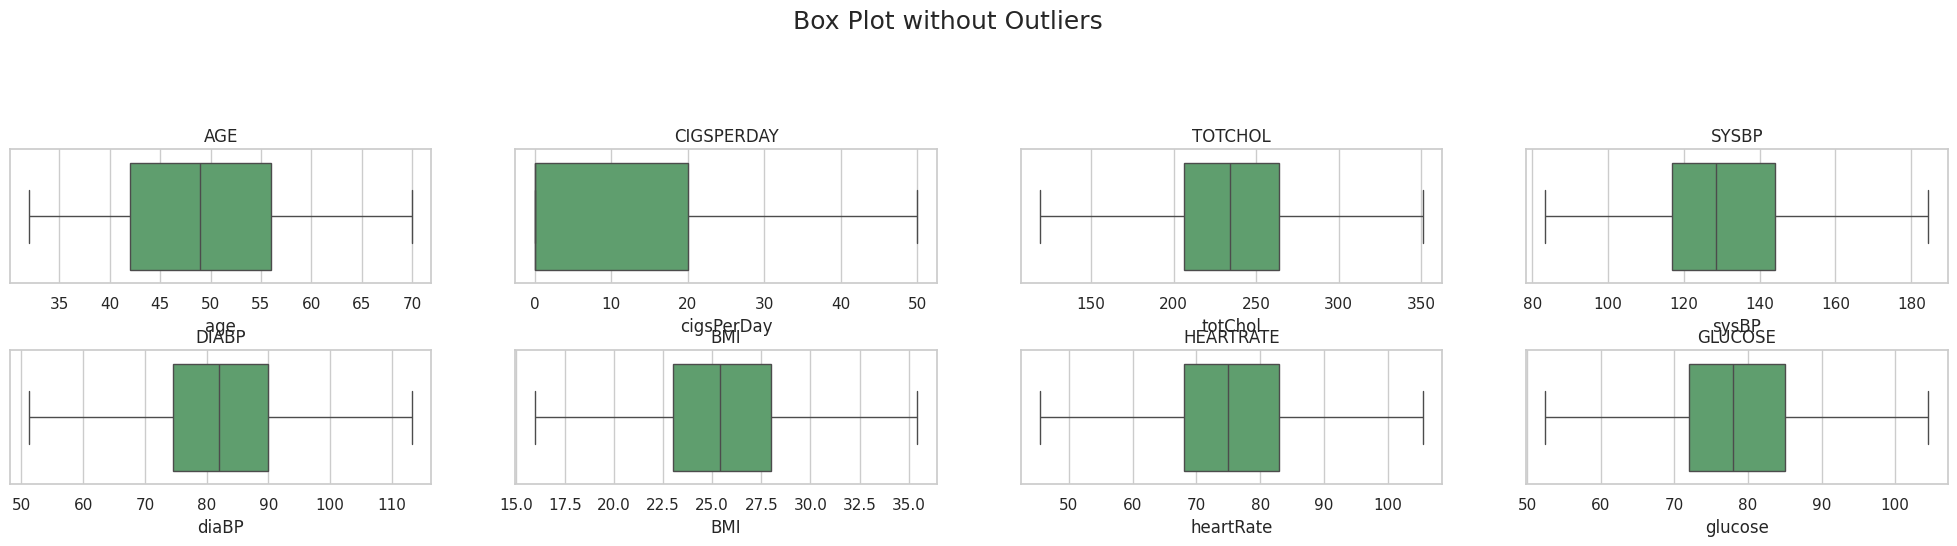

In [56]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [57]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [58]:
data_a.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [59]:
data.head()

education sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        2.0   F        YES     0.0                0             0         0   
1        4.0   M         NO     0.0                0             1         0   
2        1.0   F        YES     0.0                0             0         0   
3        1.0   M        YES     0.0                0             1         0   
4        1.0   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [60]:
df_new.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0   
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0   
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0   
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0   

   education sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        2.0   F        YES     0.0                0             0         0   
1        4.0   M         NO     0.0                0             1         0   
2        1.0   F        YES     0.0                0             0         0   
3        1.0   M        YES     0.0                0             1         0   
4        1.0   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

In the provided code, you are using the Interquartile Range (IQR) method for identifying and treating outliers. Here's a breakdown of the techniques used and the rationale behind them:

1. **Identifying Outliers:**
   - Percentiles (25th and 75th) and IQR are calculated for each numerical feature in `col_list`.
   - The IQR is used to define the range within which most of the data points lie.

2. **Outlier Cutoffs:**
   - A common outlier cutoff is defined as \( \text{Lower Bound} = Q1 - 1.5 \times \text{IQR} \) and \( \text{Upper Bound} = Q3 + 1.5 \times \text{IQR} \).
   - Data points beyond these bounds are considered potential outliers.

3. **Identifying Outliers:**
   - Outliers are identified based on whether they fall below the lower bound or above the upper bound.

4. **Outlier Treatment:**
   - Identified outliers are then replaced with the upper or lower bound of the defined range.
   - This is achieved using a function (`bin`) applied to each row of the DataFrame.

Here are the outlier treatment techniques used in this code:

- **Capping Outliers:**
  - Outliers below the lower bound are replaced with the lower bound.
  - Outliers above the upper bound are replaced with the upper bound.

**Rationale:**
- The IQR method is a robust approach for identifying outliers, as it is less sensitive to extreme values than other methods.
- Capping outliers using 1.5 times the IQR is a common and conservative approach to address extreme values without completely removing them.

**Potential Improvements:**
- Consideration of other outlier detection methods, such as Z-score or modified Z-score, which may provide different perspectives on outliers.
- Evaluation of the impact of outlier treatment on the distribution and statistical properties of the data.

Remember that the choice of outlier treatment depends on the characteristics of the data and the objectives of the analysis.

### 3. Categorical Encoding

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

 I have used Label Encoding to encode the 'sex' column in the DataFrame. Let's discuss this technique and explore other common categorical encoding techniques

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [63]:
#Creating new feature Hypertension
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0   
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0   
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0   
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0   

   education is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        2.0        YES     0.0                0             0         0   
1        4.0         NO     0.0                0             1         0   
2        1.0        YES     0.0                0             0         0   
3        1.0        YES     0.0                0             1         0   
4        1.0        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  
0           1            0             2  
1           0            1             5  
2           0            0             1  
3           1            1             3  
4           0            0             2

In [64]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [65]:
#Creating new feature Diabetes
df_new['Diabetes_grade'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0   64         3.0    221.0  148.0   85.0  25.38       90.0     80.0   
1   36         0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2   46        10.0    250.0  116.0   71.0  20.35       88.0     94.0   
3   50        20.0    233.0  158.0   88.0  28.26       68.0     94.0   
4   64        30.0    241.0  136.5   85.0  26.42       70.0     77.0   

   education is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0        2.0        YES     0.0                0             0         0   
1        4.0         NO     0.0                0             1         0   
2        1.0        YES     0.0                0             0         0   
3        1.0        YES     0.0                0             1         0   
4        1.0        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  Diabetes_grade  
0           1            0             2               1  
1           0            1             5               1  
2           0            0             1               1  
3           1            1             3               1  
4           0            0             2               1

In [66]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df_new["mean_art_pressure"] = (df_new["sysBP"] + 2 * df_new["diaBP"])/3

In [67]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'is_smoking'], inplace=True)

#### 2. Feature Selection

In [68]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# "TenYearCHD" is the dependent variable


# Split the data into features (X) and target variable (y)
X = df_new.drop("TenYearCHD", axis=1)
y = df_new["TenYearCHD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold=0.04)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Transform the data to keep only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new Random Forest model on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on Selected Features:", accuracy_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Accuracy on Selected Features: 0.8657817109144543
Selected Features: Index(['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose',
       'education', 'Hypertension', 'mean_art_pressure'],
      dtype='object')


In [69]:
# Create a DataFrame with selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances.loc[selected_features, 'importance']
})

# Sort the DataFrame by importance in descending order
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Selected Features and Their Importances:")
print(selected_features_df)


Selected Features and Their Importances:
                             Feature  Importance
mean_art_pressure  mean_art_pressure    0.144248
BMI                              BMI    0.142301
age                              age    0.141692
totChol                      totChol    0.130223
heartRate                  heartRate    0.109377
glucose                      glucose    0.108391
cigsPerDay                cigsPerDay    0.064073
Hypertension            Hypertension    0.044275
education                  education    0.041491


In [70]:
# Create a DataFrame using selected features and fill the values with actual rows
df_selected_features = df_new[selected_features].copy()

# Add the target variable column ("TenYearCHD") to the new DataFrame
df_selected_features["TenYearCHD"] = df_new["TenYearCHD"]

# Display the new DataFrame with selected features and target variable
print("DataFrame with Selected Features:")
df_selected_features.head()

DataFrame with Selected Features:


age  cigsPerDay  totChol    BMI  heartRate  glucose  education  \
0   64         3.0    221.0  25.38       90.0     80.0        2.0   
1   36         0.0    212.0  29.77       72.0     75.0        4.0   
2   46        10.0    250.0  20.35       88.0     94.0        1.0   
3   50        20.0    233.0  28.26       68.0     94.0        1.0   
4   64        30.0    241.0  26.42       70.0     77.0        1.0   

   Hypertension  mean_art_pressure  TenYearCHD  
0             2         106.000000           1  
1             5         121.333333           0  
2             1          86.000000           0  
3             3         111.333333           1  
4             2         102.166667           0

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Transformations are applied to address issues such as non-normality, heteroscedasticity, or to make the data more suitable for certain models. Here are some common reasons why you might consider data transformation and potential transformations:

Skewed Distribution:
Issue: If your features exhibit significant skewness, meaning the distribution is not symmetric, some machine learning algorithms may not perform optimally. For example, linear regression models assume normally distributed errors.
Transformation: Apply transformations like the logarithmic or square root transformation to make the distribution more symmetric.

Outliers:
Issue: Outliers can have a disproportionate impact on certain models, particularly those sensitive to extreme values.
Transformation: Winsorizing, truncating, or applying a power transformation can help mitigate the influence of outliers.


Heteroscedasticity:
Issue: Heteroscedasticity occurs when the variability of the residuals is not constant across all levels of the independent variable(s). Linear regression assumes homoscedasticity.
Transformation: Use techniques like log transformation on the dependent variable or apply weighted least squares regression.

Nonlinear Relationships:
Issue: Some algorithms, especially linear models, assume linear relationships between predictors and the response variable.
Transformation: Introduce polynomial features or use nonlinear transformations to capture nonlinear relationships.


Normalization for Distance-Based Algorithms:
Issue: Distance-based algorithms (e.g., k-nearest neighbors, k-means clustering) can be sensitive to differences in scale between features.
Transformation: Apply Min-Max Scaling or Z-score normalization to bring features to a comparable scale.

Feature Engineering:
Issue: Some machine learning models benefit from feature engineering to create new features that better capture the underlying patterns.
Transformation: Create interaction terms, polynomial features, or derive new features based on domain knowledge.


Normalization of Target Variable:
Issue: In regression problems, normalizing the target variable may be necessary, especially if it has a skewed distribution.
Transformation: Apply log transformation or Box-Cox transformation to the target variable.

In [71]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_selected_features.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['age', 'totChol', 'BMI', 'heartRate', 'glucose'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['cigsPerDay', 'education', 'Hypertension', 'mean_art_pressure',
       'TenYearCHD'],
      dtype='object')


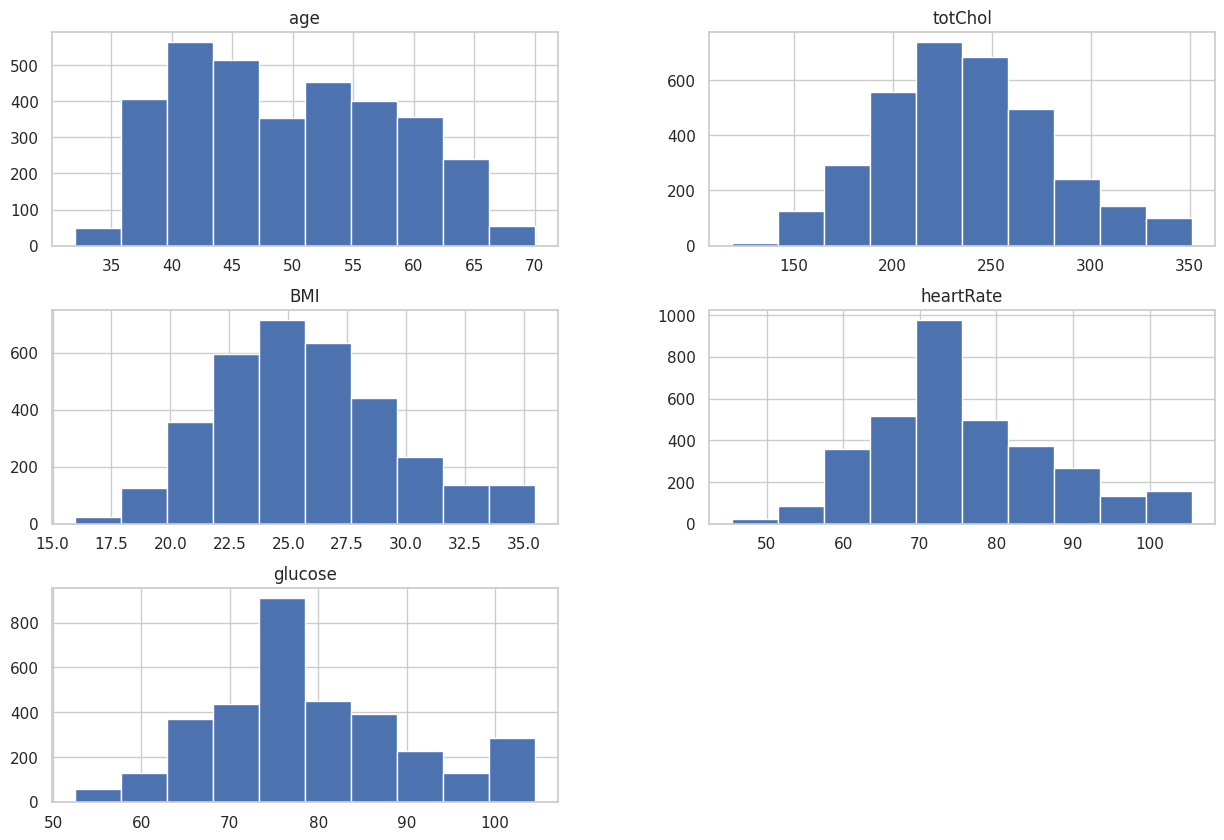

In [72]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

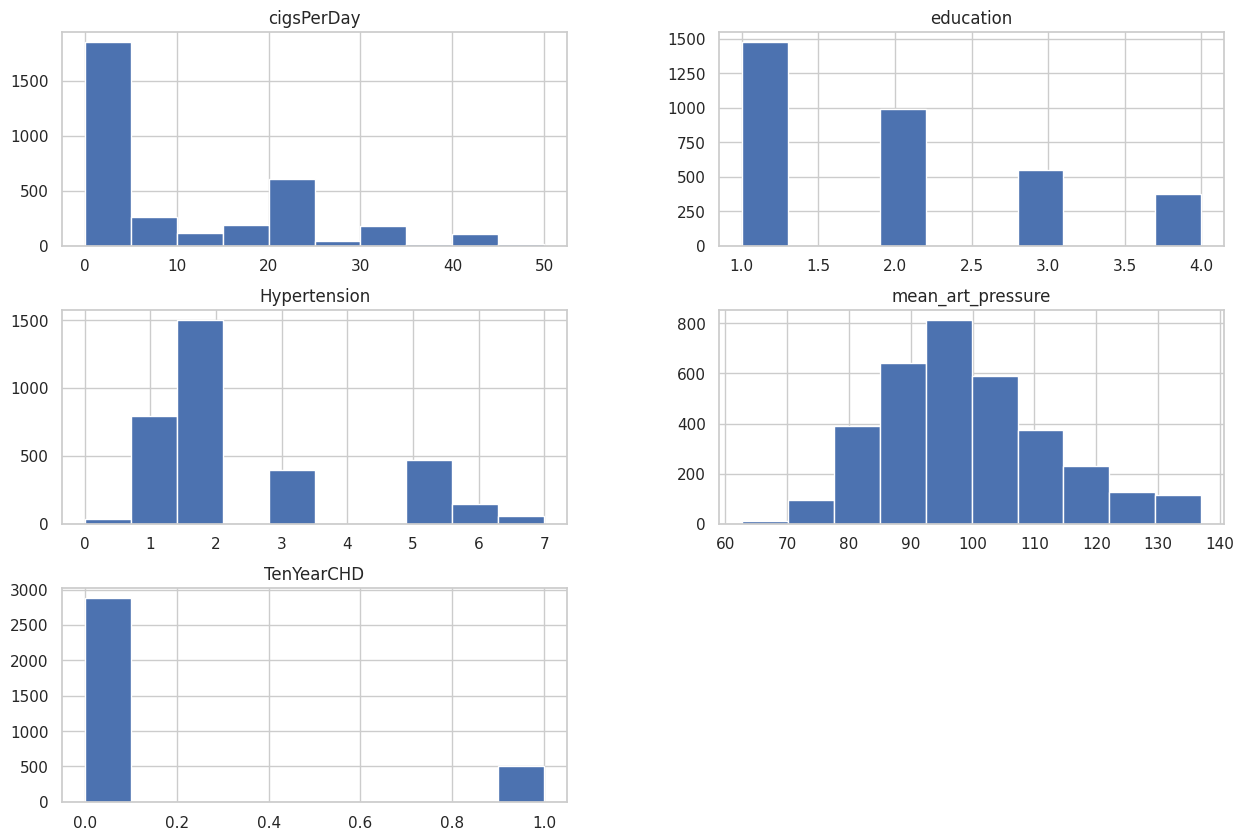

In [73]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

In [74]:
skewed_data.columns

Index(['cigsPerDay', 'education', 'Hypertension', 'mean_art_pressure',
       'TenYearCHD'],
      dtype='object')

In [75]:
import pandas as pd

# Assuming 'skewed_data' is your DataFrame
unique_value_counts = skewed_data.nunique()

# Print or view the unique value counts for each column
print(unique_value_counts)

cigsPerDay            30
education              4
Hypertension           7
mean_art_pressure    376
TenYearCHD             2
dtype: int64


In [76]:
import numpy as np

# Define a function to calculate the WoE values
def calculate_woe(df, feature, target):
    event_total = df[target].sum()
    non_event_total = df.shape[0] - event_total
    event_count = df.groupby(feature)[target].sum()
    non_event_count = df.groupby(feature)[target].count() - event_count
    woe_values = np.log((non_event_count / non_event_total) / (event_count / event_total))
    return woe_values

# Calculate WoE values for the skewed categorical features
# woe_bpm = calculate_woe(skewed_data, 'BPMeds', 'TenYearCHD')
woe_education = calculate_woe(skewed_data, 'education', 'TenYearCHD')
woe_hypertension = calculate_woe(skewed_data, 'Hypertension', 'TenYearCHD')

# Replace the original categorical values with the WoE values
# skewed_data['BPMeds'] = skewed_data['BPMeds'].map(woe_bpm)
skewed_data['education'] = skewed_data['education'].map(woe_education)
skewed_data['Hypertension'] = skewed_data['Hypertension'].map(woe_hypertension)

In [77]:
# Select the columns you want to transform
columns_to_transform = ['cigsPerDay','mean_art_pressure' ]

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

cigsPerDay  education  Hypertension  mean_art_pressure  TenYearCHD
0    1.386294   0.271276      0.086461           4.672829           1
1    0.000000   0.047378     -0.488386           4.806750           0
2    2.397895  -0.225991      0.702589           4.465908           0
3    3.044522  -0.225991     -0.009043           4.721471           1
4    3.433987  -0.225991      0.086461           4.636346           0

In [78]:
symmetrical_data.head()

age  totChol    BMI  heartRate  glucose
0   64    221.0  25.38       90.0     80.0
1   36    212.0  29.77       72.0     75.0
2   46    250.0  20.35       88.0     94.0
3   50    233.0  28.26       68.0     94.0
4   64    241.0  26.42       70.0     77.0

In [79]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [80]:
# Assuming 'heartRate' is the column you want to drop
tranformed_data = tranformed_data.drop('heartRate', axis=1)

In [81]:
# Display the shape after dropping the column
print(tranformed_data.shape)

(3390, 9)


### 6. Data Scaling

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features (X) from the target variable
X = tranformed_data.drop("TenYearCHD", axis=1)
y = tranformed_data["TenYearCHD"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable column ("TenYearCHD") to the scaled DataFrame
df_scaled["TenYearCHD"] = y

# Display the new DataFrame with scaled features and target variable
print("DataFrame with Scaled Features:")
df_scaled.head()

DataFrame with Scaled Features:


age   totChol       BMI   glucose  cigsPerDay  education  \
0  0.842105  0.439655  0.483356  0.528846    0.352583   1.000000   
1  0.105263  0.400862  0.708614  0.432692    0.000000   0.549744   
2  0.368421  0.564655  0.225258  0.798077    0.609868   0.000000   
3  0.473684  0.491379  0.631133  0.798077    0.774328   0.000000   
4  0.842105  0.525862  0.536720  0.471154    0.873382   0.000000   

   Hypertension  mean_art_pressure  TenYearCHD  
0      0.713933           0.671113           1  
1      0.447032           0.844228           0  
2      1.000000           0.403632           0  
3      0.669590           0.733990           1  
4      0.713933           0.623952           0

In [83]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [84]:
#example if there is nan value introduced while scalling or transofrmation
df_scaled.isna().sum()

age                  0
totChol              0
BMI                  0
glucose              0
cigsPerDay           0
education            0
Hypertension         0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

##### Which method have you used to scale you data and why?

I used the Min-Max Scaling method to scale your data. Min-Max Scaling, implemented through the MinMaxScaler in scikit-learn, is a normalization technique that scales and transforms the features of your dataset to a specific range, typically [0, 1].
**Why Min-Max Scaling:**

Uniform Scaling:
Min-Max Scaling provides a uniform scaling approach, ensuring that all features are scaled proportionally within the specified range.

Robustness to Outliers:
Min-Max Scaling is generally less sensitive to outliers compared to some other scaling methods. It scales the data based on the minimum and maximum values, reducing the impact of extreme values.

Applicability to Neural Networks:
Min-Max Scaling is commonly used in neural network training, where keeping the values within a specific range can aid in convergence.

Preservation of Sparsity:
If your dataset is sparse (contains a significant number of zero values), Min-Max Scaling can help preserve the sparsity structure.


### 7. Data Splitting

In [85]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_scaled.drop("TenYearCHD", axis=1)
y = df_scaled['TenYearCHD']

In [86]:
#splitting the data into 75/25 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=3)

##### What data splitting ratio have you used and why?

I used a 75/25 split ratio, meaning 75% of the data is used for training (`X_train` and `y_train`), and 25% is used for testing (`X_test` and `y_test`). This split ratio is commonly known as a 75/25 train-test split. The choice of the split ratio depends on several factors, and the 75/25 split is a widely used default. Here's why you might choose this ratio:

**Reasons for Choosing a 75/25 Split:**

1. **Trade-off Between Training and Testing:**
   - The 75/25 split strikes a reasonable balance between having enough data for model training and having a sufficient amount for testing and evaluation. It provides a substantial portion for training the model while retaining a significant portion for assessing model performance.

2. **Standard Practice:**
   - The 75/25 split is a common and standard practice in machine learning. Many tutorials, examples, and educational materials use this split ratio by default.

3. **Small to Medium-Sized Datasets:**
   - In situations where the dataset is not extremely large, a 75/25 split is often deemed sufficient. As the dataset size increases, practitioners might lean towards larger training sets.

4. **Maintaining Adequate Test Size:**
   - Allocating 25% of the data for testing ensures that you have a reasonably large test set to evaluate the model's performance. A larger test set can provide more robust estimates of the model's generalization performance.

5. **Randomness and Reproducibility:**
   - The use of a random seed (`random_state`) ensures reproducibility. If you need to replicate the results or share your work with others, using a fixed seed helps achieve consistent splits.

**Considerations:**

- The choice of the train-test split ratio can vary based on the specific characteristics of your dataset, the problem you are solving, and the amount of data available.

- In some cases, especially with large datasets, you might consider alternative split ratios such as 80/20 or 90/10. However, these choices also depend on the specific requirements of your modeling task.

- Stratified sampling (maintaining the class distribution in both training and testing sets) is crucial, especially when dealing with imbalanced datasets.

In summary, the 75/25 split ratio is a widely accepted and practical choice for many machine learning scenarios, providing a good balance between training and testing data for model development and evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the given dataset is imbalanced , To determine whether a dataset is imbalanced, you need to analyze the distribution of the target variable (or class labels). If there is a significant disparity in the number of instances between different classes, the dataset can be considered imbalanced.

In [87]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [88]:
# Check value counts for y_train
print("y_train value counts:")
print(pd.Series(y_train).value_counts())

# Check value counts for y_test
print("\ny_test value counts:")
print(pd.Series(y_test).value_counts())

y_train value counts:
TenYearCHD
0    2174
1     368
Name: count, dtype: int64

y_test value counts:
TenYearCHD
0    705
1    143
Name: count, dtype: int64


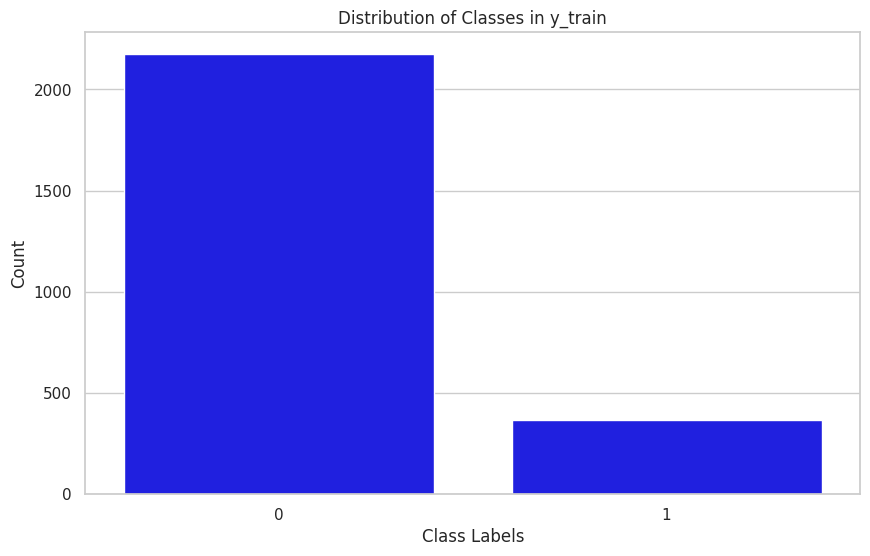

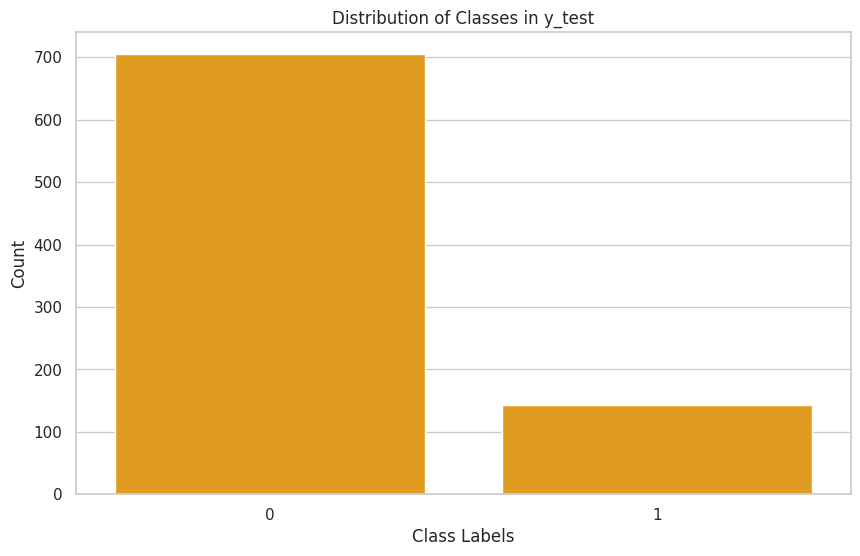

In [89]:
# Check value counts for y_train
y_train_counts = pd.Series(y_train).value_counts()

# Check value counts for y_test
y_test_counts = pd.Series(y_test).value_counts()

# Plotting the distribution for y_train
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_counts.index, y=y_train_counts.values, color='blue')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Plotting the distribution for y_test
plt.figure(figsize=(10, 6))
sns.barplot(x=y_test_counts.index, y=y_test_counts.values, color='orange')
plt.title('Distribution of Classes in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

In [90]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

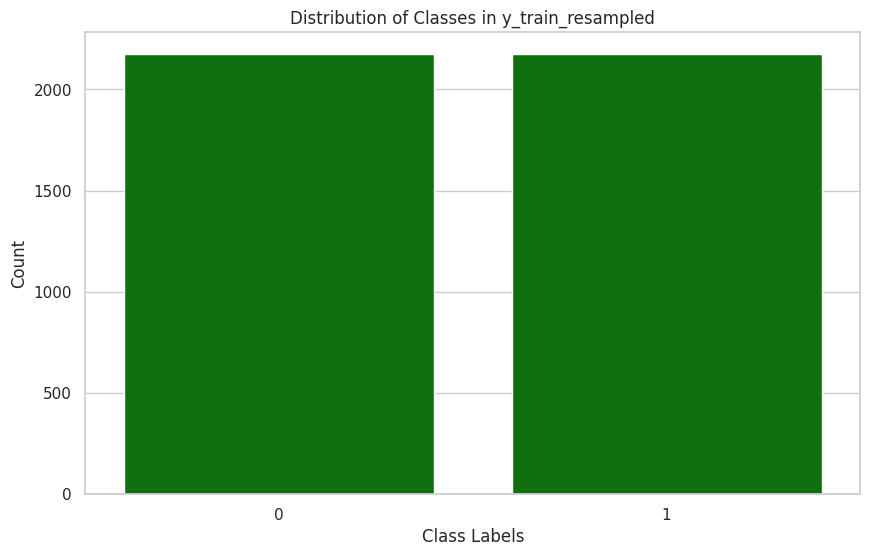

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check value counts for y_train_resampled
y_train_resampled_counts = y_train_resampled_df.value_counts()

# Plotting the distribution for y_train_resampled
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_resampled_counts.index, y=y_train_resampled_counts.values, color='green')
plt.title('Distribution of Classes in y_train_resampled')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I you used the Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset. SMOTE is a popular technique for oversampling the minority class by generating synthetic examples rather than replicating existing instances.

# ***7. ML Model Implementation***

## BASIC MODELS

### Model 1 - Logistic Regression


Threshold: 0.2


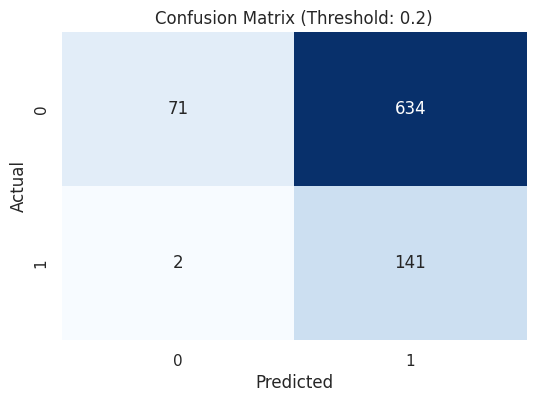

Accuracy: 0.25
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.10      0.18       705
           1       0.18      0.99      0.31       143

    accuracy                           0.25       848
   macro avg       0.58      0.54      0.24       848
weighted avg       0.84      0.25      0.20       848

---------------------------------------------------------

Threshold: 0.3


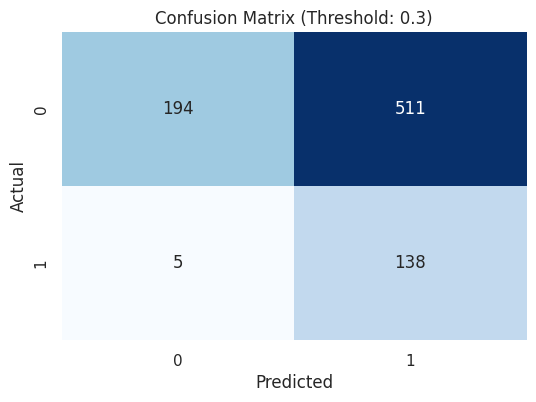

Accuracy: 0.3915094339622642
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.28      0.43       705
           1       0.21      0.97      0.35       143

    accuracy                           0.39       848
   macro avg       0.59      0.62      0.39       848
weighted avg       0.85      0.39      0.42       848

---------------------------------------------------------

Threshold: 0.4


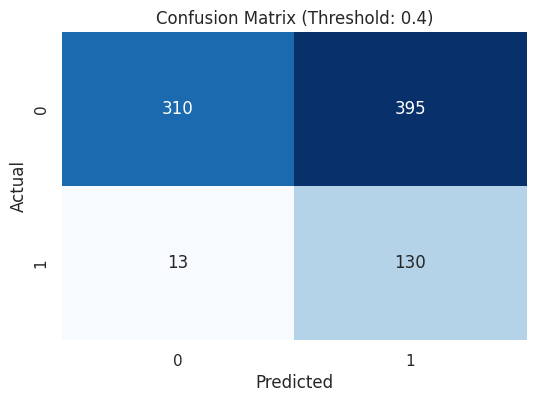

Accuracy: 0.5188679245283019
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.44      0.60       705
           1       0.25      0.91      0.39       143

    accuracy                           0.52       848
   macro avg       0.60      0.67      0.50       848
weighted avg       0.84      0.52      0.57       848

---------------------------------------------------------

Threshold: 0.5


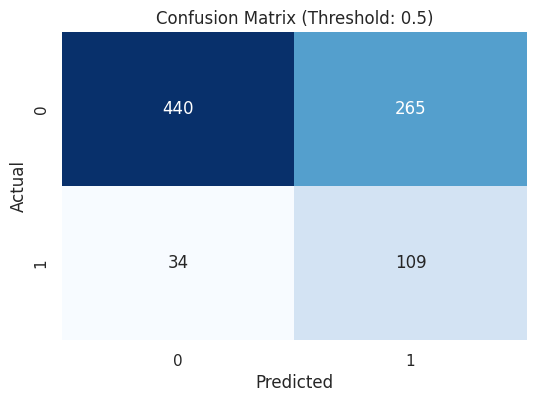

Accuracy: 0.6474056603773585
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.62      0.75       705
           1       0.29      0.76      0.42       143

    accuracy                           0.65       848
   macro avg       0.61      0.69      0.58       848
weighted avg       0.82      0.65      0.69       848

---------------------------------------------------------

Threshold: 0.6


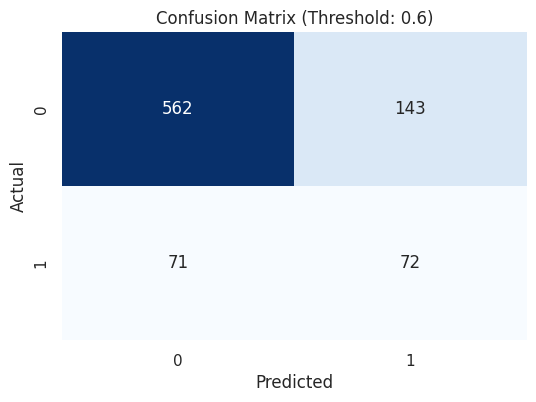

Accuracy: 0.7476415094339622
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       705
           1       0.33      0.50      0.40       143

    accuracy                           0.75       848
   macro avg       0.61      0.65      0.62       848
weighted avg       0.79      0.75      0.77       848

---------------------------------------------------------

Threshold: 0.7


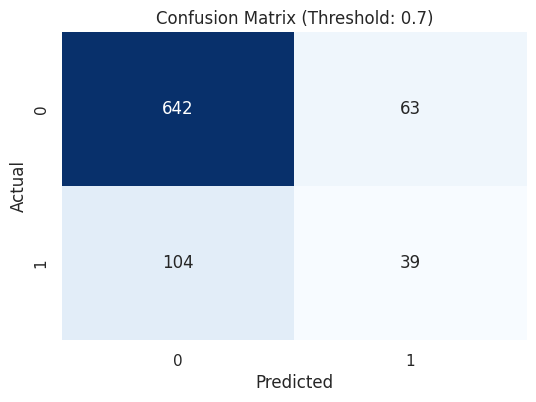

Accuracy: 0.8030660377358491
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       705
           1       0.38      0.27      0.32       143

    accuracy                           0.80       848
   macro avg       0.62      0.59      0.60       848
weighted avg       0.78      0.80      0.79       848

---------------------------------------------------------

Threshold: 0.8


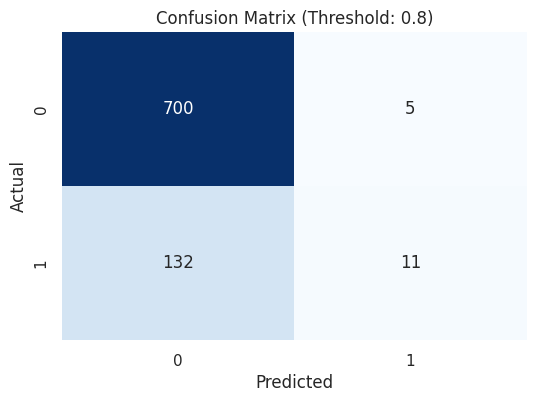

Accuracy: 0.8384433962264151
AUC-ROC Score: 0.752100381887616
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.69      0.08      0.14       143

    accuracy                           0.84       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.82      0.84      0.78       848

---------------------------------------------------------


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)

    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred_threshold)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_probs)

    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold))
    print('---------------------------------------------------------')

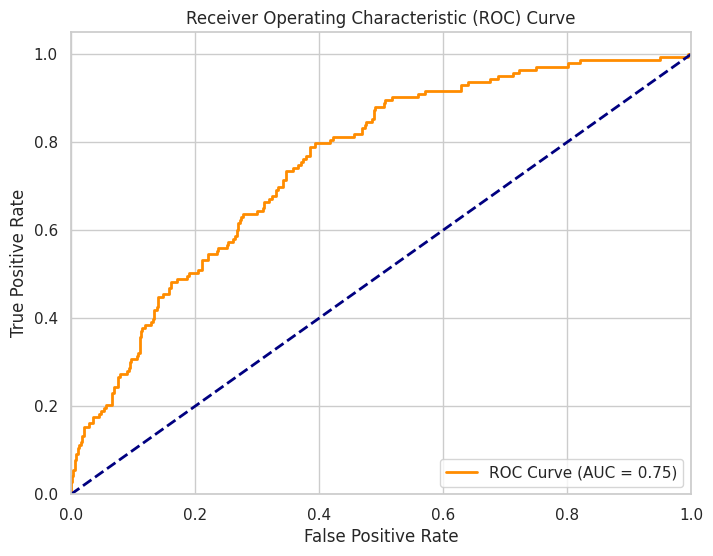

In [99]:
from sklearn.metrics import roc_curve, auc
# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2'}

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75       705
           1       0.29      0.76      0.42       143

    accuracy                           0.65       848
   macro avg       0.61      0.69      0.59       848
weighted avg       0.82      0.65      0.69       848

Accuracy for Best Model: 0.6497641509433962


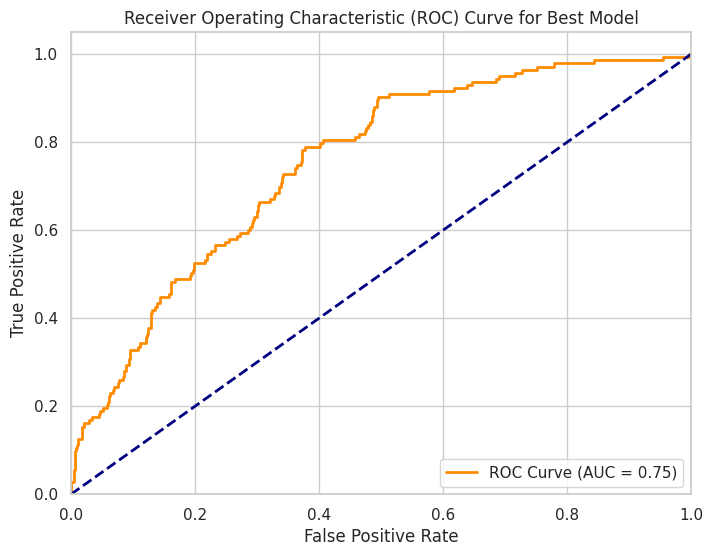

In [100]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg_model, param_grid, cv=cv, scoring='roc_auc', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_logreg_model.predict(X_test)
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))

# Print accuracy for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy for Best Model:", accuracy_best)

# Plot ROC Curve for the best model
y_probs_best = best_logreg_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_probs_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.show()

In [102]:
#installing shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.3 MB/s eta 0:00:00


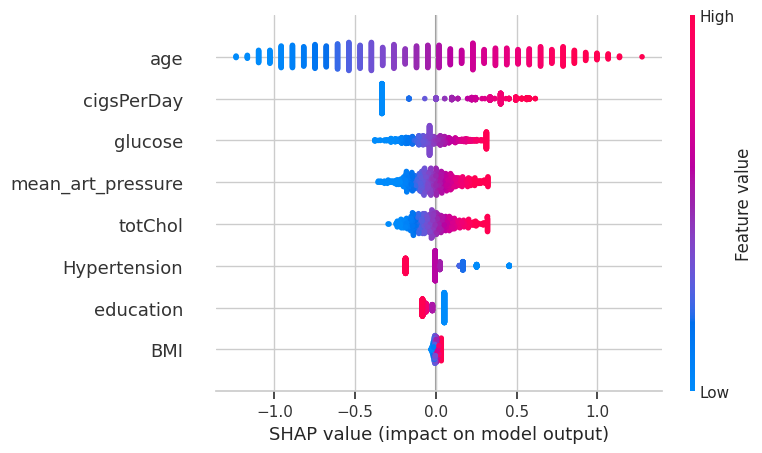

In [103]:
#visualization of feature importance
import shap

model = LogisticRegression()
model.fit(X_train_resampled_df, y_train_resampled_df)

explainer = shap.Explainer(model, X_train_resampled_df)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

In [93]:
#installing scikit-plot
!pip install scikit-plot

### Model 2 - Decision Tree


Threshold: 0.2


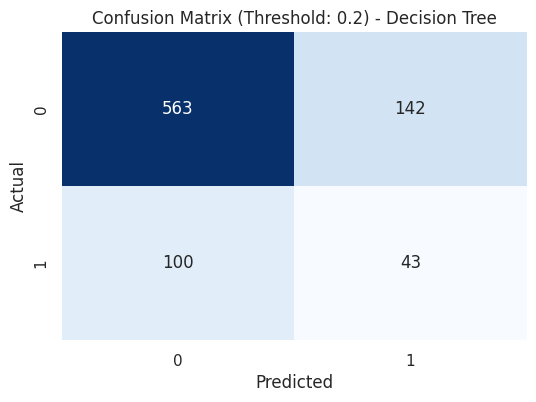

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.3


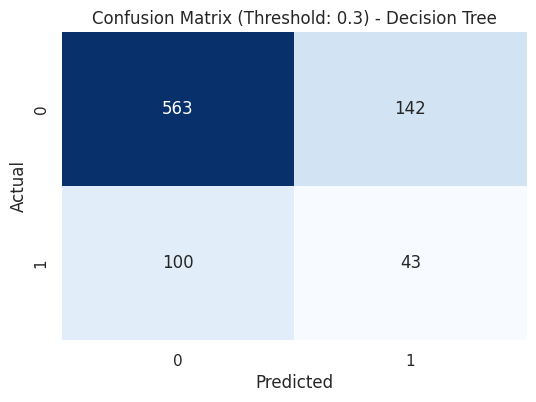

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.4


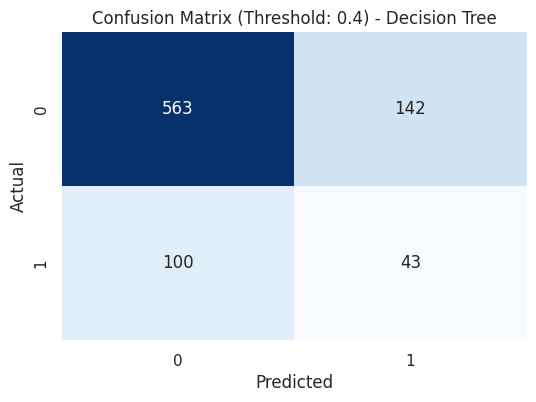

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.5


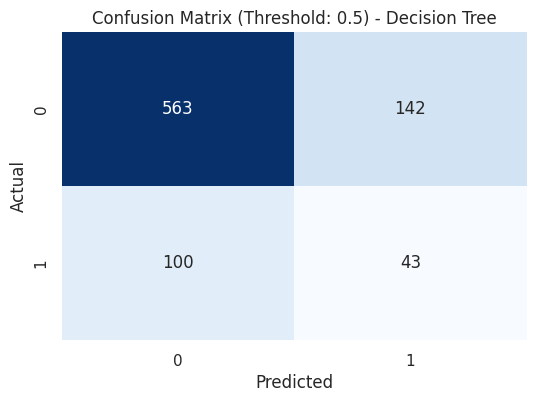

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.6


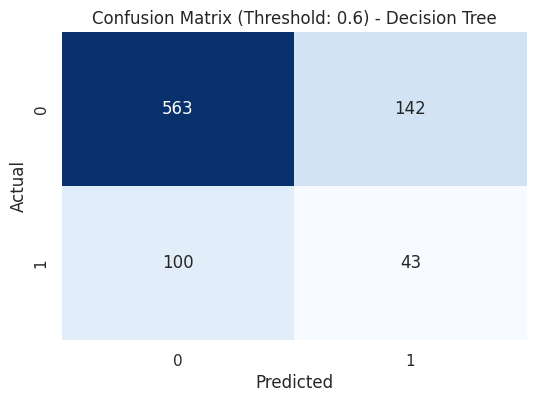

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.7


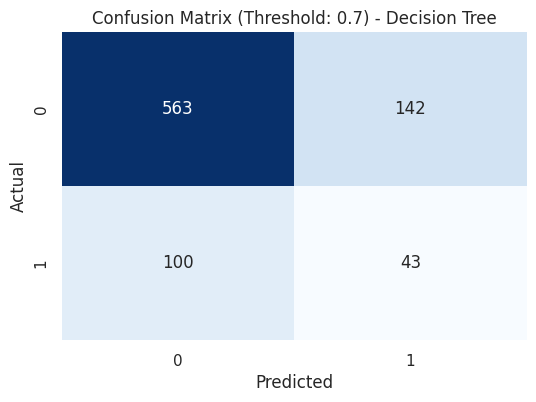

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------

Threshold: 0.8


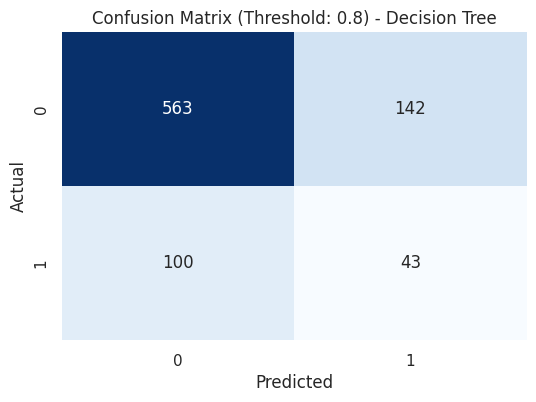

Accuracy: 0.714622641509434
AUC-ROC Score: 0.5496404304914941
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       705
           1       0.23      0.30      0.26       143

    accuracy                           0.71       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.75      0.71      0.73       848

---------------------------------------------------------


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_dt = (y_probs_dt >= threshold).astype(int)

    # Get the confusion matrix
    cm_dt = confusion_matrix(y_test, y_pred_threshold_dt)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold}) - Decision Tree")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_dt = accuracy_score(y_test, y_pred_threshold_dt)
    roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

    print("Accuracy:", accuracy_dt)
    print("AUC-ROC Score:", roc_auc_dt)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_dt))
    print('---------------------------------------------------------')

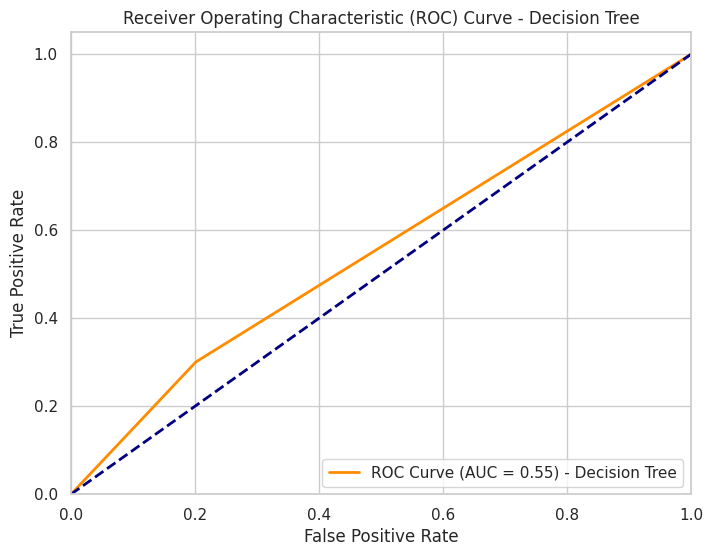

In [105]:
# Plot ROC Curve for the Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.2f}) - Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 15}

Classification Report for Best Decision Tree Model:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       705
           1       0.26      0.31      0.28       143

    accuracy                           0.73       848
   macro avg       0.55      0.56      0.56       848
weighted avg       0.75      0.73      0.74       848

Accuracy for Best Decision Tree Model: 0.7323113207547169


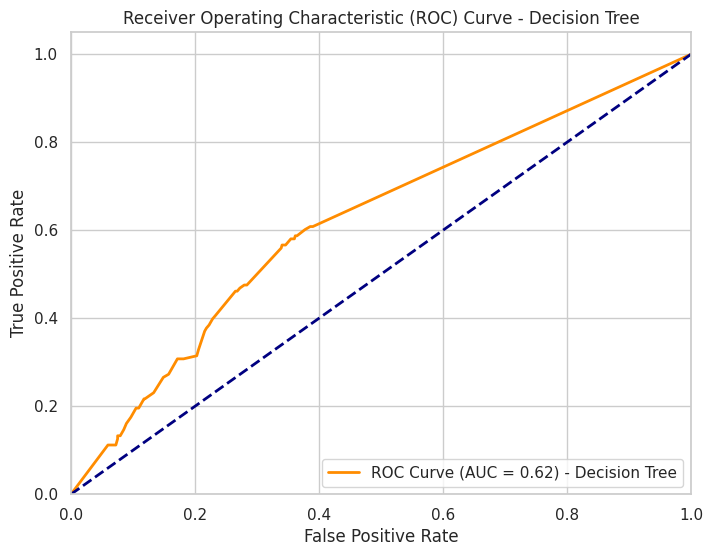

In [106]:
#cross validation and hyperparameter tuining
#import liabraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Adjust these values as needed
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV for Decision Tree with ROC AUC and accuracy scoring
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring={'roc_auc': 'roc_auc', 'accuracy': 'accuracy'}, refit='roc_auc')

# Fit the model to the training data
grid_search_dt.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model on the test set
y_pred_best_dt = best_dt_model.predict(X_test)
print("\nClassification Report for Best Decision Tree Model:\n", classification_report(y_test, y_pred_best_dt))

# Print accuracy for the best Decision Tree model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Accuracy for Best Decision Tree Model:", accuracy_best_dt)

# Plot ROC Curve for the best Decision Tree model
y_probs_best_dt = best_dt_model.predict_proba(X_test)[:, 1]
fpr_best_dt, tpr_best_dt, _ = roc_curve(y_test, y_probs_best_dt)
roc_auc_best_dt = auc(fpr_best_dt, tpr_best_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_dt, tpr_best_dt, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_dt:.2f}) - Decision Tree')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

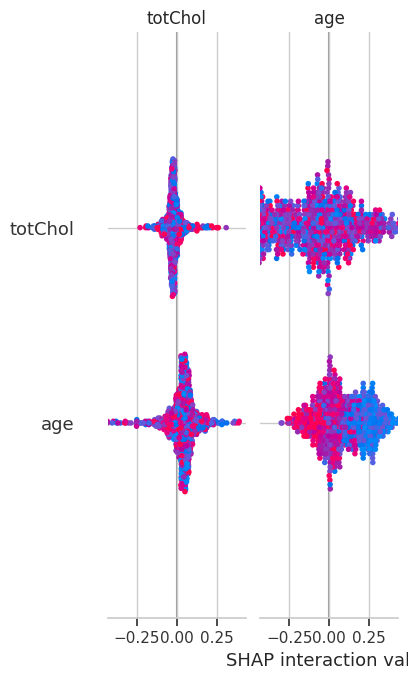

In [107]:
import shap

# Get the best estimator from the GridSearchCV
best_dt_model = grid_search_dt.best_estimator_

# Create a SHAP explainer for the best Decision Tree model
explainer = shap.Explainer(best_dt_model, X_train_resampled_df)

# Generate SHAP values for the test set
shap_values = explainer(X_test)

# Example of providing feature_names
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

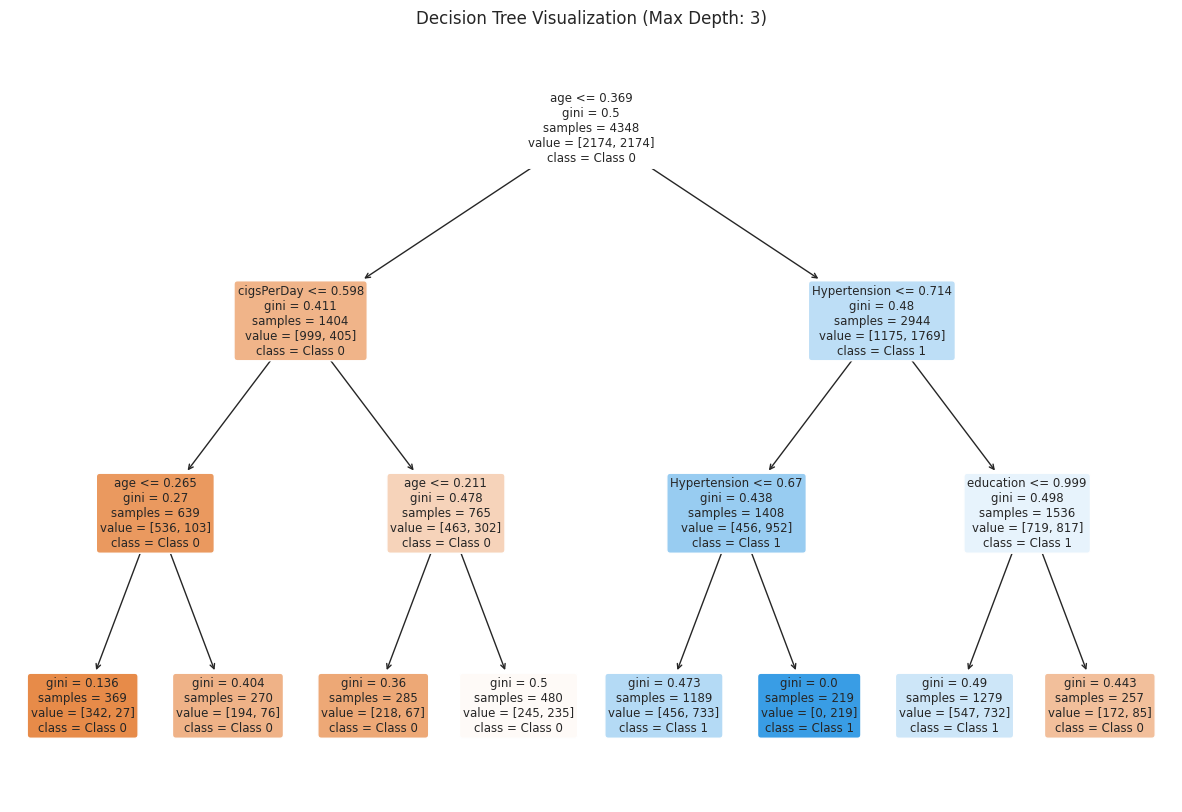

In [108]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Specify the maximum depth for the Decision Tree
max_depth = 3

# Create a Decision Tree model with the specified maximum depth
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the Decision Tree with the specified maximum depth
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()

### Model 3 - Random forest Classifier


Threshold: 0.2


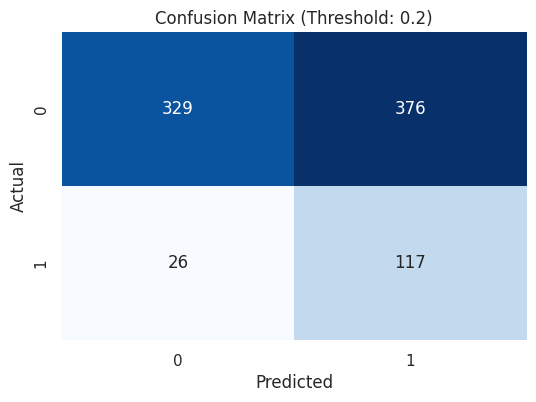

Accuracy: 0.5259433962264151
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.47      0.62       705
           1       0.24      0.82      0.37       143

    accuracy                           0.53       848
   macro avg       0.58      0.64      0.49       848
weighted avg       0.81      0.53      0.58       848

---------------------------------------------------------

Threshold: 0.3


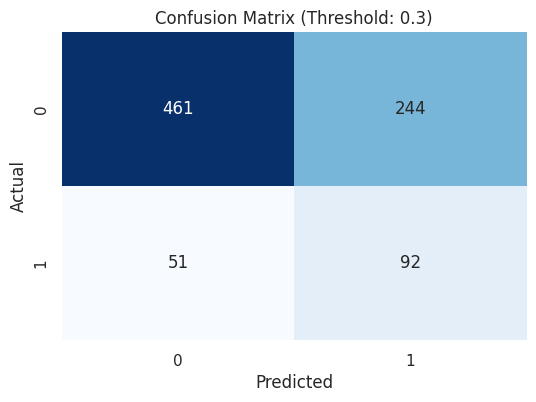

Accuracy: 0.652122641509434
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.65      0.76       705
           1       0.27      0.64      0.38       143

    accuracy                           0.65       848
   macro avg       0.59      0.65      0.57       848
weighted avg       0.79      0.65      0.69       848

---------------------------------------------------------

Threshold: 0.4


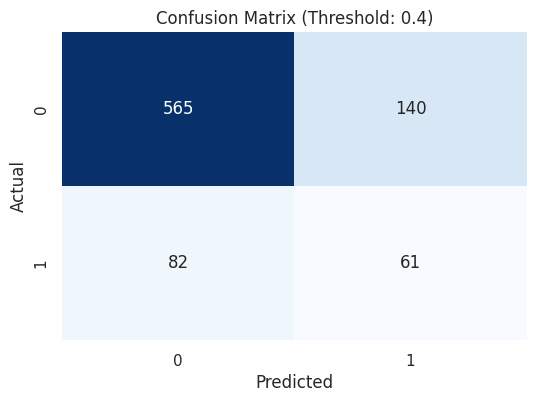

Accuracy: 0.7382075471698113
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84       705
           1       0.30      0.43      0.35       143

    accuracy                           0.74       848
   macro avg       0.59      0.61      0.60       848
weighted avg       0.78      0.74      0.75       848

---------------------------------------------------------

Threshold: 0.5


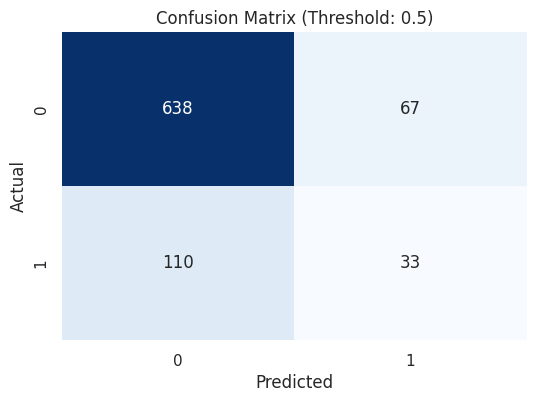

Accuracy: 0.7912735849056604
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       705
           1       0.33      0.23      0.27       143

    accuracy                           0.79       848
   macro avg       0.59      0.57      0.57       848
weighted avg       0.76      0.79      0.78       848

---------------------------------------------------------

Threshold: 0.6


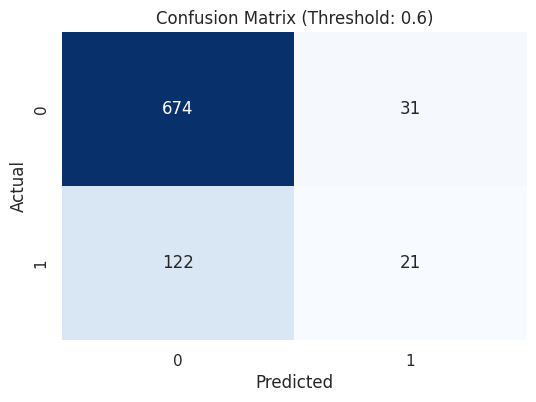

Accuracy: 0.8195754716981132
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       705
           1       0.40      0.15      0.22       143

    accuracy                           0.82       848
   macro avg       0.63      0.55      0.56       848
weighted avg       0.77      0.82      0.78       848

---------------------------------------------------------

Threshold: 0.7


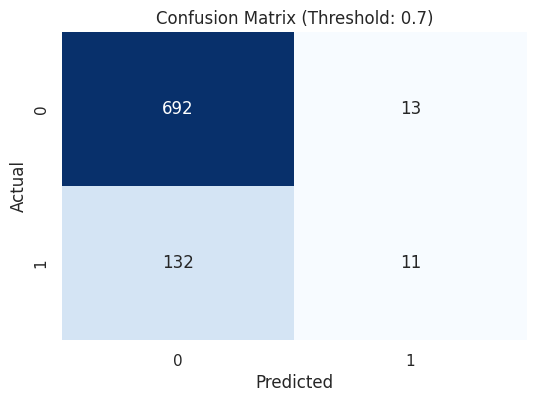

Accuracy: 0.8290094339622641
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       705
           1       0.46      0.08      0.13       143

    accuracy                           0.83       848
   macro avg       0.65      0.53      0.52       848
weighted avg       0.78      0.83      0.77       848

---------------------------------------------------------

Threshold: 0.8


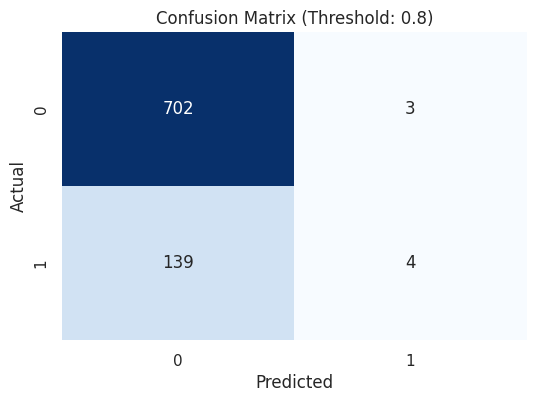

Accuracy: 0.8325471698113207
AUC-ROC Score: 0.6969597778108416
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.57      0.03      0.05       143

    accuracy                           0.83       848
   macro avg       0.70      0.51      0.48       848
weighted avg       0.79      0.83      0.76       848

---------------------------------------------------------


In [109]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_rf = (y_probs_rf >= threshold).astype(int)

    # Get the confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_threshold_rf)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_rf = accuracy_score(y_test, y_pred_threshold_rf)
    roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

    print("Accuracy:", accuracy_rf)
    print("AUC-ROC Score:", roc_auc_rf)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_rf))
    print('---------------------------------------------------------')

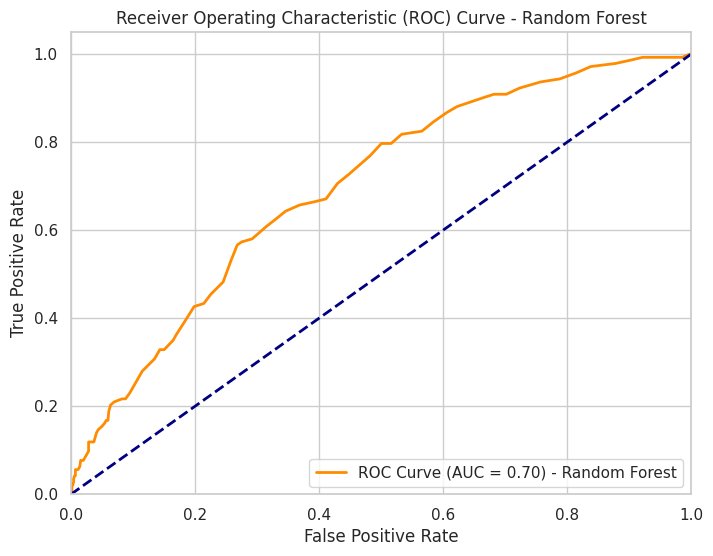

In [110]:
# Plot ROC Curve for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.2f}) - Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Best Parameters for Random Forest: {'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}

Classification Report for Best Random Forest Model:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       705
           1       0.36      0.27      0.31       143

    accuracy                           0.80       848
   macro avg       0.61      0.58      0.59       848
weighted avg       0.77      0.80      0.78       848

Accuracy for Best Random Forest Model: 0.7959905660377359


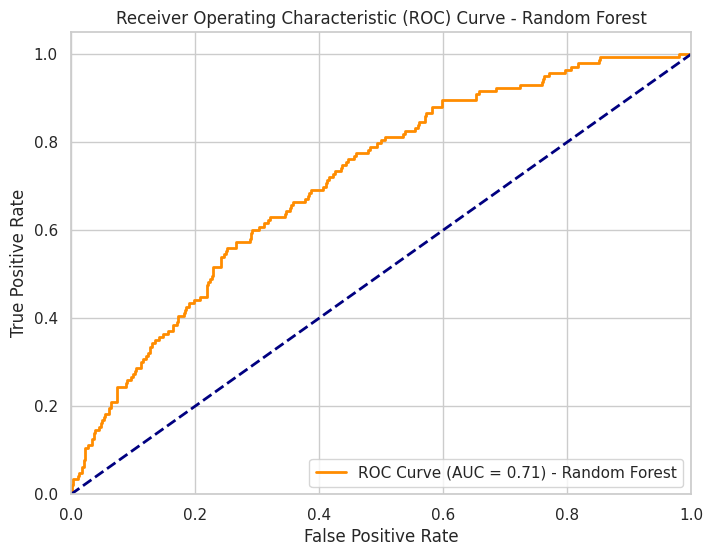

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [150, 175,200],  # Adjust these values as needed
    'max_depth': [25,30,35],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [2, 3]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV for Random Forest with ROC AUC and accuracy scoring
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring={'roc_auc': 'roc_auc', 'accuracy': 'accuracy'}, refit='roc_auc')

# Fit the model to the training data
grid_search_rf.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nClassification Report for Best Random Forest Model:\n", classification_report(y_test, y_pred_best_rf))

# Print accuracy for the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Accuracy for Best Random Forest Model:", accuracy_best_rf)

# Plot ROC Curve for the best Random Forest model
y_probs_best_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_probs_best_rf)
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_rf, tpr_best_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_rf:.2f}) - Random Forest')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

<Figure size 800x600 with 0 Axes>

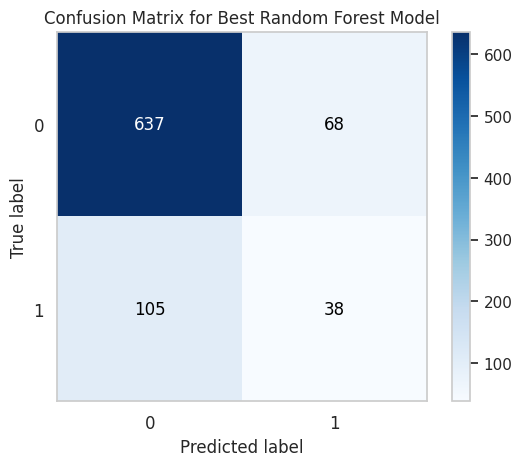

In [114]:
from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix for the best Random Forest model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_best_rf, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

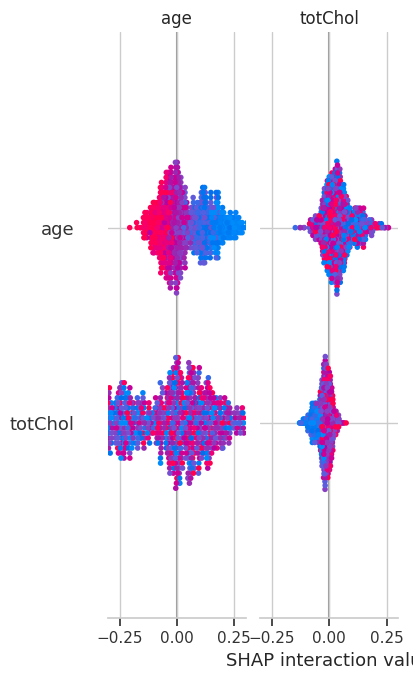

In [115]:
import shap

# Create a SHAP explainer for the best Random Forest model
explainer_rf = shap.TreeExplainer(best_rf_model)

# Generate SHAP values for the test set
shap_values_rf = explainer_rf.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns, show=True)

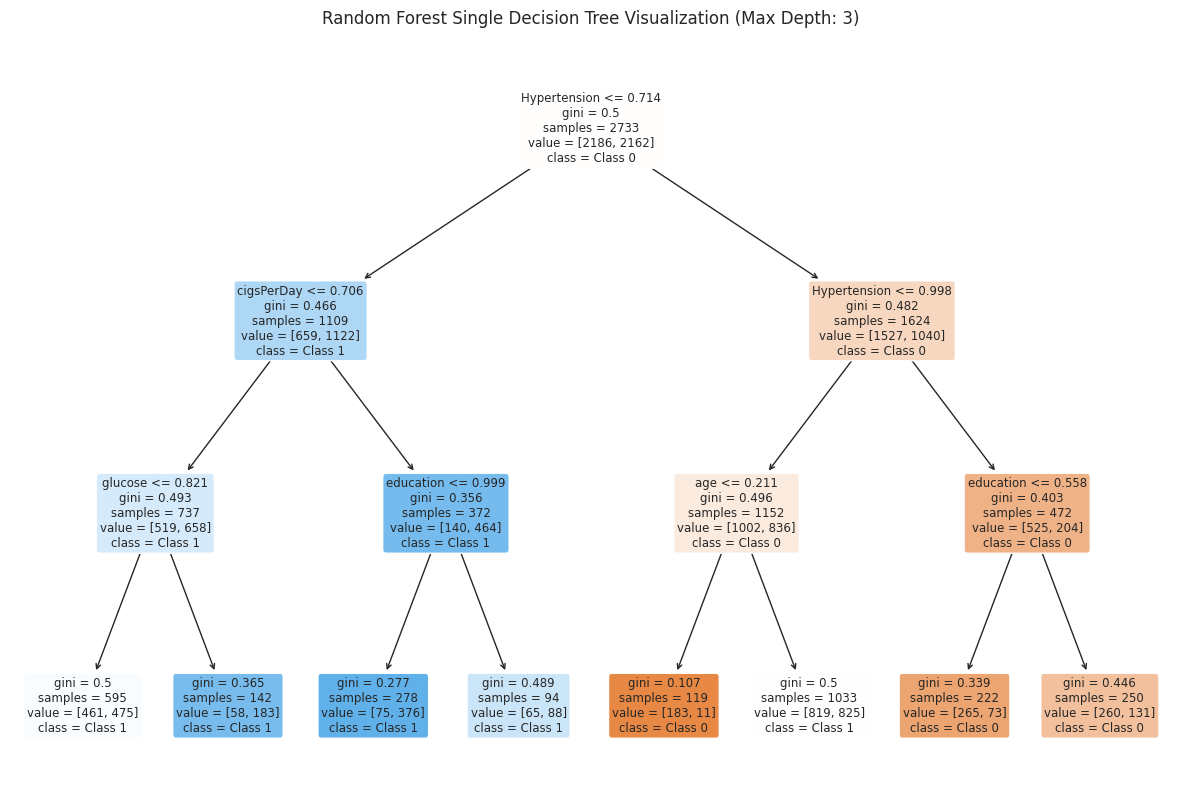

In [116]:
from sklearn.tree import plot_tree

# Create a Random Forest model with a single tree and maximum depth 3
rf_single_tree = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=42)

# Fit the model to the training data
rf_single_tree.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the single decision tree with maximum depth 3
plt.figure(figsize=(15, 10))
plot_tree(rf_single_tree.estimators_[0], feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title('Random Forest Single Decision Tree Visualization (Max Depth: 3)')
plt.show()

##ENSEMBLE BOOSTING MODELS

### Model 4 - AdaBoost


Threshold: 0.2


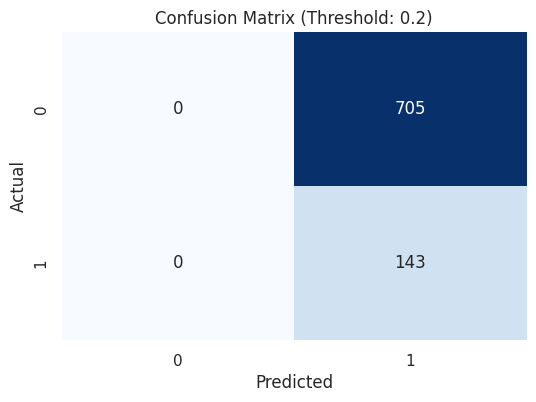

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.3


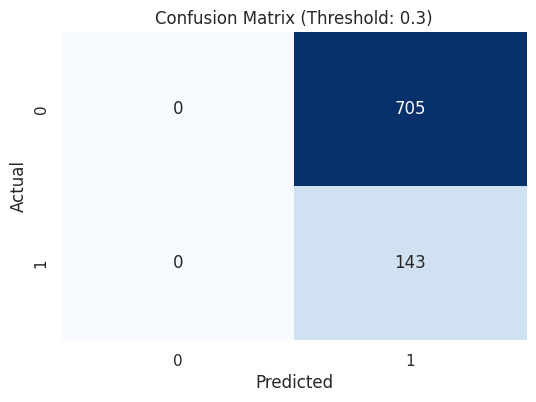

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.4


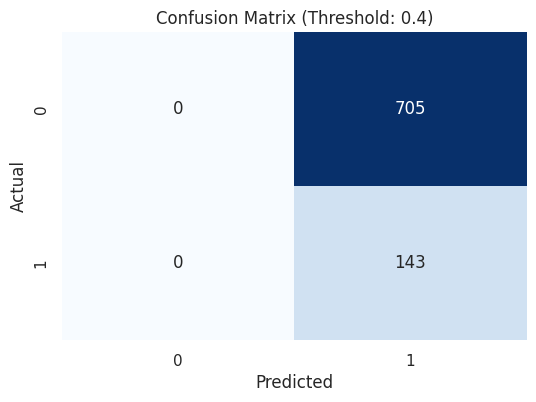

Accuracy: 0.16863207547169812
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       705
           1       0.17      1.00      0.29       143

    accuracy                           0.17       848
   macro avg       0.08      0.50      0.14       848
weighted avg       0.03      0.17      0.05       848

---------------------------------------------------------

Threshold: 0.5


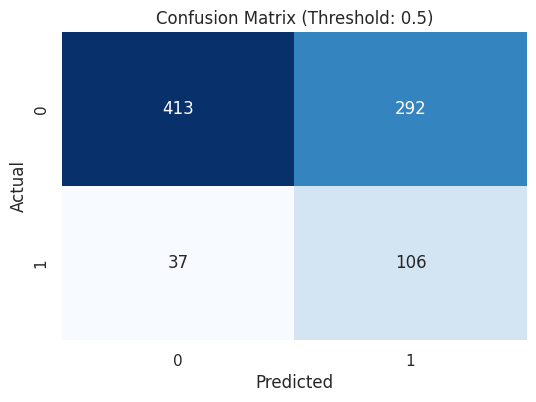

Accuracy: 0.6120283018867925
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72       705
           1       0.27      0.74      0.39       143

    accuracy                           0.61       848
   macro avg       0.59      0.66      0.55       848
weighted avg       0.81      0.61      0.66       848

---------------------------------------------------------

Threshold: 0.6


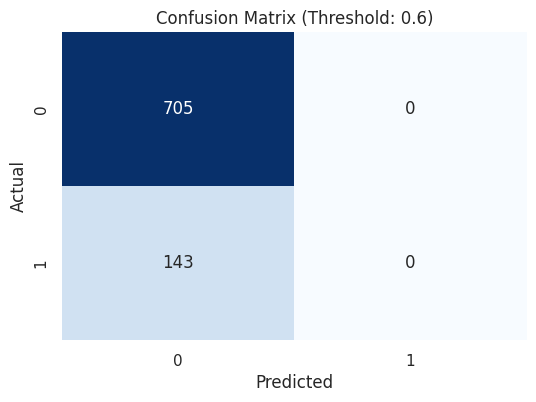

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------

Threshold: 0.7


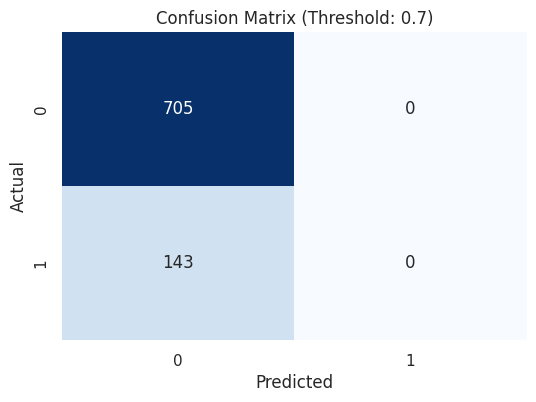

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------

Threshold: 0.8


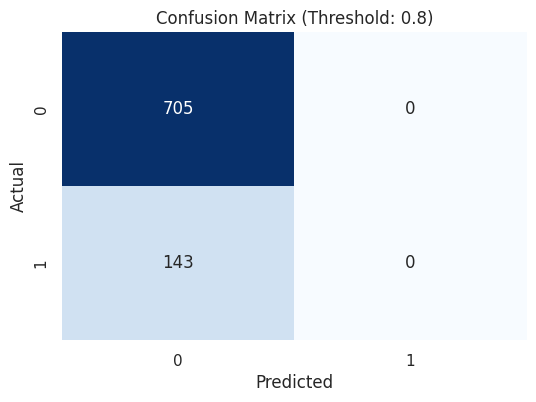

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.7276198978326637
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------


In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(C=0.1, penalty='l2', random_state=42)

# Create an AdaBoostClassifier using the Logistic Regression model as the base model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_adaboost = (y_probs_adaboost >= threshold).astype(int)

    # Get the confusion matrix
    cm_adaboost = confusion_matrix(y_test, y_pred_threshold_adaboost)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_adaboost = accuracy_score(y_test, y_pred_threshold_adaboost)
    roc_auc_adaboost = roc_auc_score(y_test, y_probs_adaboost)

    print("Accuracy:", accuracy_adaboost)
    print("AUC-ROC Score:", roc_auc_adaboost)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_adaboost))
    print('---------------------------------------------------------')


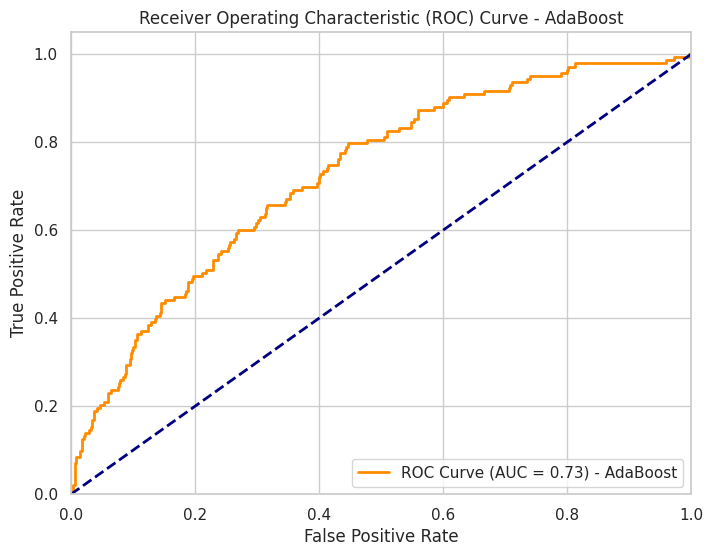

In [118]:
# Plot ROC Curve for the AdaBoost model
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_probs_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_adaboost:.2f}) - AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 150}
Accuracy for Best AdaBoost Model: 0.6202830188679245
AUC-ROC Score for Best AdaBoost Model: 0.734166542677181

Classification Report for Best AdaBoost Model:
               precision    recall  f1-score   support

           0       0.92      0.60      0.72       705
           1       0.27      0.73      0.39       143

    accuracy                           0.62       848
   macro avg       0.59      0.67      0.56       848
weighted avg       0.81      0.62      0.67       848



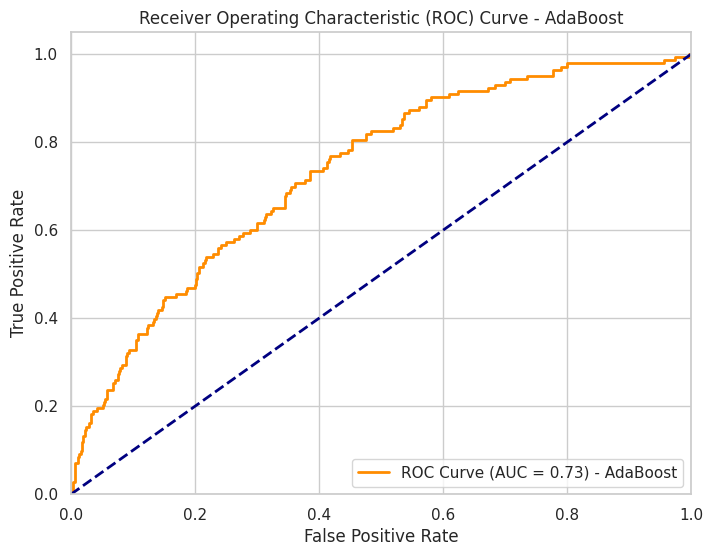

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],  # Adjust these values as needed
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create an AdaBoostClassifier with the base Logistic Regression model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, random_state=42)

# Create GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_adaboost.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for AdaBoost:", grid_search_adaboost.best_params_)

# Get the best AdaBoost model
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the best AdaBoost model on the test set using the specified threshold (0.5)
y_probs_best_adaboost = best_adaboost_model.predict_proba(X_test)[:, 1]
y_pred_best_adaboost = (y_probs_best_adaboost >= 0.5).astype(int)

# Print accuracy for the best AdaBoost model
accuracy_best_adaboost = accuracy_score(y_test, y_pred_best_adaboost)
print("Accuracy for Best AdaBoost Model:", accuracy_best_adaboost)

# Print AUC-ROC Score for the best AdaBoost model
roc_auc_best_adaboost = roc_auc_score(y_test, y_probs_best_adaboost)
print("AUC-ROC Score for Best AdaBoost Model:", roc_auc_best_adaboost)

# Print Classification Report for the best AdaBoost model
print("\nClassification Report for Best AdaBoost Model:\n", classification_report(y_test, y_pred_best_adaboost))

# Plot ROC Curve for the best AdaBoost model
fpr_best_adaboost, tpr_best_adaboost, _ = roc_curve(y_test, y_probs_best_adaboost)
roc_auc_best_adaboost = auc(fpr_best_adaboost, tpr_best_adaboost)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_adaboost, tpr_best_adaboost, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_adaboost:.2f}) - AdaBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

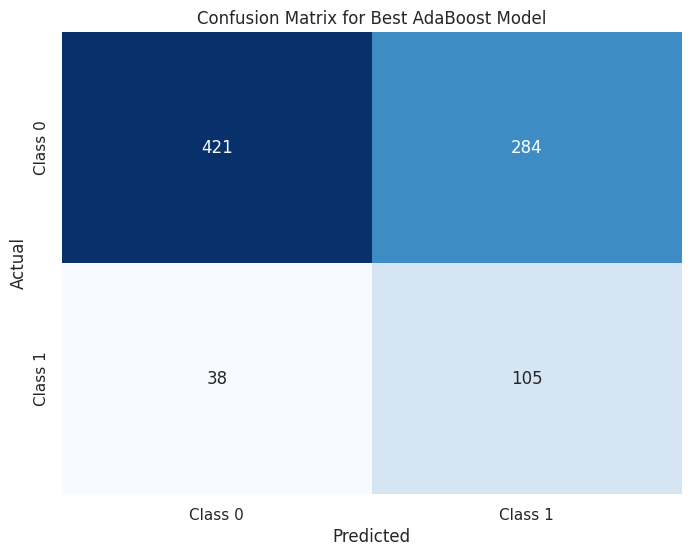

In [120]:
from scikitplot.metrics import plot_confusion_matrix

# Get the confusion matrix for the best AdaBoost model
cm_adaboost = confusion_matrix(y_test, y_pred_best_adaboost)

# Plot the confusion matrix as a heatmap with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.show()


### Model 5 - Gradient Boosting


Threshold: 0.2


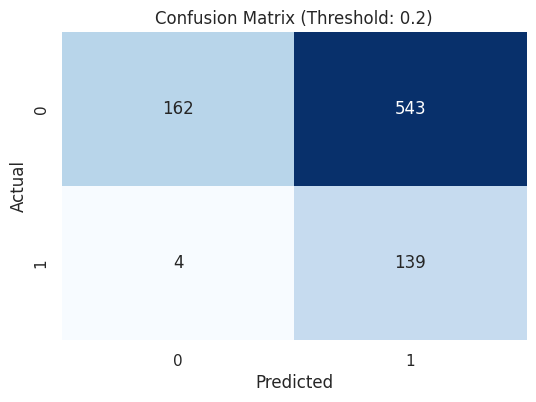

Accuracy: 0.35495283018867924
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.23      0.37       705
           1       0.20      0.97      0.34       143

    accuracy                           0.35       848
   macro avg       0.59      0.60      0.35       848
weighted avg       0.85      0.35      0.37       848

---------------------------------------------------------

Threshold: 0.3


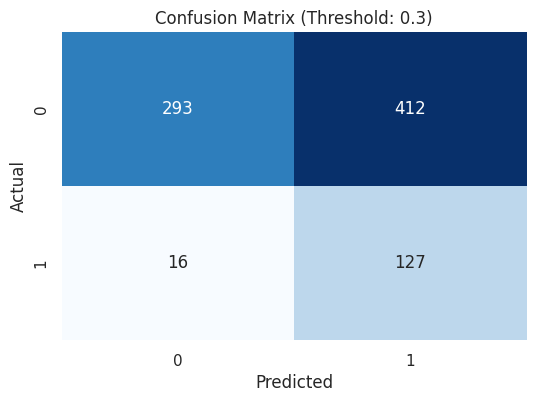

Accuracy: 0.49528301886792453
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58       705
           1       0.24      0.89      0.37       143

    accuracy                           0.50       848
   macro avg       0.59      0.65      0.48       848
weighted avg       0.83      0.50      0.54       848

---------------------------------------------------------

Threshold: 0.4


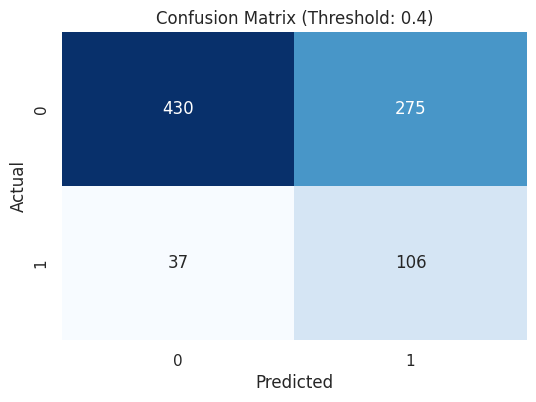

Accuracy: 0.6320754716981132
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.73       705
           1       0.28      0.74      0.40       143

    accuracy                           0.63       848
   macro avg       0.60      0.68      0.57       848
weighted avg       0.81      0.63      0.68       848

---------------------------------------------------------

Threshold: 0.5


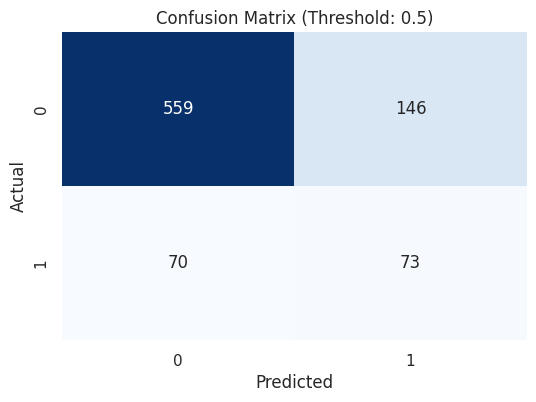

Accuracy: 0.7452830188679245
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       705
           1       0.33      0.51      0.40       143

    accuracy                           0.75       848
   macro avg       0.61      0.65      0.62       848
weighted avg       0.80      0.75      0.76       848

---------------------------------------------------------

Threshold: 0.6


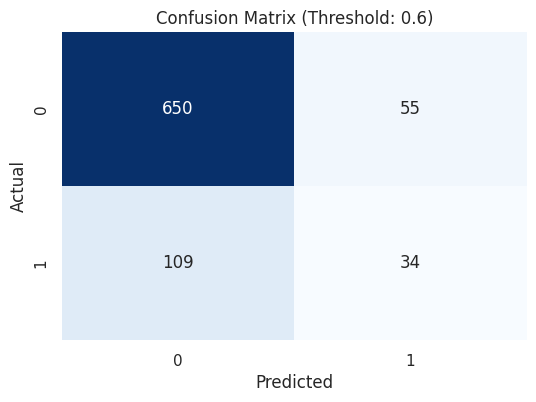

Accuracy: 0.8066037735849056
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       705
           1       0.38      0.24      0.29       143

    accuracy                           0.81       848
   macro avg       0.62      0.58      0.59       848
weighted avg       0.78      0.81      0.79       848

---------------------------------------------------------

Threshold: 0.7


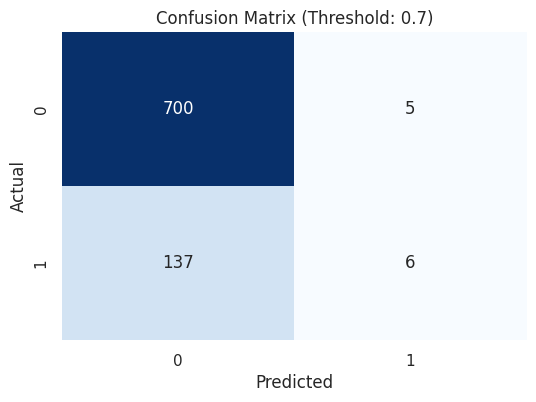

Accuracy: 0.8325471698113207
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.55      0.04      0.08       143

    accuracy                           0.83       848
   macro avg       0.69      0.52      0.49       848
weighted avg       0.79      0.83      0.77       848

---------------------------------------------------------

Threshold: 0.8


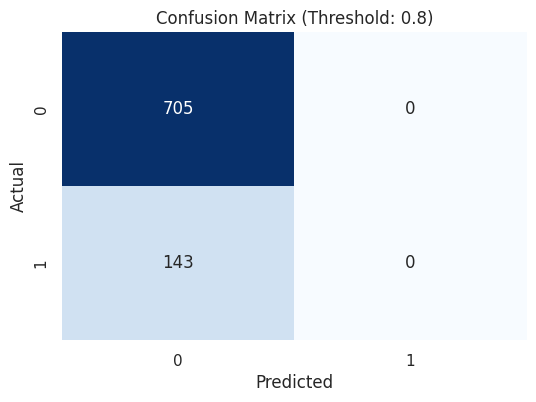

Accuracy: 0.8313679245283019
AUC-ROC Score: 0.731741308337053
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       705
           1       0.00      0.00      0.00       143

    accuracy                           0.83       848
   macro avg       0.42      0.50      0.45       848
weighted avg       0.69      0.83      0.75       848

---------------------------------------------------------


In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


# Create a GradientBoostingClassifier using the Logistic Regression model as the base model
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

    # Get the confusion matrix
    cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_gb = accuracy_score(y_test, y_pred_threshold_gb)
    roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

    print("Accuracy:", accuracy_gb)
    print("AUC-ROC Score:", roc_auc_gb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_gb))
    print('---------------------------------------------------------')

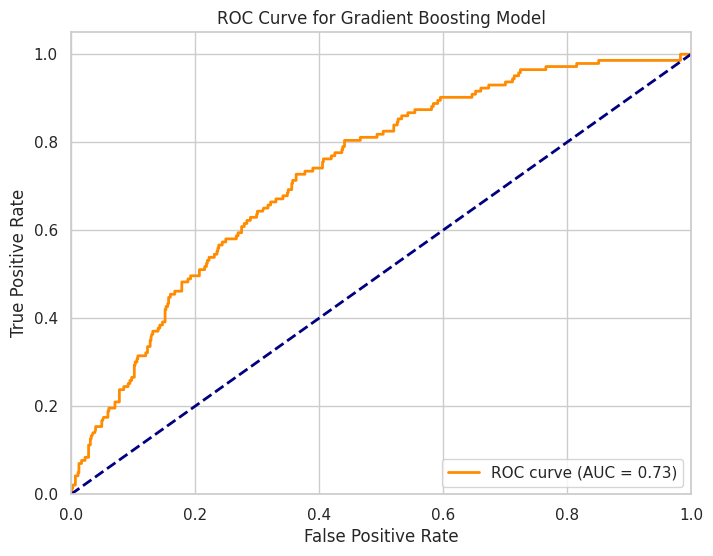

In [122]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200}
Accuracy for Best Gradient Boosting Model: 0.8042452830188679
AUC-ROC Score for Best Gradient Boosting Model: 0.6822000694341119

Classification Report for Best Gradient Boosting Model:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       705
           1       0.34      0.17      0.23       143

    accuracy                           0.80       848
   macro avg       0.60      0.55      0.56       848
weighted avg       0.76      0.80      0.78       848



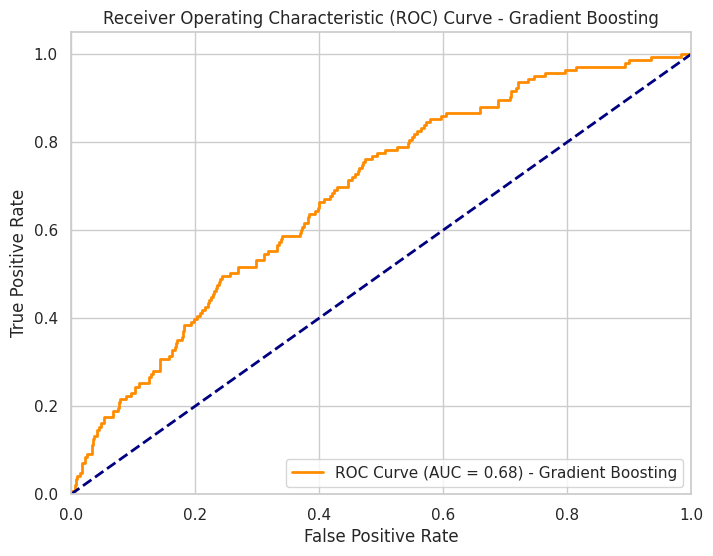

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [100, 150,200],
    'learning_rate': [0.001,0.01, 0.1],
    'max_depth': [5, 10,15]
}

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_gb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Get the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test set
y_probs_best_gb = best_gb_model.predict_proba(X_test)[:, 1]
y_pred_best_gb = (y_probs_best_gb >= 0.5).astype(int)

# Print accuracy for the best Gradient Boosting model
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("Accuracy for Best Gradient Boosting Model:", accuracy_best_gb)

# Print AUC-ROC Score for the best Gradient Boosting model
roc_auc_best_gb = roc_auc_score(y_test, y_probs_best_gb)
print("AUC-ROC Score for Best Gradient Boosting Model:", roc_auc_best_gb)

# Print Classification Report for the best Gradient Boosting model
print("\nClassification Report for Best Gradient Boosting Model:\n", classification_report(y_test, y_pred_best_gb))

# Plot ROC Curve for the best Gradient Boosting model
fpr_best_gb, tpr_best_gb, _ = roc_curve(y_test, y_probs_best_gb)
roc_auc_best_gb = auc(fpr_best_gb, tpr_best_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_gb, tpr_best_gb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_gb:.2f}) - Gradient Boosting')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


Feature Importances for Gradient Boosting:
             Feature  Importance
0                age    0.278756
3            glucose    0.134921
6       Hypertension    0.127935
7  mean_art_pressure    0.111699
1            totChol    0.103731
2                BMI    0.092588
4         cigsPerDay    0.076989
5          education    0.073381


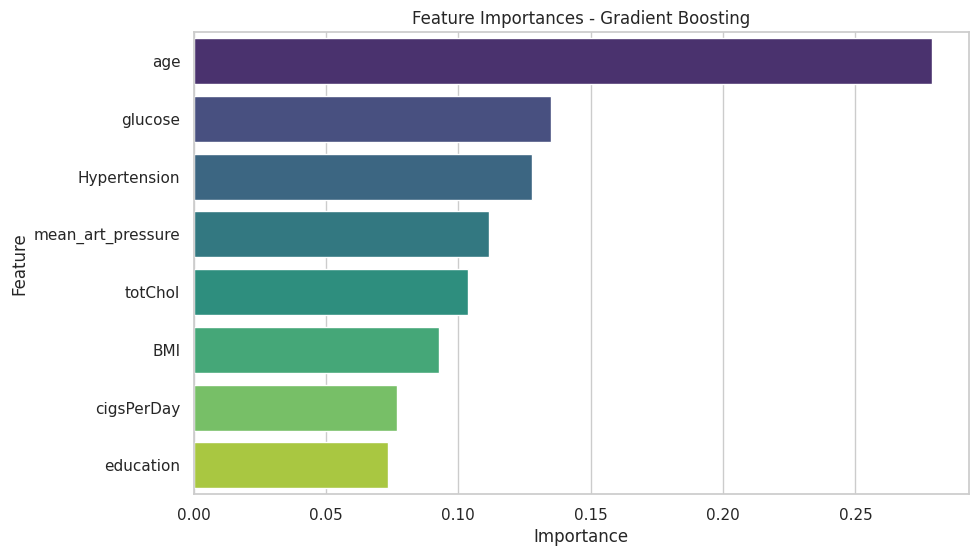

In [124]:
# Assuming best_gb_model is the best Gradient Boosting model obtained

# Get feature importances
feature_importances_gb = best_gb_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df_gb = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances_gb})

# Sort the DataFrame by importance values
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances for Gradient Boosting:")
print(importance_df_gb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb, palette='viridis')
plt.title('Feature Importances - Gradient Boosting')
plt.show()


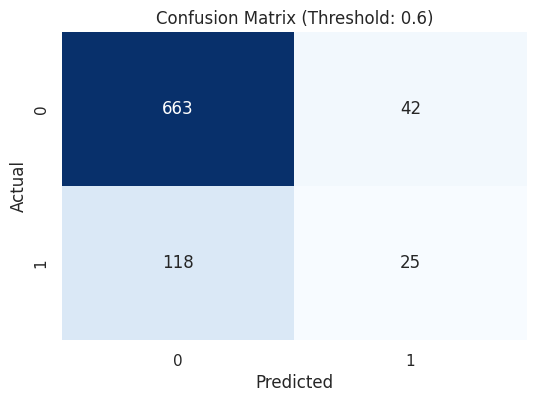

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Choose a threshold (you can adjust this based on your needs)
threshold = 0.6

# Convert probabilities to binary predictions based on the chosen threshold
y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

# Get the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model 6 - XG Boosting


Threshold: 0.2


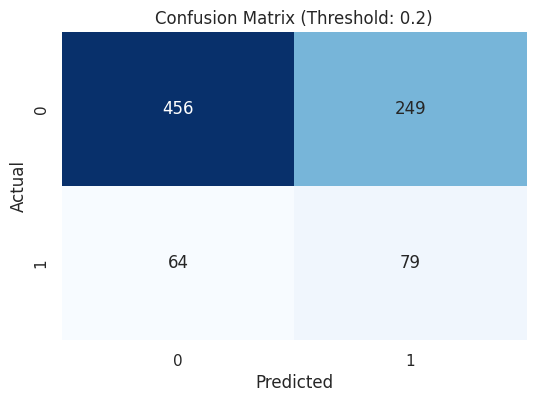

Accuracy: 0.6308962264150944
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.74       705
           1       0.24      0.55      0.34       143

    accuracy                           0.63       848
   macro avg       0.56      0.60      0.54       848
weighted avg       0.77      0.63      0.68       848

---------------------------------------------------------

Threshold: 0.3


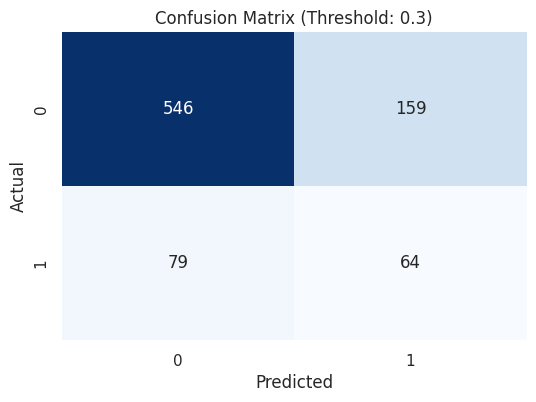

Accuracy: 0.7193396226415094
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       705
           1       0.29      0.45      0.35       143

    accuracy                           0.72       848
   macro avg       0.58      0.61      0.59       848
weighted avg       0.77      0.72      0.74       848

---------------------------------------------------------

Threshold: 0.4


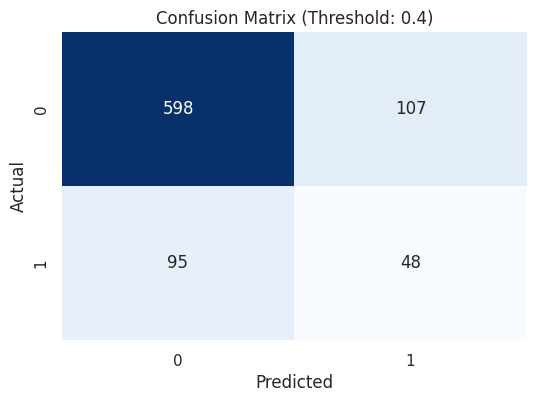

Accuracy: 0.7617924528301887
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       705
           1       0.31      0.34      0.32       143

    accuracy                           0.76       848
   macro avg       0.59      0.59      0.59       848
weighted avg       0.77      0.76      0.77       848

---------------------------------------------------------

Threshold: 0.5


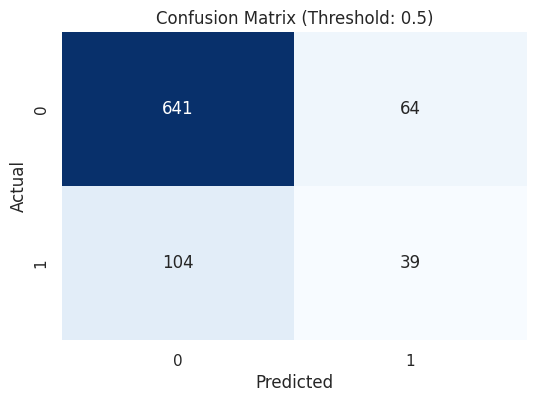

Accuracy: 0.8018867924528302
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       705
           1       0.38      0.27      0.32       143

    accuracy                           0.80       848
   macro avg       0.62      0.59      0.60       848
weighted avg       0.78      0.80      0.79       848

---------------------------------------------------------

Threshold: 0.6


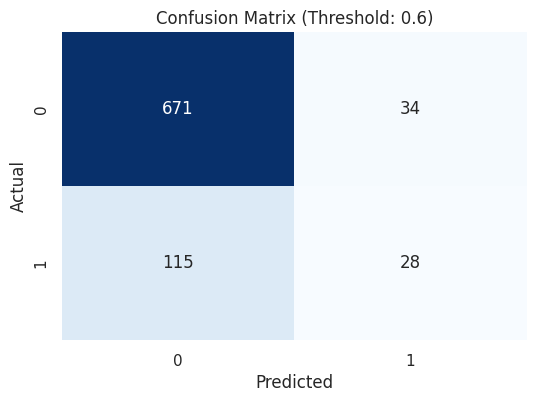

Accuracy: 0.8242924528301887
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       705
           1       0.45      0.20      0.27       143

    accuracy                           0.82       848
   macro avg       0.65      0.57      0.59       848
weighted avg       0.79      0.82      0.79       848

---------------------------------------------------------

Threshold: 0.7


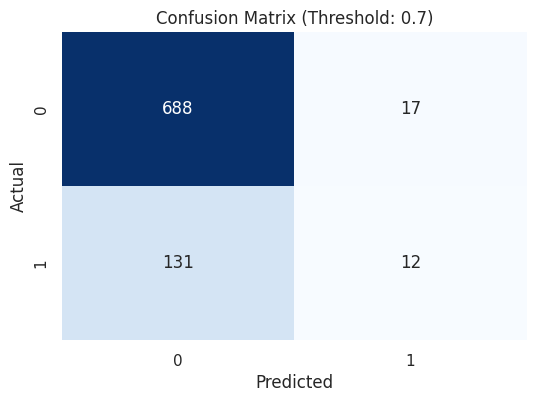

Accuracy: 0.8254716981132075
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       705
           1       0.41      0.08      0.14       143

    accuracy                           0.83       848
   macro avg       0.63      0.53      0.52       848
weighted avg       0.77      0.83      0.77       848

---------------------------------------------------------

Threshold: 0.8


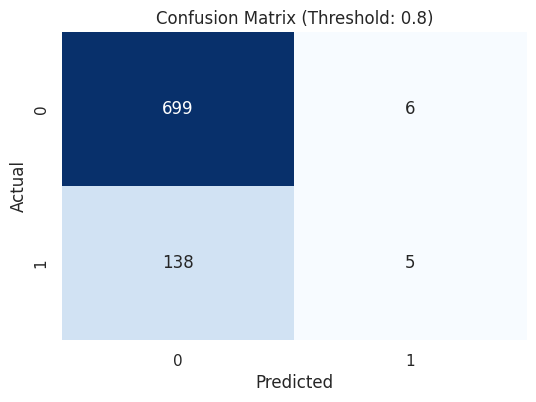

Accuracy: 0.8301886792452831
AUC-ROC Score: 0.6789267470118534
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       705
           1       0.45      0.03      0.06       143

    accuracy                           0.83       848
   macro avg       0.64      0.51      0.49       848
weighted avg       0.77      0.83      0.76       848

---------------------------------------------------------


In [126]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_xgb = (y_probs_xgb >= threshold).astype(int)

    # Get the confusion matrix
    cm_xgb = confusion_matrix(y_test, y_pred_threshold_xgb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_xgb = accuracy_score(y_test, y_pred_threshold_xgb)
    roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)

    print("Accuracy:", accuracy_xgb)
    print("AUC-ROC Score:", roc_auc_xgb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_xgb))
    print('---------------------------------------------------------')

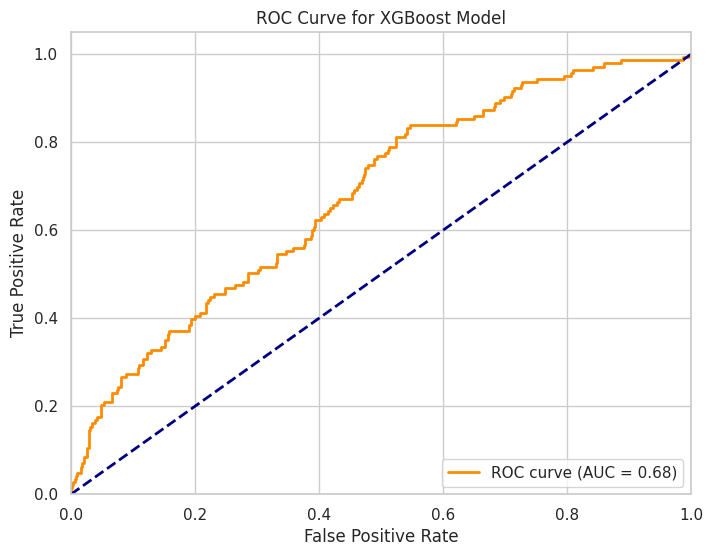

In [127]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curve for the XGBoost model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Accuracy for Best XGBoost Model: 0.8018867924528302
AUC-ROC Score for Best XGBoost Model: 0.681634677379358

Classification Report for Best XGBoost Model:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89       705
           1       0.32      0.15      0.21       143

    accuracy                           0.80       848
   macro avg       0.58      0.54      0.55       848
weighted avg       0.76      0.80      0.77       848



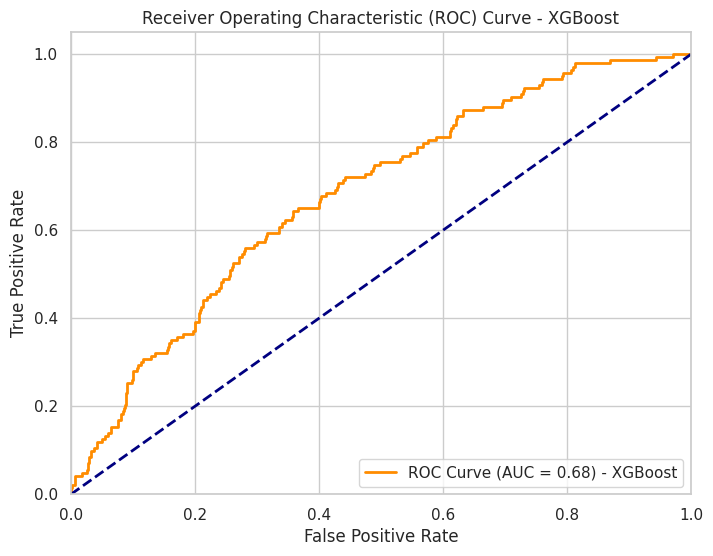

In [128]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_xgb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model on the test set
y_probs_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_best_xgb = (y_probs_best_xgb >= 0.5).astype(int)

# Print accuracy for the best XGBoost model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Accuracy for Best XGBoost Model:", accuracy_best_xgb)

# Print AUC-ROC Score for the best XGBoost model
roc_auc_best_xgb = roc_auc_score(y_test, y_probs_best_xgb)
print("AUC-ROC Score for Best XGBoost Model:", roc_auc_best_xgb)

# Print Classification Report for the best XGBoost model
print("\nClassification Report for Best XGBoost Model:\n", classification_report(y_test, y_pred_best_xgb))

# Plot ROC Curve for the best XGBoost model
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, y_probs_best_xgb)
roc_auc_best_xgb = auc(fpr_best_xgb, tpr_best_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_xgb, tpr_best_xgb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_xgb:.2f}) - XGBoost')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

Feature Importances for XGBoost:
             Feature  Importance
6       Hypertension    0.274451
0                age    0.161284
4         cigsPerDay    0.161227
5          education    0.146961
3            glucose    0.083564
2                BMI    0.059000
7  mean_art_pressure    0.057539
1            totChol    0.055975


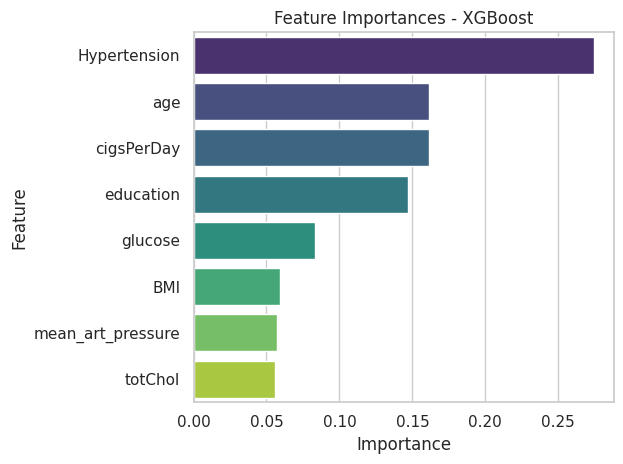

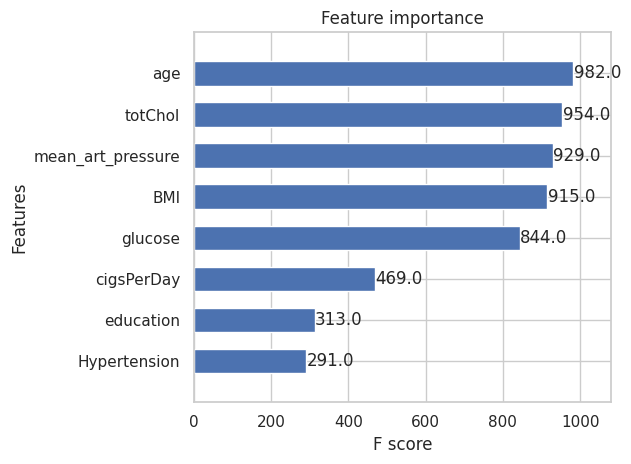

In [129]:
from xgboost import plot_importance

# Assuming best_xgb_model is the best XGBoost model obtained

# Get feature importances
feature_importances_xgb = best_xgb_model.feature_importances_

# Create a DataFrame to display the feature importances along with the corresponding feature names
importance_df_xgb = pd.DataFrame({'Feature': X_train_resampled_df.columns, 'Importance': feature_importances_xgb})

# Sort the DataFrame by importance values
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances for XGBoost:")
print(importance_df_xgb)

# Plot the feature importances
#plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb, palette='viridis')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

# Alternatively, you can use XGBoost's built-in plot_importance function
plot_importance(best_xgb_model, importance_type='weight', max_num_features=10, height=0.6)
plt.tight_layout()
plt.show()


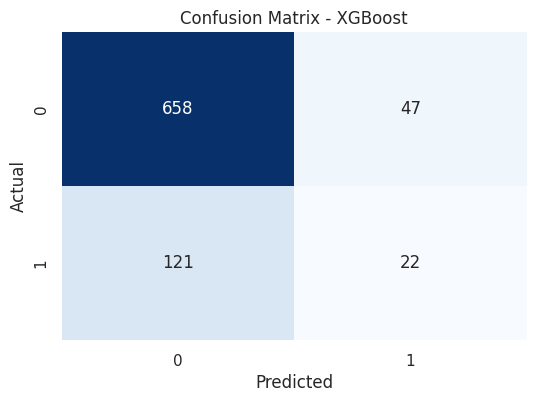

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred_best_xgb is the predicted labels for the test set

# Get the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## NON LINEAR MODELS

### Model 7 - KNN Classifier


Threshold: 0.2


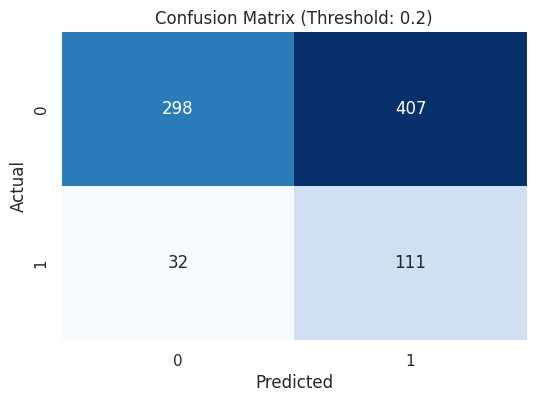

Accuracy: 0.482311320754717
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.58       705
           1       0.21      0.78      0.34       143

    accuracy                           0.48       848
   macro avg       0.56      0.60      0.46       848
weighted avg       0.79      0.48      0.54       848

---------------------------------------------------------

Threshold: 0.3


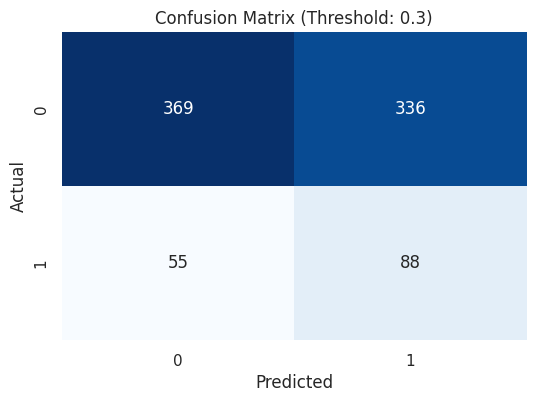

Accuracy: 0.5389150943396226
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.52      0.65       705
           1       0.21      0.62      0.31       143

    accuracy                           0.54       848
   macro avg       0.54      0.57      0.48       848
weighted avg       0.76      0.54      0.60       848

---------------------------------------------------------

Threshold: 0.4


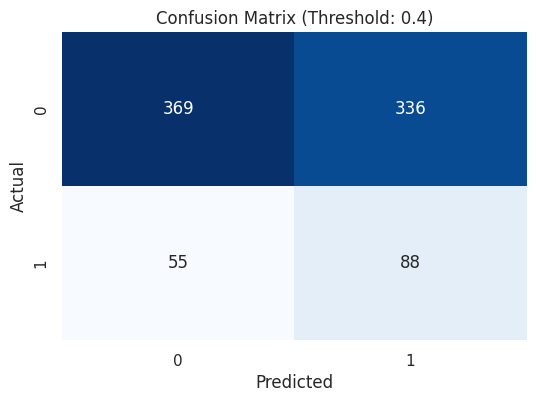

Accuracy: 0.5389150943396226
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.52      0.65       705
           1       0.21      0.62      0.31       143

    accuracy                           0.54       848
   macro avg       0.54      0.57      0.48       848
weighted avg       0.76      0.54      0.60       848

---------------------------------------------------------

Threshold: 0.5


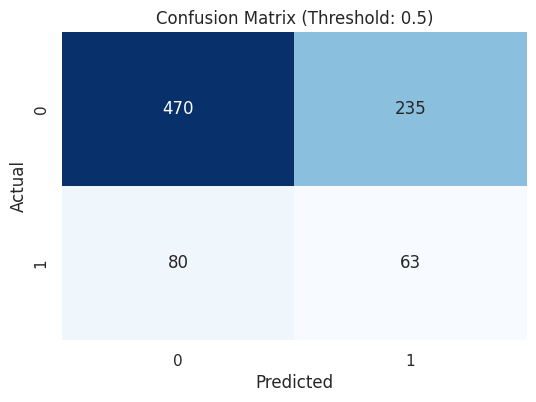

Accuracy: 0.6285377358490566
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       705
           1       0.21      0.44      0.29       143

    accuracy                           0.63       848
   macro avg       0.53      0.55      0.52       848
weighted avg       0.75      0.63      0.67       848

---------------------------------------------------------

Threshold: 0.6


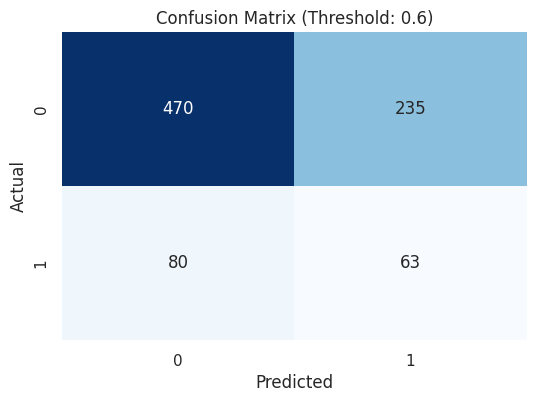

Accuracy: 0.6285377358490566
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       705
           1       0.21      0.44      0.29       143

    accuracy                           0.63       848
   macro avg       0.53      0.55      0.52       848
weighted avg       0.75      0.63      0.67       848

---------------------------------------------------------

Threshold: 0.7


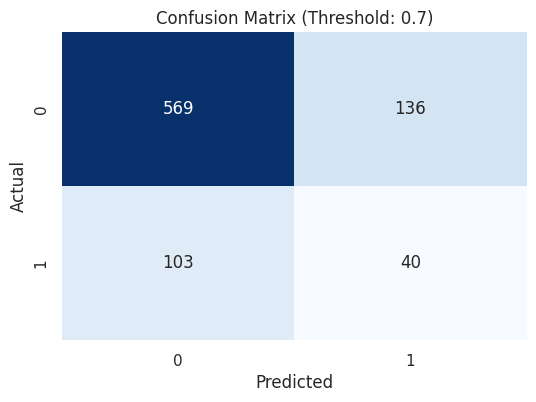

Accuracy: 0.7181603773584906
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.23      0.28      0.25       143

    accuracy                           0.72       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.74      0.72      0.73       848

---------------------------------------------------------

Threshold: 0.8


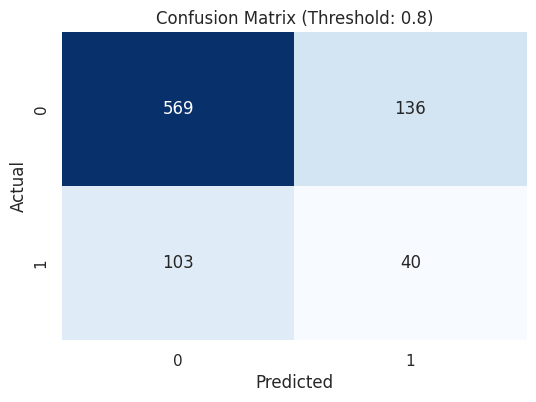

Accuracy: 0.7181603773584906
AUC-ROC Score: 0.6068789366661708
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       705
           1       0.23      0.28      0.25       143

    accuracy                           0.72       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.74      0.72      0.73       848

---------------------------------------------------------


In [131]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Train the KNN model
knn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_knn = (y_probs_knn >= threshold).astype(int)

    # Get the confusion matrix
    cm_knn = confusion_matrix(y_test, y_pred_threshold_knn)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_knn = accuracy_score(y_test, y_pred_threshold_knn)
    roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

    print("Accuracy:", accuracy_knn)
    print("AUC-ROC Score:", roc_auc_knn)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_knn))
    print('---------------------------------------------------------')

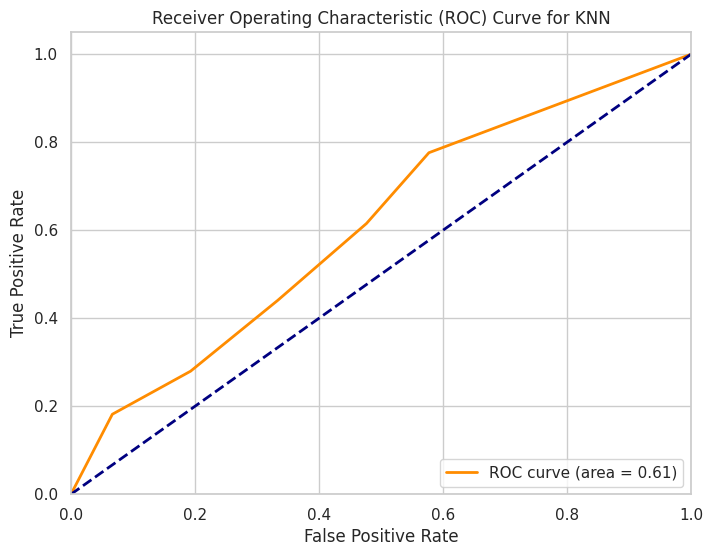

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for Best KNN Model: 0.6450471698113207
AUC-ROC Score for Best KNN Model: 0.5959629023458811

Classification Report for Best KNN Model:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       705
           1       0.23      0.48      0.31       143

    accuracy                           0.65       848
   macro avg       0.55      0.58      0.54       848
weighted avg       0.76      0.65      0.69       848



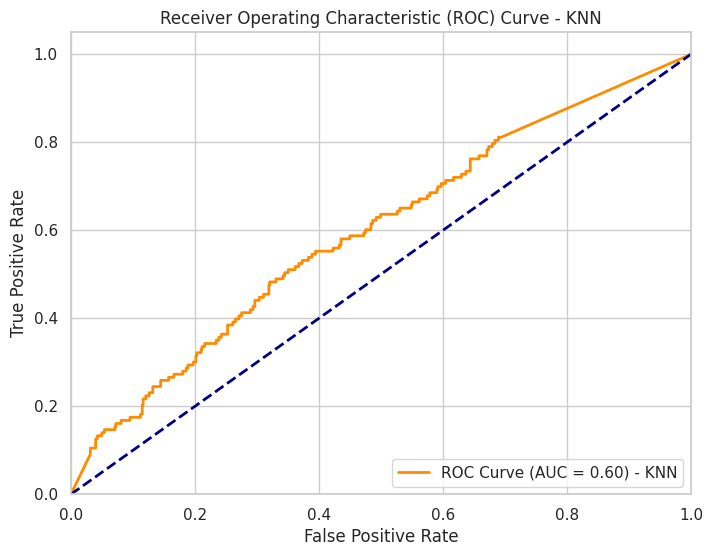

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values as needed
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Create GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_knn.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
y_probs_best_knn = best_knn_model.predict_proba(X_test)[:, 1]
y_pred_best_knn = (y_probs_best_knn >= 0.5).astype(int)

# Print accuracy for the best KNN model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("Accuracy for Best KNN Model:", accuracy_best_knn)

# Print AUC-ROC Score for the best KNN model
roc_auc_best_knn = roc_auc_score(y_test, y_probs_best_knn)
print("AUC-ROC Score for Best KNN Model:", roc_auc_best_knn)

# Print Classification Report for the best KNN model
print("\nClassification Report for Best KNN Model:\n", classification_report(y_test, y_pred_best_knn))

# Plot ROC Curve for the best KNN model
fpr_best_knn, tpr_best_knn, _ = roc_curve(y_test, y_probs_best_knn)
roc_auc_best_knn = auc(fpr_best_knn, tpr_best_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_knn, tpr_best_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_best_knn:.2f}) - KNN')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc="lower right")
plt.show()

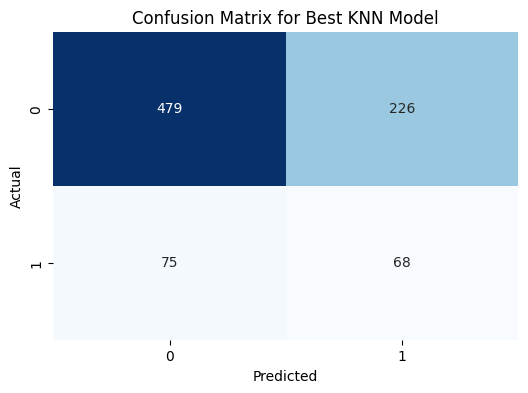

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix for the best KNN model
cm_knn = confusion_matrix(y_test, y_pred_best_knn)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Model 8 - Naive Bayes Classifier


Threshold: 0.2


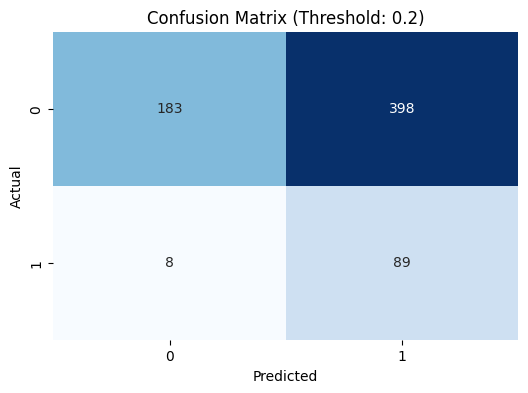

Accuracy: 0.40117994100294985
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.31      0.47       581
           1       0.18      0.92      0.30        97

    accuracy                           0.40       678
   macro avg       0.57      0.62      0.39       678
weighted avg       0.85      0.40      0.45       678

---------------------------------------------------------

Threshold: 0.3


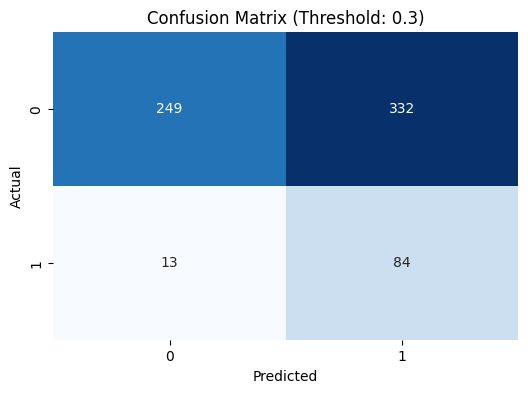

Accuracy: 0.4911504424778761
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.43      0.59       581
           1       0.20      0.87      0.33        97

    accuracy                           0.49       678
   macro avg       0.58      0.65      0.46       678
weighted avg       0.84      0.49      0.55       678

---------------------------------------------------------

Threshold: 0.4


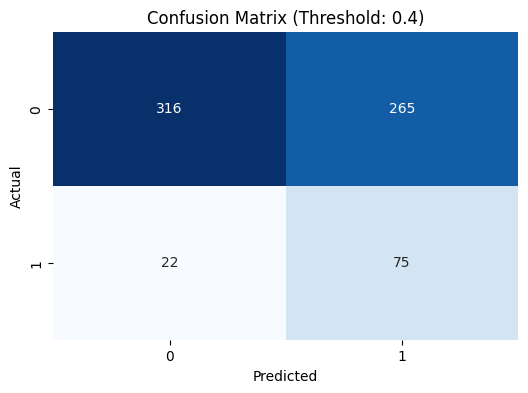

Accuracy: 0.5766961651917404
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.54      0.69       581
           1       0.22      0.77      0.34        97

    accuracy                           0.58       678
   macro avg       0.58      0.66      0.52       678
weighted avg       0.83      0.58      0.64       678

---------------------------------------------------------

Threshold: 0.5


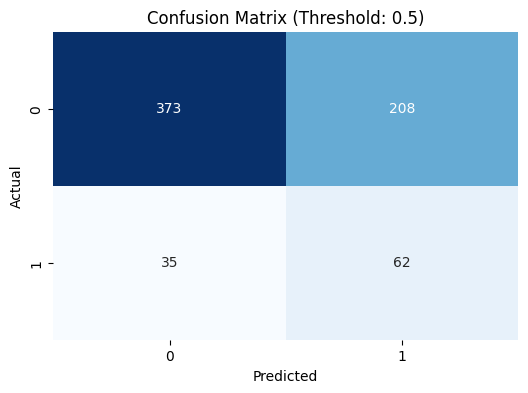

Accuracy: 0.6415929203539823
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       581
           1       0.23      0.64      0.34        97

    accuracy                           0.64       678
   macro avg       0.57      0.64      0.55       678
weighted avg       0.82      0.64      0.69       678

---------------------------------------------------------

Threshold: 0.6


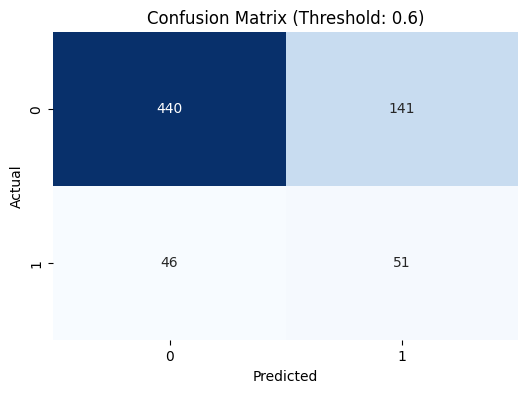

Accuracy: 0.724188790560472
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.82       581
           1       0.27      0.53      0.35        97

    accuracy                           0.72       678
   macro avg       0.59      0.64      0.59       678
weighted avg       0.81      0.72      0.76       678

---------------------------------------------------------

Threshold: 0.7


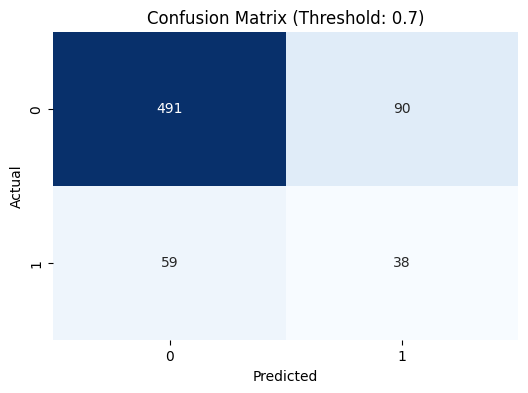

Accuracy: 0.7802359882005899
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       581
           1       0.30      0.39      0.34        97

    accuracy                           0.78       678
   macro avg       0.59      0.62      0.60       678
weighted avg       0.81      0.78      0.79       678

---------------------------------------------------------

Threshold: 0.8


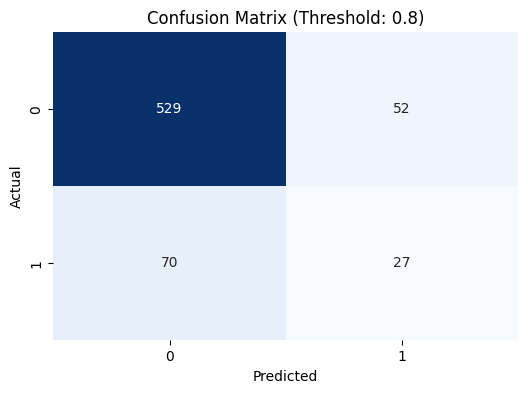

Accuracy: 0.8200589970501475
AUC-ROC Score: 0.7196444097450183
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       581
           1       0.34      0.28      0.31        97

    accuracy                           0.82       678
   macro avg       0.61      0.59      0.60       678
weighted avg       0.81      0.82      0.81       678

---------------------------------------------------------


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_nb = (y_probs_nb >= threshold).astype(int)

    # Get the confusion matrix
    cm_nb = confusion_matrix(y_test, y_pred_threshold_nb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_nb = accuracy_score(y_test, y_pred_threshold_nb)
    roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

    print("Accuracy:", accuracy_nb)
    print("AUC-ROC Score:", roc_auc_nb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_nb))
    print('---------------------------------------------------------')


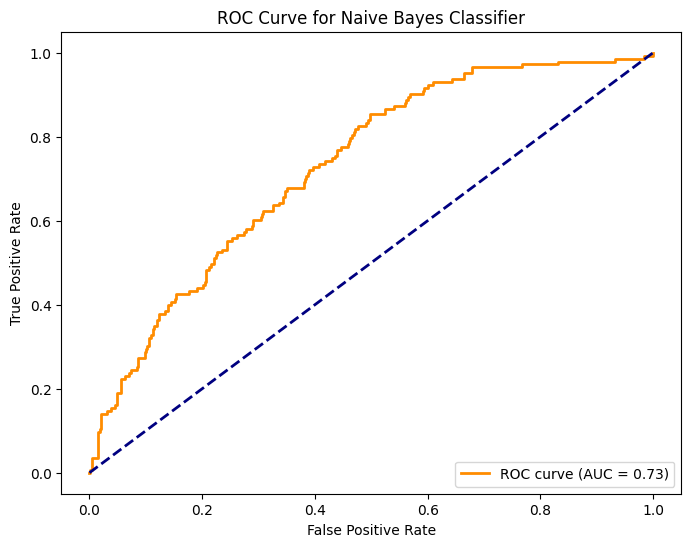

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


Best Parameters for Naive Bayes: {}

Classification Report for Best Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.90      0.62      0.74       705
           1       0.27      0.68      0.38       143

    accuracy                           0.63       848
   macro avg       0.59      0.65      0.56       848
weighted avg       0.80      0.63      0.68       848

Accuracy: 0.6308962264150944


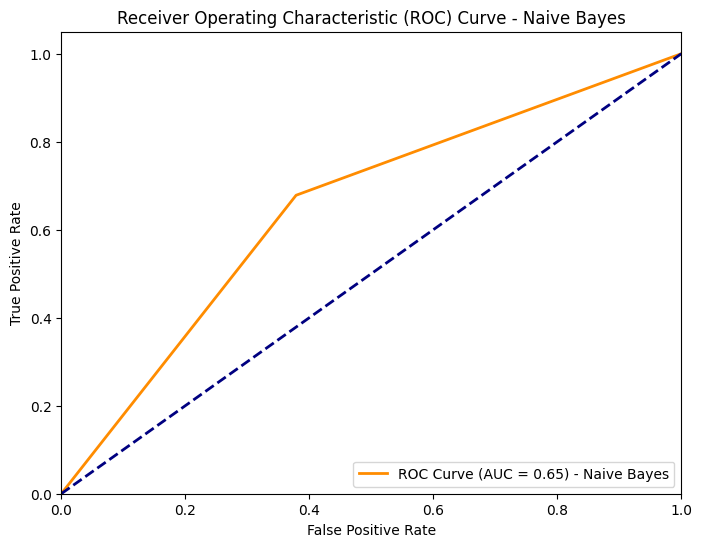

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid to search
param_grid_nb = {}  # No hyperparameters for Gaussian Naive Bayes

# Create GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_nb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

# Get the best Naive Bayes model
best_nb_model = grid_search_nb.best_estimator_

# Evaluate the best Naive Bayes model on the test set
y_pred_best_nb = best_nb_model.predict(X_test)
print("\nClassification Report for Best Naive Bayes Model:\n", classification_report(y_test, y_pred_best_nb))

accuracy_nb = accuracy_score(y_test, y_pred_best_nb)
print("Accuracy:", accuracy_nb)

# Plot ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_best_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f}) - Naive Bayes')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

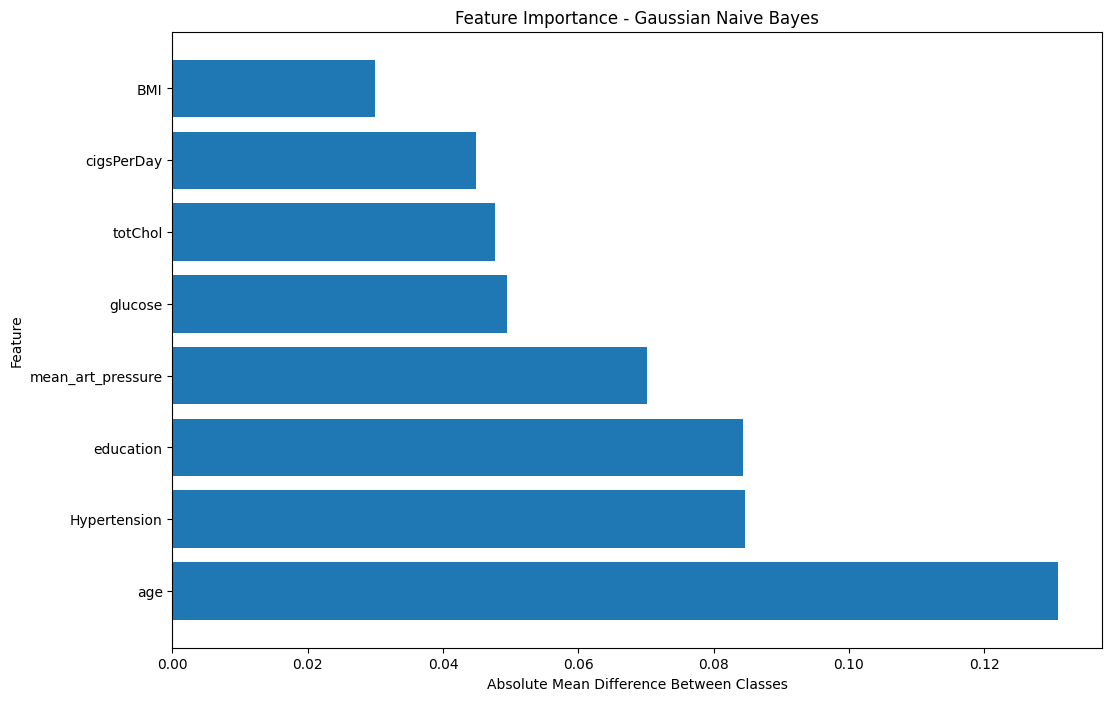

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the Gaussian Naive Bayes model
nb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Extract mean values for each feature and each class
class_labels = nb_model.classes_
feature_means = pd.DataFrame(nb_model.theta_, columns=X_train_resampled_df.columns, index=class_labels)

# Calculate the absolute mean difference between classes for each feature
feature_means_diff = feature_means.diff().abs().mean(axis=0)

# Sort features by the absolute mean difference
feature_means_diff = feature_means_diff.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_means_diff.index, feature_means_diff)
plt.title('Feature Importance - Gaussian Naive Bayes')
plt.xlabel('Absolute Mean Difference Between Classes')
plt.ylabel('Feature')
plt.show()


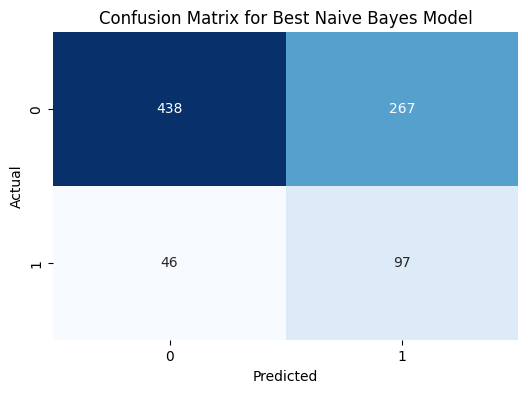

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_nb = confusion_matrix(y_test, y_pred_best_nb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Naive Bayes Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Model 9 - SVM CLASSIFIER


Threshold: 0.2


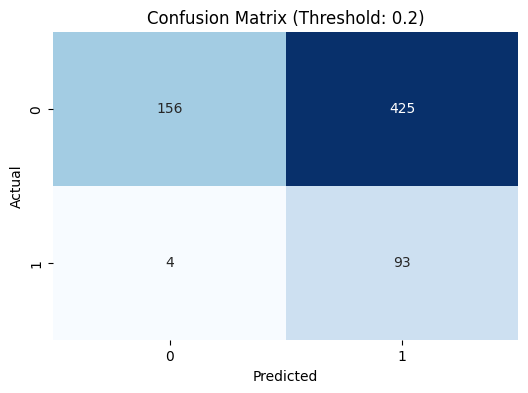

Accuracy: 0.3672566371681416
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.27      0.42       581
           1       0.18      0.96      0.30        97

    accuracy                           0.37       678
   macro avg       0.58      0.61      0.36       678
weighted avg       0.86      0.37      0.40       678

---------------------------------------------------------

Threshold: 0.3


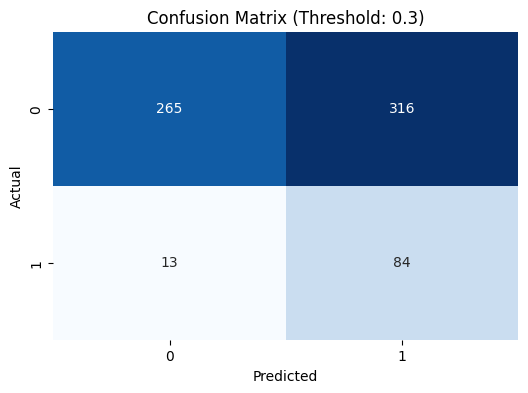

Accuracy: 0.5147492625368731
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62       581
           1       0.21      0.87      0.34        97

    accuracy                           0.51       678
   macro avg       0.58      0.66      0.48       678
weighted avg       0.85      0.51      0.58       678

---------------------------------------------------------

Threshold: 0.4


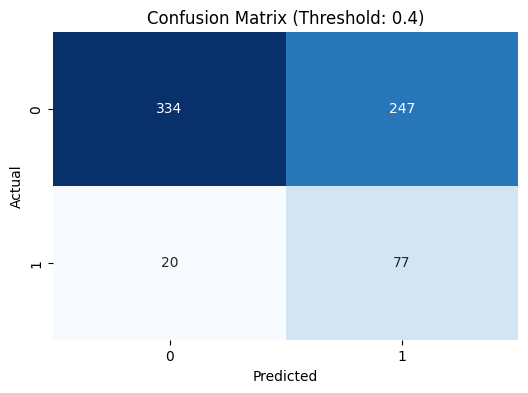

Accuracy: 0.6061946902654868
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71       581
           1       0.24      0.79      0.37        97

    accuracy                           0.61       678
   macro avg       0.59      0.68      0.54       678
weighted avg       0.84      0.61      0.66       678

---------------------------------------------------------

Threshold: 0.5


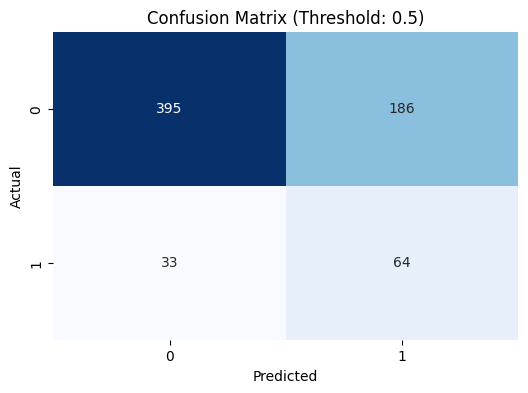

Accuracy: 0.6769911504424779
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78       581
           1       0.26      0.66      0.37        97

    accuracy                           0.68       678
   macro avg       0.59      0.67      0.58       678
weighted avg       0.83      0.68      0.72       678

---------------------------------------------------------

Threshold: 0.6


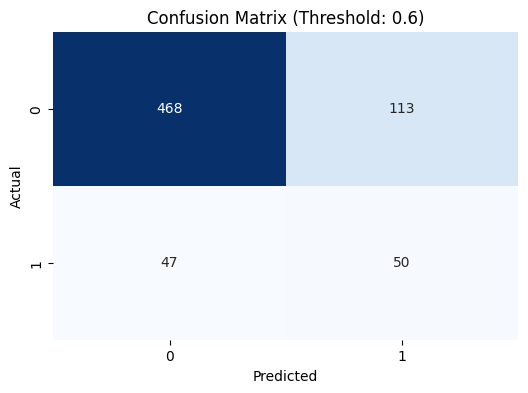

Accuracy: 0.7640117994100295
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85       581
           1       0.31      0.52      0.38        97

    accuracy                           0.76       678
   macro avg       0.61      0.66      0.62       678
weighted avg       0.82      0.76      0.79       678

---------------------------------------------------------

Threshold: 0.7


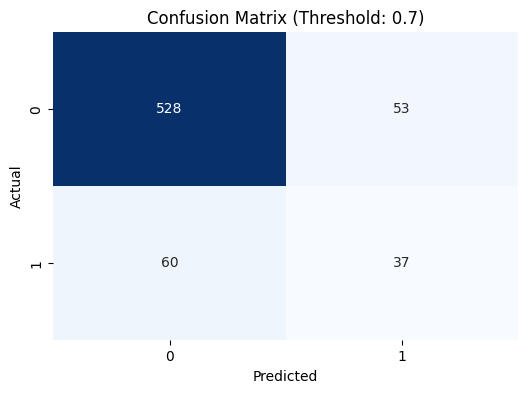

Accuracy: 0.8333333333333334
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       581
           1       0.41      0.38      0.40        97

    accuracy                           0.83       678
   macro avg       0.65      0.65      0.65       678
weighted avg       0.83      0.83      0.83       678

---------------------------------------------------------

Threshold: 0.8


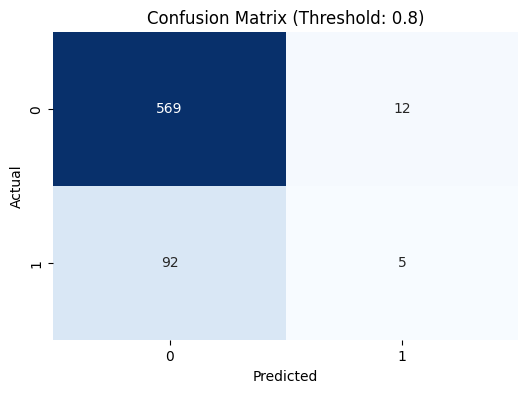

Accuracy: 0.8466076696165191
AUC-ROC Score: 0.7472008801036252
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       581
           1       0.29      0.05      0.09        97

    accuracy                           0.85       678
   macro avg       0.58      0.52      0.50       678
weighted avg       0.78      0.85      0.80       678

---------------------------------------------------------


In [ ]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Train the SVM model
svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds_svm = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold_svm in thresholds_svm:
    y_pred_threshold_svm = (y_probs_svm >= threshold_svm).astype(int)

    # Get the confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_threshold_svm)

    print(f"\nThreshold: {threshold_svm}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold_svm})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_svm = accuracy_score(y_test, y_pred_threshold_svm)
    roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

    print("Accuracy:", accuracy_svm)
    print("AUC-ROC Score:", roc_auc_svm)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_svm))
    print('---------------------------------------------------------')

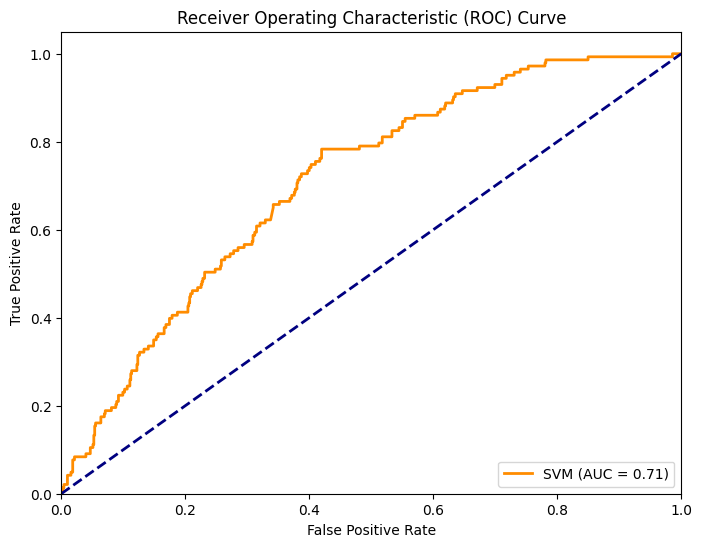

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for Best SVM Model:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       705
           1       0.26      0.55      0.35       143

    accuracy                           0.66       848
   macro avg       0.57      0.61      0.56       848
weighted avg       0.78      0.66      0.70       848

Accuracy: 0.6568396226415094


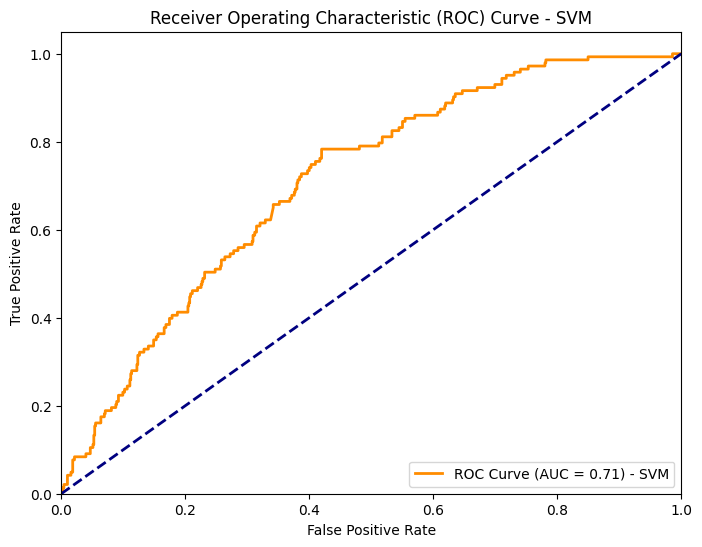

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Create GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_svm.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
y_pred_best_svm = best_svm_model.predict(X_test)
print("\nClassification Report for Best SVM Model:\n", classification_report(y_test, y_pred_best_svm))

accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
print("Accuracy:", accuracy_svm)

# Plot ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_svm:.2f}) - SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

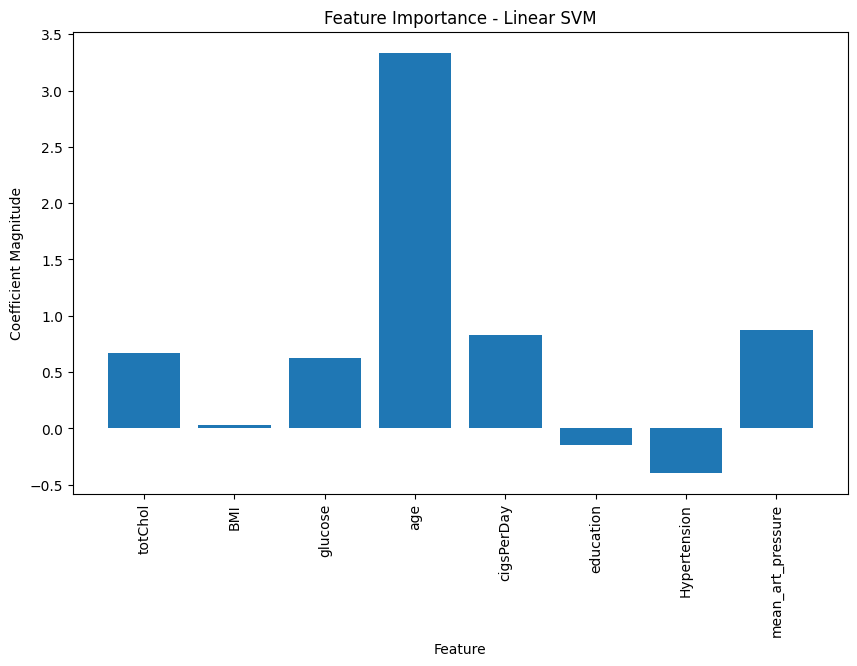

In [ ]:
# Assuming you have a linear SVM model
linear_svm_model = SVC(C=1, kernel='linear', probability=True, random_state=42)

# Fit the model to the training data
linear_svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Get the feature coefficients
feature_importance = linear_svm_model.coef_[0]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_train_resampled_df.columns, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance - Linear SVM')
plt.show()


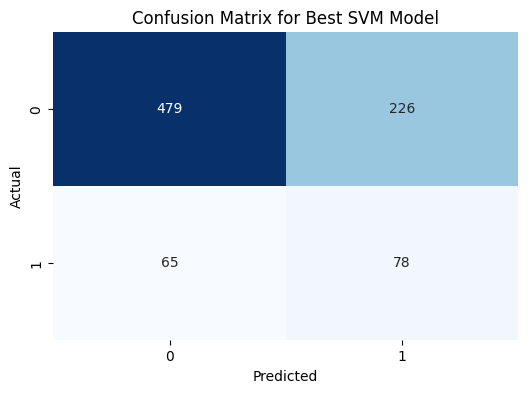

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_svm = confusion_matrix(y_test, y_pred_best_svm)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best SVM Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### evaluation

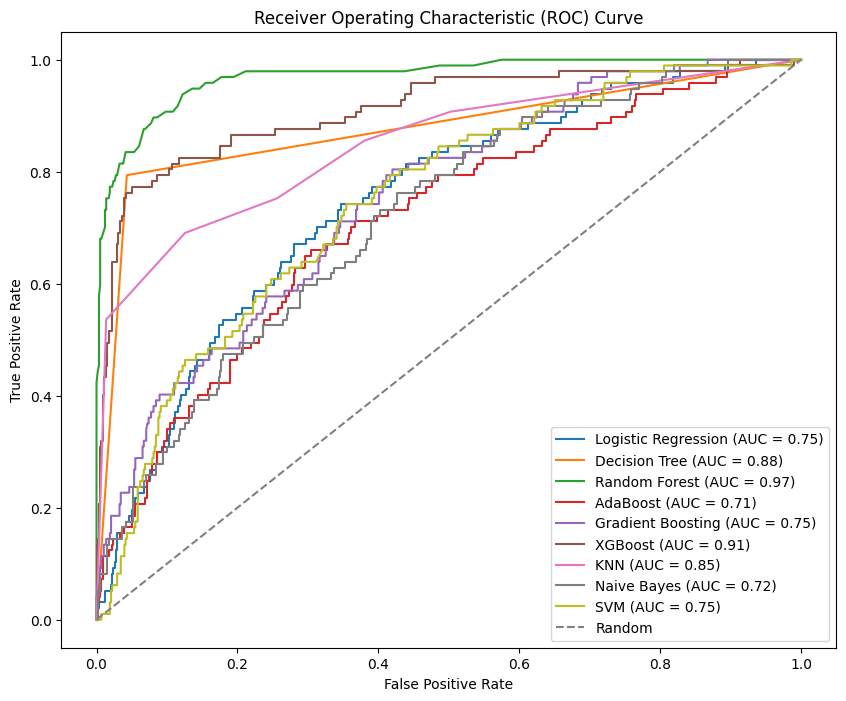

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Define the models and their predictions
models = {
    'Logistic Regression': y_probs,
    'Decision Tree': y_probs_dt,
    'Random Forest': y_probs_rf,
    'AdaBoost': y_probs_adaboost,
    'Gradient Boosting': y_probs_gb,
    'XGBoost': y_probs_xgb,
    'KNN': y_probs_knn,
    'Naive Bayes': y_probs_nb,
    'SVM': y_probs_svm
}

# Plot AUC-ROC for each model
plt.figure(figsize=(10, 8))
for model_name, y_pred_probs in models.items():
    auc_score = roc_auc_score(y_test, y_pred_probs)
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


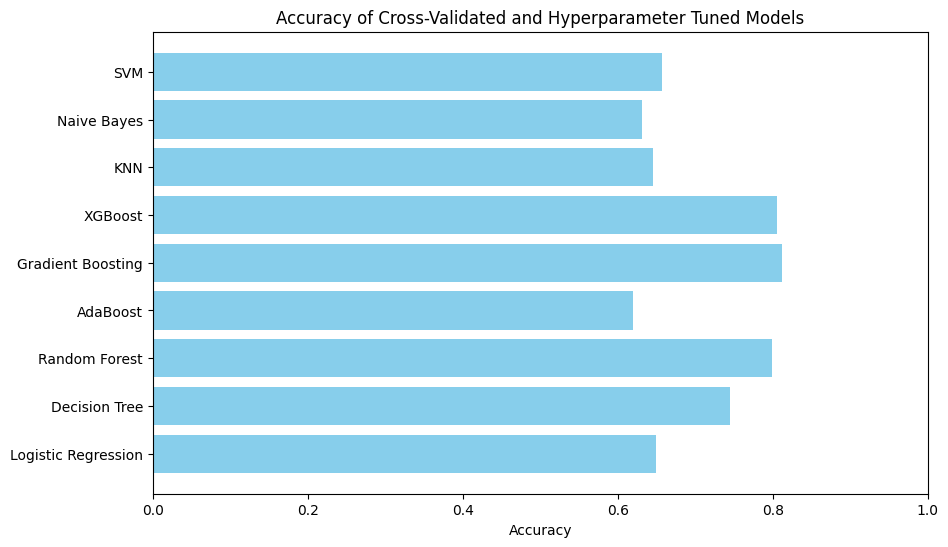

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'KNN', 'Naive Bayes', 'SVM']
accuracies = [accuracy_best, accuracy_best_dt, accuracy_best_rf, accuracy_best_adaboost, accuracy_best_gb, accuracy_best_xgb, accuracy_best_knn, accuracy_nb, accuracy_svm]

# Plot accuracy for each model
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Cross-Validated and Hyperparameter Tuned Models')
plt.xlim(0, 1)  # Set x-axis limit to represent accuracy percentage
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In the provided code, a Logistic Regression model is trained and tuned using GridSearchCV with StratifiedKFold cross-validation. Here's a breakdown:

1. **Model Selection:** Logistic Regression is chosen as the classification model (`LogisticRegression(random_state=42)`).

2. **Parameter Tuning:** The model is trained using different hyperparameter combinations specified in `param_grid`, and the best hyperparameters are selected based on the ROC-AUC score during cross-validation.

3. **Cross-Validation:** Stratified K-Fold cross-validation (`StratifiedKFold`) is used to assess the model's performance in a more robust manner, especially when dealing with imbalanced classes.

4. **Evaluation Metrics:** The model's performance is evaluated on the test set using metrics like precision, recall, and accuracy. Additionally, the ROC curve is plotted to visualize the trade-off between true positive rate (sensitivity) and false positive rate.

Regarding feature importance using model explainability tools, the provided code does not include explicit feature importance analysis. To interpret feature importance in a Logistic Regression model, you can examine the coefficients assigned to each feature. Positive coefficients indicate a positive impact on the target class, while negative coefficients indicate a negative impact.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
from joblib import dump

# Save the RandomForestClassifier model to a file using Joblib
dump(rf_model, 'rf_model.joblib')


['rf_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File
from joblib import load

# Load the RandomForestClassifier model from the Joblib file
loaded_rf_model = load('rf_model.joblib')

In [ ]:
import numpy as np

# Define the number of samples and features
num_samples = 100
num_features = X_train_resampled_df.shape[1]  # Assuming X_train_resampled_df is your training data

# Generate random unseen data
unseen_data = np.random.rand(num_samples, num_features)

# Display the shape of the unseen data
print("Shape of unseen data:", unseen_data.shape)


Shape of unseen data: (100, 8)


In [ ]:
import numpy as np

# Load the RandomForestClassifier model from the file
loaded_rf_model = load('rf_model.joblib')

# Generate some unseen data
num_samples = 100
num_features = X_train_resampled_df.shape[1]
unseen_data = np.random.rand(num_samples, num_features)

# Fit the loaded model to your training data
loaded_rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict outcomes for the unseen data
unseen_data_predictions = loaded_rf_model.predict(unseen_data)


In [ ]:
unseen_data

array([[0.36562653, 0.02144451, 0.58737288, 0.1521372 , 0.33342881,
        0.84804586, 0.71648383, 0.14366755],
       [0.49046373, 0.02356407, 0.96875987, 0.54970427, 0.83175856,
        0.91664064, 0.28188407, 0.74268802],
       [0.60158422, 0.73134361, 0.74955617, 0.40347257, 0.38401278,
        0.72357844, 0.9992116 , 0.37760147],
       [0.59377007, 0.72408401, 0.91004965, 0.37603878, 0.25993896,
        0.33245554, 0.5452211 , 0.85590459],
       [0.87694876, 0.855009  , 0.10837806, 0.09173152, 0.75274658,
        0.10862234, 0.03105612, 0.3769983 ],
       [0.43795695, 0.7114719 , 0.52184082, 0.78239146, 0.06957777,
        0.24103544, 0.34507151, 0.67281673],
       [0.24827747, 0.2134468 , 0.2234165 , 0.64864082, 0.66403483,
        0.20616375, 0.70679823, 0.05648072],
       [0.19283755, 0.87915666, 0.87279616, 0.42782949, 0.35946883,
        0.80108348, 0.94707649, 0.80892616],
       [0.24675055, 0.67439627, 0.07090081, 0.16412839, 0.56645336,
        0.35064598, 0.602038

In [ ]:
print(unseen_data_predictions)

[1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***